# **Capstone Project:** 🩸 Project : Diabetes Risk Prediction

**Overview**:
This project aims to analyze health survey data to identify key risk factors associated with diabetes and build a predictive model to classify individuals as Diabetic or Non-Diabetic.
This project follows a CRISP-DM framework: data cleaning, exploratory data analysis (EDA), feature engineering, modeling, and evaluation.

### **Data Source:**

Our dataset comes from  *CDC*,The Behavioral Risk Factor Surveillance System (BRFSS) is a health-related telephone survey that is collected annually by the CDC
This dataset contains 3 files:
diabetes _ 012 _ health _ indicators _ BRFSS2015.csv
diabetes _ binary _ 5050split _ health _ indicators _ BRFSS2015.cs
diabetes _ binary _ health _ indicators _ BRFSS2015.csv


**Explore some of the following research questions:**

*   Can I find a model using this data from the BRFSS provide accurate predictions of whether an individual has diabetes based on the risk factors listed?
*   What risk factors are most helpfull to predict the  diabetes risk, corolation?
#### The project follows a structured  CRISP-DM Steps and ML pipeline: including:

- [1. 📊 Data Source Loading](#1)

- [2. 🧹 Data Cleaning](#2)

- [3. 🔍 Exploratory Data Analysis (EDA)](#3)

- [4. ✂️ Train/Test split](#4)

- [5. 🛠️ Feature Engineering](#5)

- [6. ⚙️ Base Model (Regression Modeling) ](#6)

- [7. 🤖 Modeling](#7)

- [8. 🧩 Hyperparameter tuning](#8)

- [9. 🧠 Selecting best model](#8)

- [10. 📈 Feature Importance Analysis ](#10)

- [11. ✅ Result](#11)

# 1. Data Source Loading <a id="1"></a>




*   diabetes_012 (3-class, imbalanced, big): Best for nuanced risk (prediabetes vs diabetes), but harder due to imbalance.
*   diabetes_binary_5050split (2-class, balanced, medium): Best for clean comparisons, easier training, but less realistic.

*   diabetes_binary (2-class, imbalanced, big): Best for real-world prevalence, but accuracy can mislead.



**“I chose the full binary dataset(data/diabetes_012_health_indicators_BRFSS2015) because it mirrors real-world prevalence, providing a larger and more representative sample for building realistic models.”**

**Features (Inputs – 21 variables)**


1.   HighBP – High blood pressure
2.   HighChol – High cholesterol
3.   CholCheck – Cholesterol check in 5 years
4.   BMI – Body Mass Index
5.   Smoker – Ever smoked 100 cigarettes
6.   Stroke – Ever had a stroke
7.   HeartDiseaseorAttack – Coronary heart disease or myocardial infarction
8.   PhysActivity – Physical activity in past 30 days

9.   PhysActivity – Physical activity in past 30 days

10.   Fruits – Consume fruits 1+ times per day
11.   Veggies – Consume vegetables 1+ times per day

12.   HvyAlcoholConsump – Heavy alcohol consumption
13.   AnyHealthcare – Have any kind of health care coverage
14.   NoDocbcCost – Couldn’t see a doctor because of cost
15.   GenHlth – Self-rated general health (1=excellent → 5=poor)
16.   MentHlth – Days of poor mental health (past 30)
17.   PhysHlth – Days of poor physical health (past 30)
18.   DiffWalk – Serious difficulty walking or climbing stairs
19.   Sex – Biological sex (0=Female, 1=Male)
20.   Age – Age category (13 levels)
21.   Education – Education level (1–6 scale)
22.   Income – Household income level (1–8 scale)


**Output (Target – differs by dataset)**
Diabetes_binary (2 classes, imbalanced, full population)

0 = no diabetes
1 = prediabetes or diabetes

->13-level age category  


*   1 Age 18 to 24
*   2 Age 25 to 29
*   3 Age 30 to 34
*   4 Age 35 to 39
*   5 Age 40 to 44
*   6 Age 45 to 49
*   7 Age 50 to 54
*   8 Age 55 to 59
*   9 Age 60 to 64
*   10 Age 65 to 69
*   11 Age 70 to 74
*   12 Age 75 to 79
*   13 Age 80 or older

->Education
*   1 Never attended school or only kindergarten
*   2 Grades 1 through 8 (Elementary)
*   3 Grades 9 through 11 (Some high school)
*   4 Grade 12 or GED (High school graduate)
*   5 College 1 year to 3 years (Some college or technical school)
*   6 College 4 years or more (College graduate)

 ->Incomes:
*   1 Less than $10,000
*   2 Less than $15,000 ($10,000 to less than $15,000)
*   3 Less than $20,000 ($15,000 to less than $20,000)
*   4 Less than $25,000 ($20,000 to less than $25,000)
*   5 Less than $35,000 ($25,000 to less than $35,000)
*   6 Less than $50,000 ($35,000 to less than $50,000)
*   7 Less than $75,000 ($50,000 to less than $75,000)
*   8 $75,000 or more

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import kagglehub
import os
os.makedirs("data", exist_ok=True)


In [ ]:
path = kagglehub.dataset_download("alexteboul/diabetes-health-indicators-dataset")
print("Path to dataset files:", path)


Using Colab cache for faster access to the 'diabetes-health-indicators-dataset' dataset.
Path to dataset files: /kaggle/input/diabetes-health-indicators-dataset


In [ ]:
df1 = pd.read_csv("/kaggle/input/diabetes-health-indicators-dataset//diabetes_binary_5050split_health_indicators_BRFSS2015.csv")
df2 = pd.read_csv("/kaggle/input/diabetes-health-indicators-dataset//diabetes_binary_health_indicators_BRFSS2015.csv")
df3 = pd.read_csv("/kaggle/input/diabetes-health-indicators-dataset//diabetes_012_health_indicators_BRFSS2015.csv")

In [ ]:
df1.head()
df1.shape

(70692, 22)

In [ ]:
df2.head()
df2.shape

(253680, 22)

In [ ]:
df3.head()
df3.shape

(253680, 22)

In [ ]:
df3.head()

Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0           0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1           0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3           0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4           0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0  0.0   9.0        4.0   
1          1.0      3.0       0.0       0.0       0.0  0.0   7.0        6.0   
2          1.0      5.0      30.0      30.0       1.0  0.0   9.0        4.0   
3          0.0      2.0       0.0       0.0       0.0  0.0  11.0        3.0   
4          0.0      2.0       3.0       0.0       0.0  0.0  11.0        5.0   

   Income  
0     3.0  
1     1.0  
2     8.0  
3     6.0  
4     4.0  

[5 rows x 22 columns]

In [ ]:

diabetes = df3.copy()

#Checking information of dataframe
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [ ]:
#Describing datafram
diabetes.describe().T

count       mean       std   min   25%   50%   75%  \
Diabetes_012          253680.0   0.296921  0.698160   0.0   0.0   0.0   0.0   
HighBP                253680.0   0.429001  0.494934   0.0   0.0   0.0   1.0   
HighChol              253680.0   0.424121  0.494210   0.0   0.0   0.0   1.0   
CholCheck             253680.0   0.962670  0.189571   0.0   1.0   1.0   1.0   
BMI                   253680.0  28.382364  6.608694  12.0  24.0  27.0  31.0   
Smoker                253680.0   0.443169  0.496761   0.0   0.0   0.0   1.0   
Stroke                253680.0   0.040571  0.197294   0.0   0.0   0.0   0.0   
HeartDiseaseorAttack  253680.0   0.094186  0.292087   0.0   0.0   0.0   0.0   
PhysActivity          253680.0   0.756544  0.429169   0.0   1.0   1.0   1.0   
Fruits                253680.0   0.634256  0.481639   0.0   0.0   1.0   1.0   
Veggies               253680.0   0.811420  0.391175   0.0   1.0   1.0   1.0   
HvyAlcoholConsump     253680.0   0.056197  0.230302   0.0   0.0   0.0   0.0   
AnyHealthcare         253680.0   0.951053  0.215759   0.0   1.0   1.0   1.0   
NoDocbcCost           253680.0   0.084177  0.277654   0.0   0.0   0.0   0.0   
GenHlth               253680.0   2.511392  1.068477   1.0   2.0   2.0   3.0   
MentHlth              253680.0   3.184772  7.412847   0.0   0.0   0.0   2.0   
PhysHlth              253680.0   4.242081  8.717951   0.0   0.0   0.0   3.0   
DiffWalk              253680.0   0.168224  0.374066   0.0   0.0   0.0   0.0   
Sex                   253680.0   0.440342  0.496429   0.0   0.0   0.0   1.0   
Age                   253680.0   8.032119  3.054220   1.0   6.0   8.0  10.0   
Education             253680.0   5.050434  0.985774   1.0   4.0   5.0   6.0   
Income                253680.0   6.053875  2.071148   1.0   5.0   7.0   8.0   

                       max  
Diabetes_012           2.0  
HighBP                 1.0  
HighChol               1.0  
CholCheck              1.0  
BMI                   98.0  
Smoker                 1.0  
Stroke                 1.0  
HeartDiseaseorAttack   1.0  
PhysActivity           1.0  
Fruits                 1.0  
Veggies                1.0  
HvyAlcoholConsump      1.0  
AnyHealthcare          1.0  
NoDocbcCost            1.0  
GenHlth                5.0  
MentHlth              30.0  
PhysHlth              30.0  
DiffWalk               1.0  
Sex                    1.0  
Age                   13.0  
Education              6.0  
Income                 8.0

# 2. Data Cleaning <a id="2"></a>



In [ ]:
# missing values of columns
diabetes.isnull().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [ ]:
unique_values = {}
for col in df1.columns:
    unique_values[col] = df1[col].value_counts().shape[0]

pd.DataFrame(unique_values, index=['unique value count']).transpose()

unique value count
Diabetes_binary                        2
HighBP                                 2
HighChol                               2
CholCheck                              2
BMI                                   80
Smoker                                 2
Stroke                                 2
HeartDiseaseorAttack                   2
PhysActivity                           2
Fruits                                 2
Veggies                                2
HvyAlcoholConsump                      2
AnyHealthcare                          2
NoDocbcCost                            2
GenHlth                                5
MentHlth                              31
PhysHlth                              31
DiffWalk                               2
Sex                                    2
Age                                   13
Education                              6
Income                                 8

In [ ]:
print("Duplicate Rows : ",len(diabetes[diabetes.duplicated()]))
diabetes.drop_duplicates(inplace=True)

Duplicate Rows :  23899


In [ ]:
# Check data types of each column
print(diabetes.dtypes)

Diabetes_012            float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object


In [ ]:
# Define mappings
age_map = {
    1: "18 to 24",
    2: "25 to 29",
    3: "30 to 34",
    4: "35 to 39",
    5: "40 to 44",
    6: "45 to 49",
    7: "50 to 54",
    8: "55 to 59",
    9: "60 to 64",
    10: "65 to 69",
    11: "70 to 74",
    12: "75 to 79",
    13: "80 or older"
}

education_map = {
    1: "Never attended / Kindergarten",
    2: "Elementary",
    3: "High school",
    4: "High school",
    5: "College 1-3",
    6: "College 4+"
}

income_map = {
    1: "Less than $10,000",
    2: "$10,000 to <$15,000",
    3: "$15,000 to <$20,000",
    4: "$20,000 to <$25,000",
    5: "$25,000 to <$35,000",
    6: "$35,000 to <$50,000",
    7: "$50,000 to <$75,000",
    8: "$75,000 or more"
}

# Apply mappings to create categorical (object) columns
diabetes["Age"] = diabetes["Age"].map(age_map)
diabetes["Education"] = diabetes["Education"].map(education_map)
diabetes["Income"] = diabetes["Income"].map(income_map)
diabetes["Sex"] = diabetes["Sex"].replace({0: "Female", 1: "Male"})
diabetes["GenHlth"] = diabetes["GenHlth"].replace({
    1: "Excellent",
    2: "Very good",
    3: "Good",
    4: "Fair",
    5: "Poor"
})

In [ ]:
diabetes.head(10)


Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0           0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1           0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3           0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4           0.0     1.0       1.0        1.0  24.0     0.0     0.0   
5           0.0     1.0       1.0        1.0  25.0     1.0     0.0   
6           0.0     1.0       0.0        1.0  30.0     1.0     0.0   
7           0.0     1.0       1.0        1.0  25.0     1.0     0.0   
8           2.0     1.0       1.0        1.0  30.0     1.0     0.0   
9           0.0     0.0       0.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   
5                   0.0           1.0     1.0  ...            1.0   
6                   0.0           0.0     0.0  ...            1.0   
7                   0.0           1.0     0.0  ...            1.0   
8                   1.0           0.0     1.0  ...            1.0   
9                   0.0           0.0     0.0  ...            1.0   

   NoDocbcCost    GenHlth  MentHlth PhysHlth  DiffWalk     Sex       Age  \
0          0.0       Poor      18.0     15.0       1.0  Female  60 to 64   
1          1.0       Good       0.0      0.0       0.0  Female  50 to 54   
2          1.0       Poor      30.0     30.0       1.0  Female  60 to 64   
3          0.0  Very good       0.0      0.0       0.0  Female  70 to 74   
4          0.0  Very good       3.0      0.0       0.0  Female  70 to 74   
5          0.0  Very good       0.0      2.0       0.0    Male  65 to 69   
6          0.0       Good       0.0     14.0       0.0  Female  60 to 64   
7          0.0       Good       0.0      0.0       1.0  Female  70 to 74   
8          0.0       Poor      30.0     30.0       1.0  Female  60 to 64   
9          0.0  Very good       0.0      0.0       0.0    Male  55 to 59   

     Education               Income  
0  High school  $15,000 to <$20,000  
1   College 4+    Less than $10,000  
2  High school      $75,000 or more  
3  High school  $35,000 to <$50,000  
4  College 1-3  $20,000 to <$25,000  
5   College 4+      $75,000 or more  
6   College 4+  $50,000 to <$75,000  
7  High school  $20,000 to <$25,000  
8  College 1-3    Less than $10,000  
9  High school  $15,000 to <$20,000  

[10 rows x 22 columns]

In [ ]:
# explore data unique values
print(diabetes.select_dtypes('object').agg('nunique'))

GenHlth       5
Sex           2
Age          13
Education     5
Income        8
dtype: int64


In [ ]:
unique_values = {col: diabetes[col].unique() for col in diabetes.columns}

# Display results
for col, values in unique_values.items():
    print(f"{col}: {values}")

Diabetes_012: [0. 2. 1.]
HighBP: [1. 0.]
HighChol: [1. 0.]
CholCheck: [1. 0.]
BMI: [40. 25. 28. 27. 24. 30. 34. 26. 33. 21. 23. 22. 38. 32. 37. 31. 29. 20.
 35. 45. 39. 19. 47. 18. 36. 43. 55. 49. 42. 17. 16. 41. 44. 50. 59. 48.
 52. 46. 54. 57. 53. 14. 15. 51. 58. 63. 61. 56. 74. 62. 64. 66. 73. 85.
 60. 67. 65. 70. 82. 79. 92. 68. 72. 88. 96. 13. 81. 71. 75. 12. 77. 69.
 76. 87. 89. 84. 95. 98. 91. 86. 83. 80. 90. 78.]
Smoker: [1. 0.]
Stroke: [0. 1.]
HeartDiseaseorAttack: [0. 1.]
PhysActivity: [0. 1.]
Fruits: [0. 1.]
Veggies: [1. 0.]
HvyAlcoholConsump: [0. 1.]
AnyHealthcare: [1. 0.]
NoDocbcCost: [0. 1.]
GenHlth: ['Poor' 'Good' 'Very good' 'Fair' 'Excellent']
MentHlth: [18.  0. 30.  3.  5. 15. 10.  6. 20.  2. 25.  1.  4.  7.  8. 21. 14. 26.
 29. 16. 28. 11. 12. 24. 17. 13. 27. 19. 22.  9. 23.]
PhysHlth: [15.  0. 30.  2. 14. 28.  7. 20.  3. 10.  1.  5. 17.  4. 19.  6. 12. 25.
 27. 21. 22.  8. 29. 24.  9. 16. 18. 23. 13. 26. 11.]
DiffWalk: [1. 0.]
Sex: ['Female' 'Male']
Age: ['60 to 64'

In [ ]:
# I am goin combined the ‘pre-diabetes’ and ‘diabetes’ classes into a single group to simplify the classification task. This decision was made because both categories share overlapping risk factors and clinical features, and merging them helps address class imbalance while focusing on distinguishing individuals at risk from those without diabetes.
diabetes["Diabetic"] = diabetes["Diabetes_012"].replace({2: 1})
diabetes = diabetes.drop(columns=["Diabetes_012"])

# 3. Exploratory Data Analysis (EDA) <a id="3"></a>

##EDA – Univariate Analysis for Categorial features


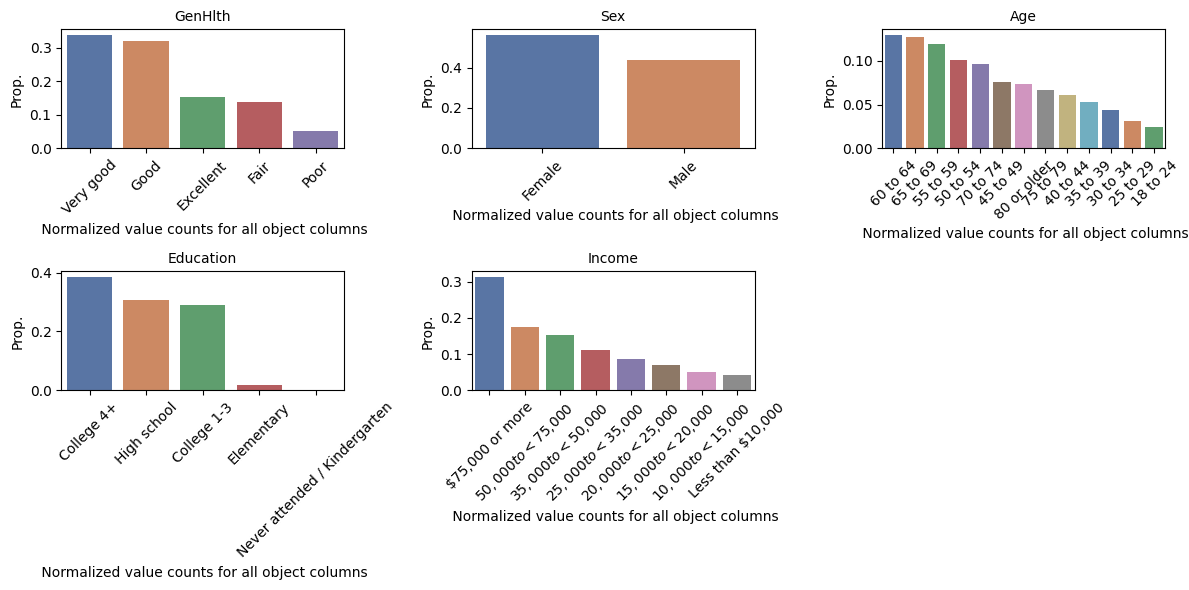

In [ ]:
#EDA – Univariate Analysis for Categorial features
import math
def plot_normalized_bars_all(df, top_n=None, palette="deep"):
    """
    Plots normalized value counts for all object columns in a DataFrame
    as small subplots in a grid layout.

    Args:
        df (DataFrame): Your dataset.
        top_n (int, optional): Show only the top N categories.
        palette (str, optional): Seaborn color palette.
    """
    obj_cols = df.select_dtypes(include=['object']).columns
    n_cols = 3  # number of subplot columns
    n_rows = math.ceil(len(obj_cols) / n_cols)

    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(n_cols * 4, n_rows * 3))
    axes = axes.flatten()

    for ax, col in zip(axes, obj_cols):
        proportions = df[col].value_counts(normalize=True, dropna=False).round(4).sort_values(ascending=False)
        if top_n:
          proportions = proportions.head(top_n)

        sns.barplot(
            x=proportions.index,
            y=proportions.values,
            order=proportions.index,
            palette=palette,
            ax=ax,
            hue=proportions.index,
            legend=False,
        )

        ax.set_title(col, fontsize=10)
        ax.set_xlabel(" Normalized value counts for all object columns")
        ax.set_ylabel("Prop.")
        ax.tick_params(axis='x', rotation=45)

    # Hide any unused subplots
    for ax in axes[len(obj_cols):]:
        ax.axis("off")

    plt.tight_layout()
    plt.show()
plot_normalized_bars_all(diabetes)

##EDA – Univariate Analysis for numerical features

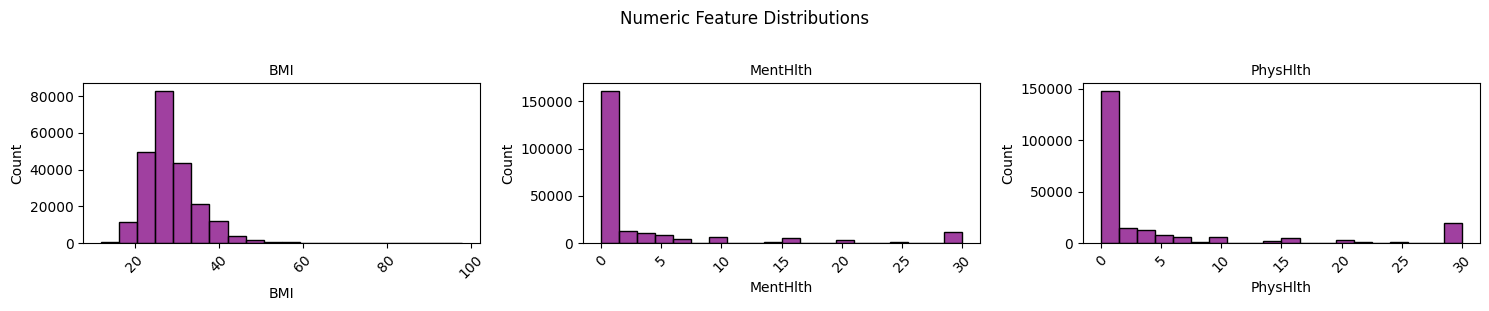

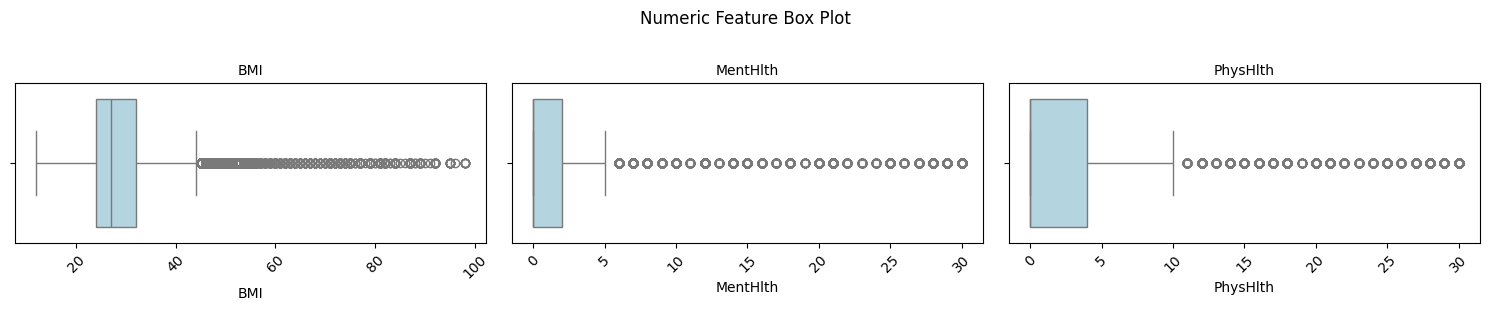

In [ ]:
#EDA – Univariate Analysis for numerical features
# IF binary exclude
binary_cols = [
    "HighBP", "HighChol", "CholCheck", "Smoker", "Stroke",
    "HeartDiseaseorAttack", "PhysActivity", "Fruits", "Veggies",
    "HvyAlcoholConsump", "AnyHealthcare", "NoDocbcCost", "DiffWalk", "Diabetic"
]
def plot_normalized_Histo_all(df, top_n=None ,bins=20, palette="deep"):
    """
    Histogram and Box plot for all numerical columns in a DataFrame
    as small subplots in a grid layout.

    Args:
        df (DataFrame): Your dataset.
        top_n (int, optional): Show only the top N categories.
    """
    num_cols = df.select_dtypes(include=['number']).columns

    # Exclude binary (0/1) columns
    num_cols = [
        col for col in num_cols
        if not set(df[col].dropna().unique()).issubset({0, 1})
    ]
    n_cols = 3  # number of subplot columns
    n_rows = math.ceil(len(num_cols)/n_cols)

    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(n_cols * 5, n_rows * 3))
    axes = axes.flatten()

    for ax, col in zip(axes, num_cols):
        unique_vals = df[col].dropna().unique()
        sns.histplot(df[col], kde=False, ax=ax, bins=bins, color='purple')
        ax.set_title(col, fontsize=10)
        ax.tick_params(axis='x', rotation=45)
    # Hide any unused subplots
    for ax in axes[len(num_cols):]:
        ax.axis("off")

    fig.suptitle("Numeric Feature Distributions", y=1.02)
    plt.tight_layout()
    plt.show()

def plot_normalized_box_all(df, top_n=None,palette = "deep"):
    """
    Histogram and Box plot for all numerical columns in a DataFrame
    as small subplots in a grid layout.

    Args:
        df (DataFrame): Your dataset.
        top_n (int, optional): Show only the top N categories.
        palette (str, optional): Seaborn color palette.
    """
    num_cols = df.select_dtypes(include=['number']).columns

    # Exclude binary (0/1) columns
    num_cols = [
        col for col in num_cols
        if not set(df[col].dropna().unique()).issubset({0, 1})
    ]
    n_cols = 3  # number of subplot columns
    n_rows = math.ceil(len(num_cols)/n_cols)

    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(n_cols * 5, n_rows * 3))
    axes = axes.flatten()

    for ax, col in zip(axes, num_cols):
        # Box plot
        sns.boxplot(x=df[col],ax=ax,color='lightblue')
        ax.set_title(col, fontsize=10)
        ax.tick_params(axis='x', rotation=45)

    # Hide any unused subplots
    for ax in axes[len(num_cols):]:
        ax.axis("off")

    fig.suptitle("Numeric Feature Box Plot", y=1.02)
    plt.tight_layout()
    plt.show()

plot_normalized_Histo_all(diabetes)
plot_normalized_box_all(diabetes)

In [ ]:
#Target Column Unbalanced
diabetes["Diabetic"].value_counts()


Diabetic
0.0    190055
1.0     39726
Name: count, dtype: int64

##EDA – Univariate Analysis for Binary features

In [ ]:
binary_cols = [
    "HighBP", "HighChol", "CholCheck", "Smoker", "Stroke",
    "HeartDiseaseorAttack", "PhysActivity", "Fruits", "Veggies",
    "HvyAlcoholConsump", "AnyHealthcare", "NoDocbcCost", "DiffWalk", "Diabetic"
]

def plot_binary_pies(df, binary_cols):
    """
    Create pie charts for multiple binary columns in a DataFrame.

    Args:
        df (DataFrame): Your dataset.
        binary_cols (list): List of binary column names (0/1).
    """
    n_cols = 3  # number of plots per row
    n_rows = -(-len(binary_cols) // n_cols)  # ceiling division

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 5))
    axes = axes.flatten()

    for ax, col in zip(axes, binary_cols):
        counts = df[col].value_counts().sort_index()
        labels = [f"{col}=0", f"{col}=1"]

        ax.pie(counts, labels=labels, autopct="%.1f%%",
               colors=["#66b3ff", "#ff9999"], startangle=90)
        ax.set_title(col)

    # Hide unused subplots
    for ax in axes[len(binary_cols):]:
        ax.axis("off")

    fig.suptitle("Binary Feature Distributions", fontsize=14, y=1.02)
    plt.tight_layout()
    plt.show()



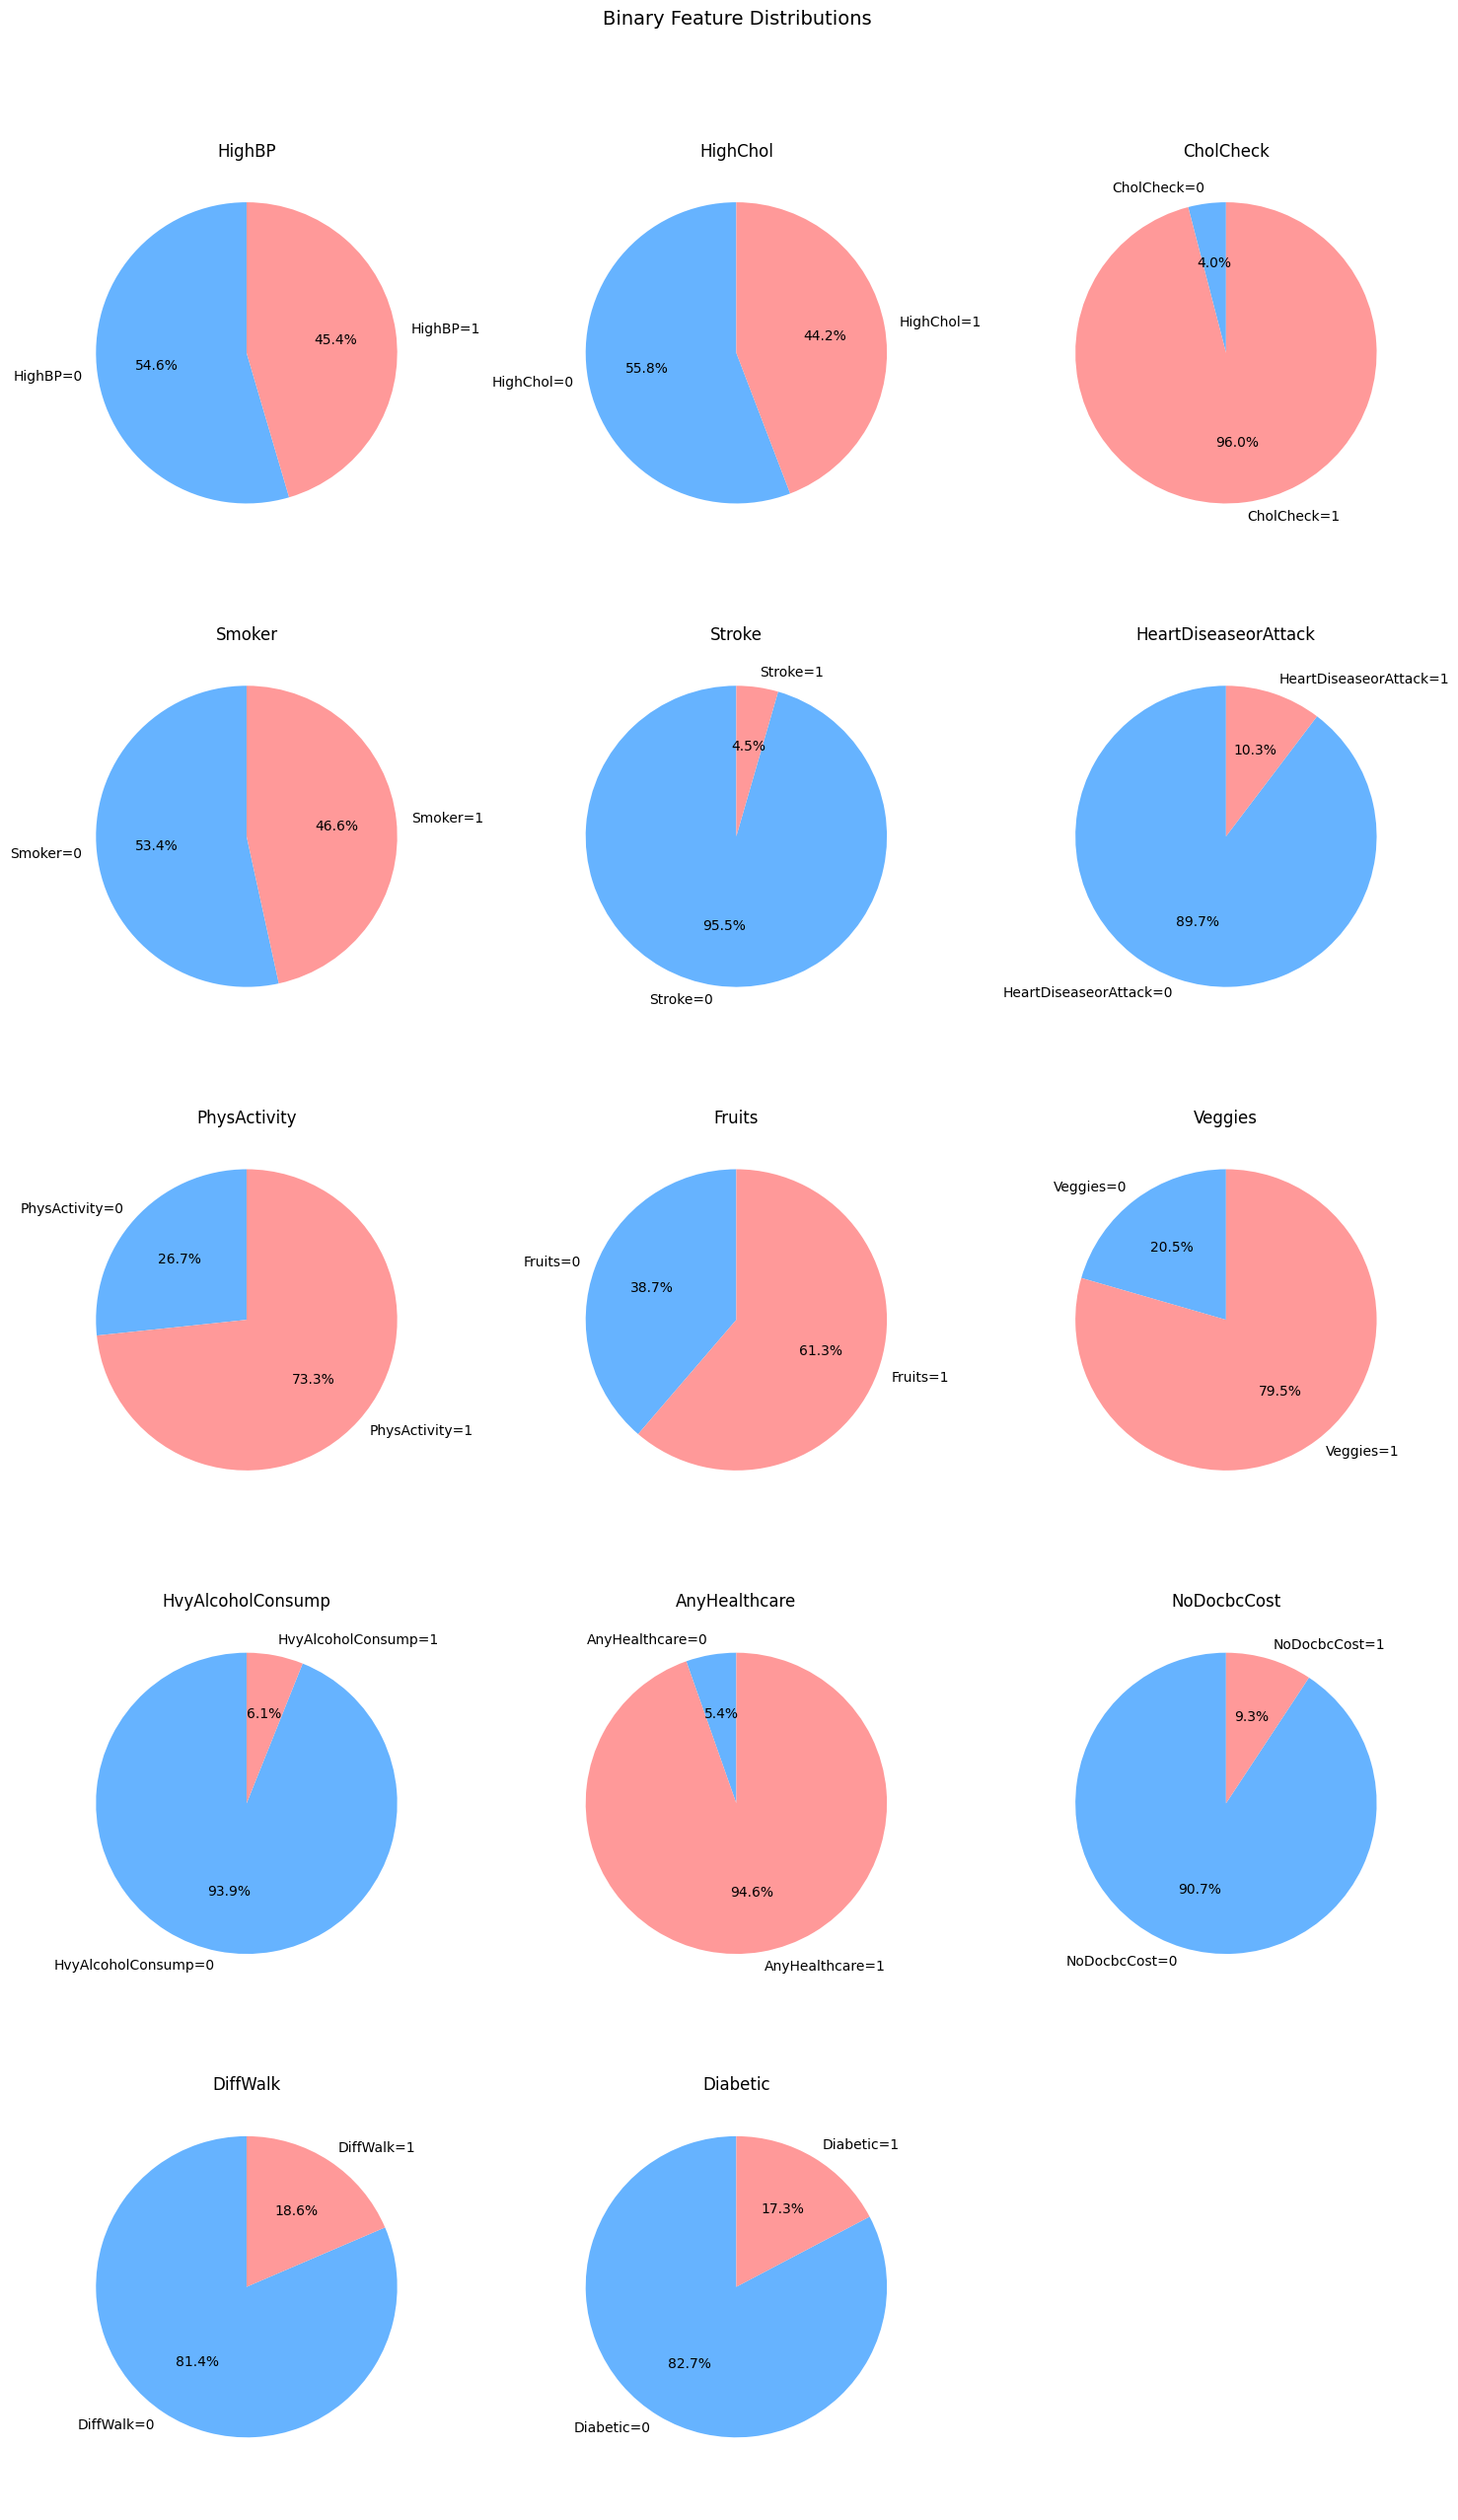

In [ ]:
plot_binary_pies(diabetes, binary_cols)

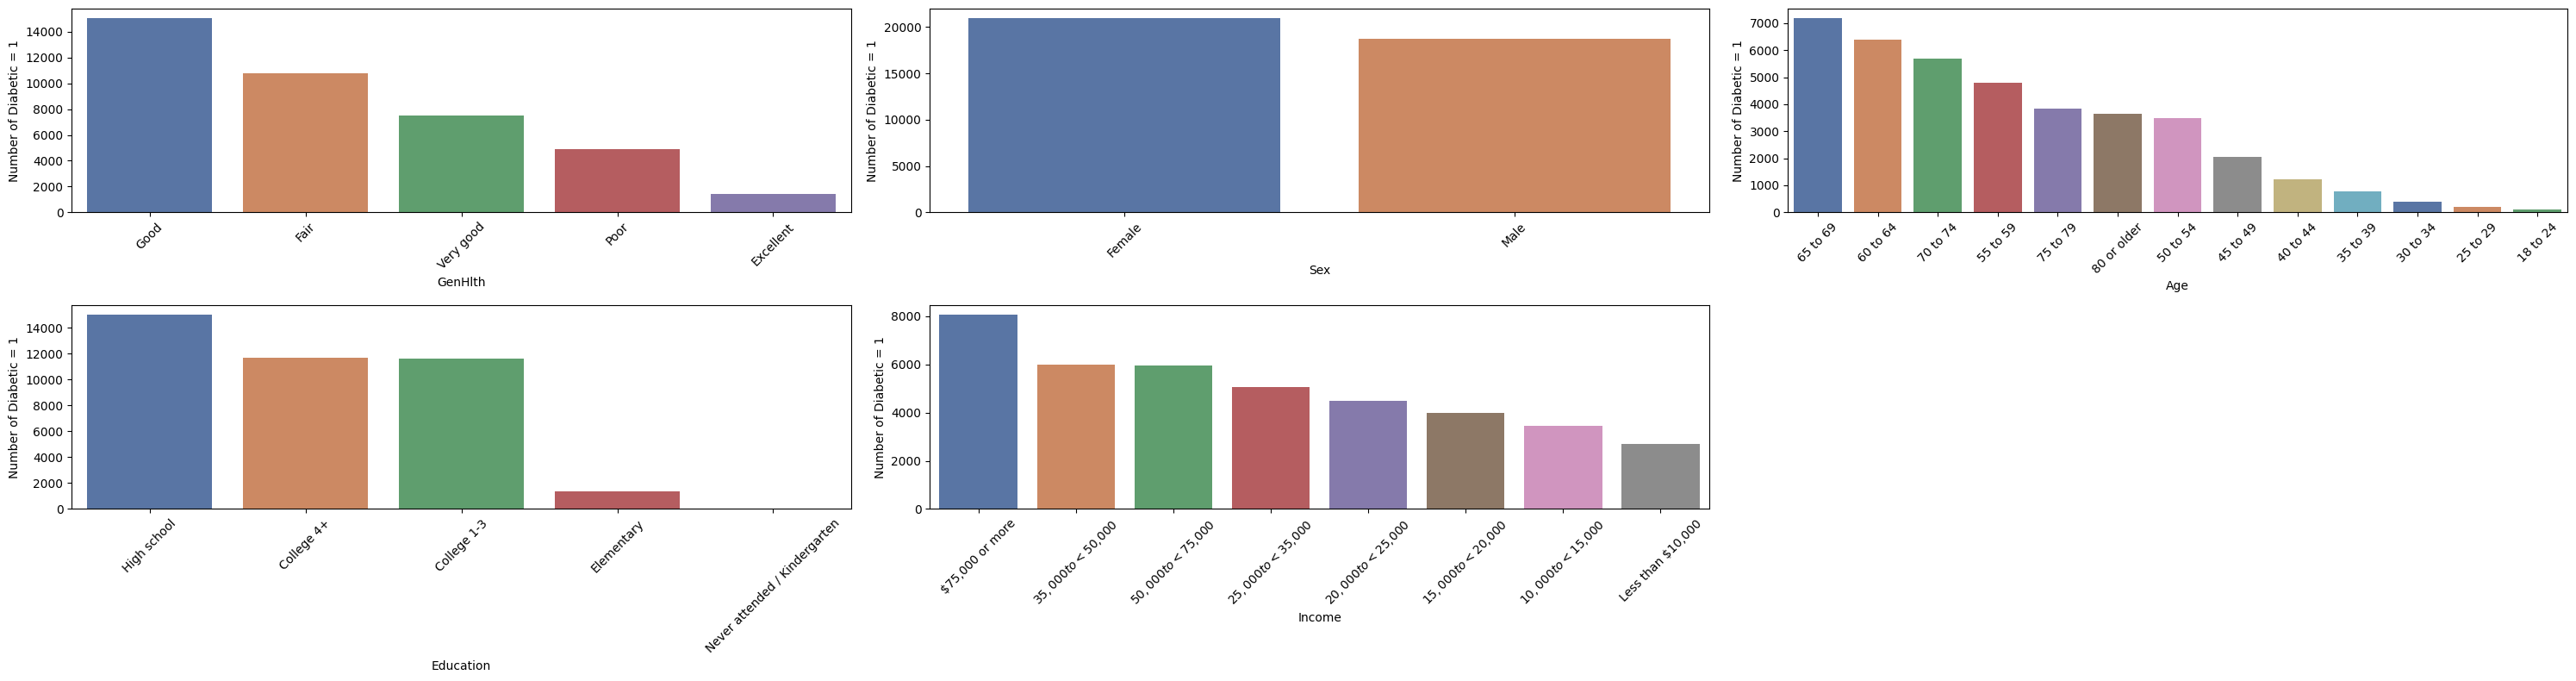

In [ ]:
#EDA - Bivariate categories
def plot_target_rate_by_category(data, target, min_count=1):
    # keep only rows where target == 1
    data = data[data[target] == 1]

    cat_cols = [c for c in data.select_dtypes(include=['object']).columns if c != target]

    n_cols = 3  # number of subplot columns
    n_rows = math.ceil(len(cat_cols) / n_cols)

    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(n_cols * 10, n_rows * 4))
    axes = axes.flatten()

    for ax, col in zip(axes, cat_cols):
        grouped = (
            data.groupby(col)[target]
            .agg(count="size")
        )

        grouped = grouped.sort_values("count", ascending=False)
        grouped = grouped.query("count >= @min_count")

        # plot proportion of diabetic==1 (here it's always 100% of filtered rows, so use counts)
        sns.barplot(
            x=grouped.index,
            y="count",
            data=grouped,
            ax=ax,
            palette="deep",
            hue=grouped.index,
            legend=False,
        )
        ax.set_ylabel("Number of Diabetic = 1")
        ax.tick_params(axis="x", rotation=45)

    # Hide unused subplots
    for ax in axes[len(cat_cols):]:
        ax.axis("off")

    plt.tight_layout()
    plt.show()


plot_target_rate_by_category(diabetes, "Diabetic")

**Diabetic Column Analysis**




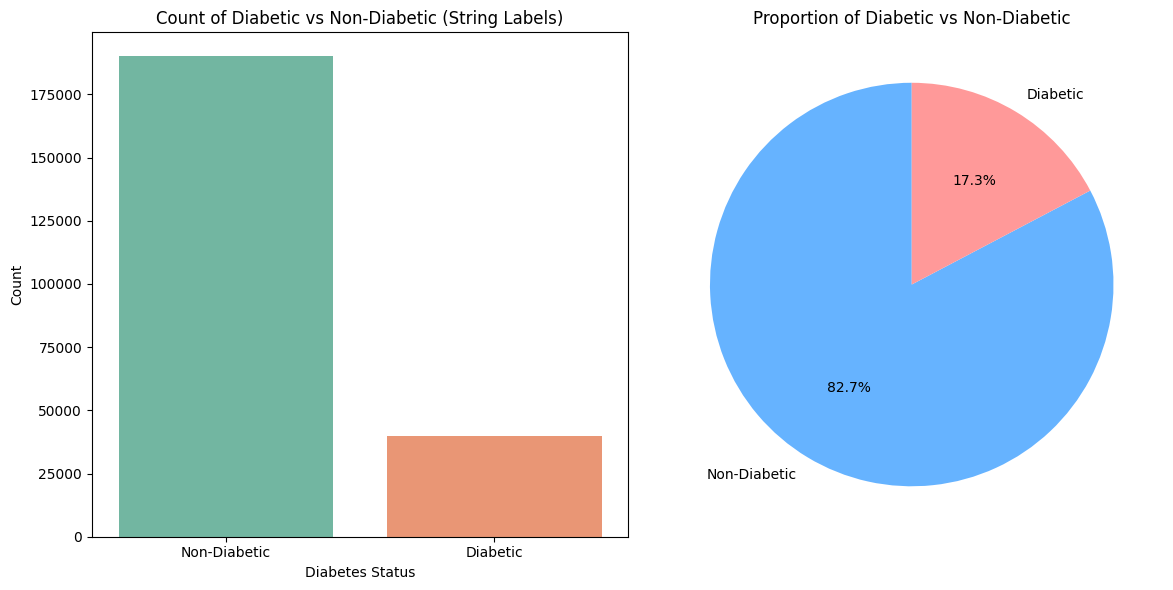

In [ ]:
#checking the value count of Diabetes_binary_str by using countplot
import warnings
warnings.filterwarnings('ignore')

# Create 1 row, 2 columns subplot
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
dftemp = diabetes
dftemp["Diabetes_binary_str"]= dftemp["Diabetic"].replace({0:"Non-Diabetic",1:"Diabetic"})
# --- Countplot for Diabetes_binary_str ---
sns.countplot(x="Diabetes_binary_str", data=dftemp, ax=axes[0], palette="Set2")
axes[0].set_title("Count of Diabetic vs Non-Diabetic (String Labels)")
axes[0].set_xlabel("Diabetes Status")
axes[0].set_ylabel("Count")

# --- Pie chart for Diabetes_binary ---
labels = ["Non-Diabetic", "Diabetic"]
axes[1].pie(diabetes["Diabetic"].value_counts(),
            labels=labels,
            autopct='%.1f%%',
            colors=["#66b3ff", "#ff9999"],
            startangle=90)
axes[1].set_title("Proportion of Diabetic vs Non-Diabetic")

plt.tight_layout()
plt.show()

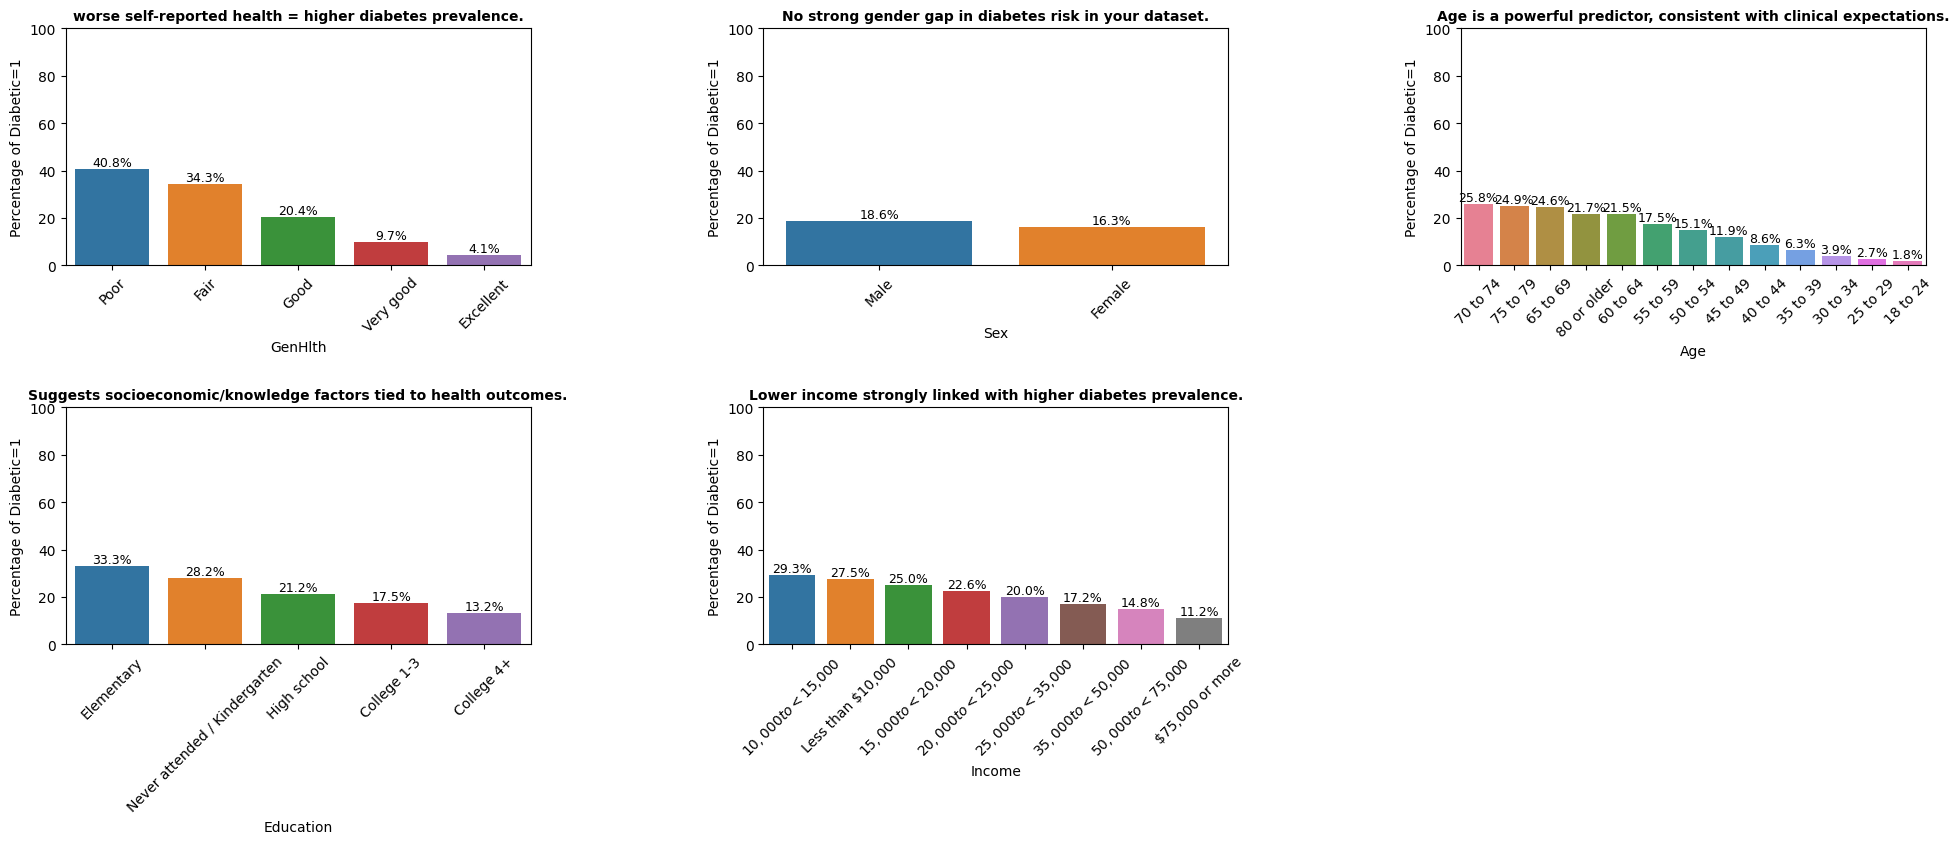

In [ ]:
#  using Percentage shares better info
import math
import matplotlib.pyplot as plt
import seaborn as sns

# EDA - Bivariate categories (proportions)
def plot_target_rate_by_category_Percent(data, target, min_count=1):
    cat_cols = [c for c in data.select_dtypes(include=['object']).columns if c != target]

    n_cols = 3  # number of subplot columns
    n_rows = math.ceil(len(cat_cols) / n_cols)

    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(n_cols * 8, n_rows * 4))
    axes = axes.flatten()

    for ax, col in zip(axes, cat_cols):
        grouped = (
            data.groupby(col)[target]
            .agg(rate="mean", count="size")  # rate = % of target=1, count = support
        )

        # keep only categories with enough rows
        grouped = grouped.query("count >= @min_count")
        grouped = grouped.sort_values("rate", ascending=False)
        grouped["rate"] = grouped["rate"] * 100
        sns.barplot(
            x=grouped.index,
            y="rate",
            data=grouped,
            ax=ax,
             hue=grouped.index,
        )

        ax.set_ylabel(f"Percentage of {target}=1")
        ax.set_ylim(0, 100)  # since it's proportion
        for p in ax.patches:
            ax.annotate(f'{p.get_height():.1f}%',
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='bottom', fontsize=9, color='black')

        ax.tick_params(axis="x", rotation=45)
        ax.set_title(col, fontsize=14, fontweight="bold")

    # Hide unused subplots
    for ax in axes[len(cat_cols):]:
        ax.axis("off")

    axes[0].set_title("worse self-reported health = higher diabetes prevalence.", fontsize=10, fontweight="bold")

    axes[1].set_title("No strong gender gap in diabetes risk in your dataset.", fontsize=10, fontweight="bold")

    axes[2].set_title("Age is a powerful predictor, consistent with clinical expectations.", fontsize=10, fontweight="bold")

    axes[3].set_title("Suggests socioeconomic/knowledge factors tied to health outcomes.", fontsize=10, fontweight="bold")
    axes[4].set_title("Lower income strongly linked with higher diabetes prevalence.", fontsize=10, fontweight="bold")
    fig.subplots_adjust(hspace=0.6, wspace=0.5)
    plt.show()

plot_target_rate_by_category_Percent(diabetes, "Diabetic")

## EDA Multi

/tmp/ipython-input-2544460297.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped.groupby('bin')['count']


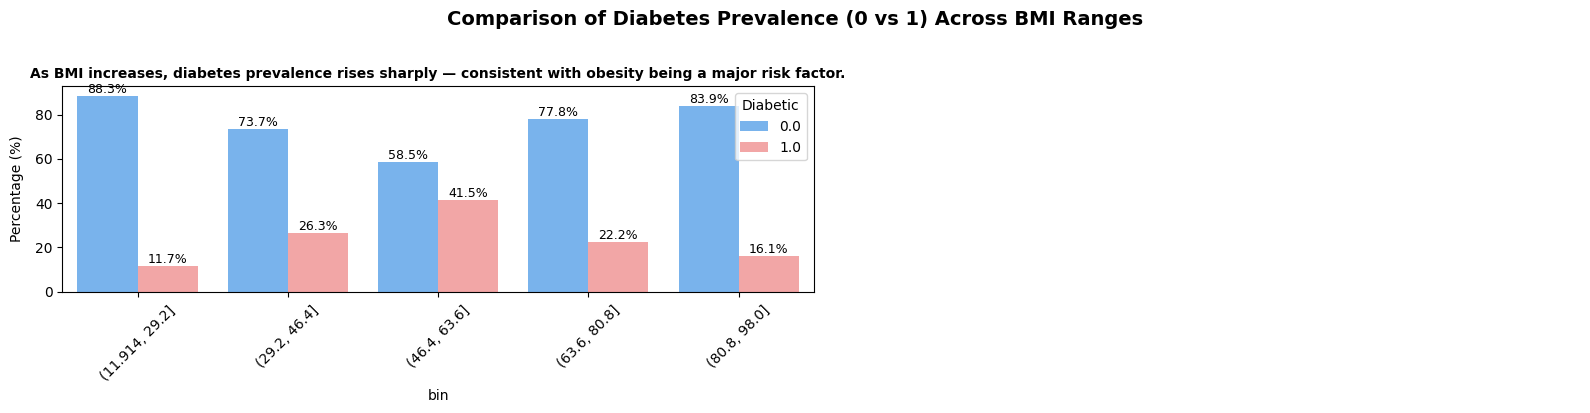

In [ ]:
def plot_target_rate_by_numeric_percent_both(data, target, bins=5):
    """
    Plot percentage of each target class (0 and 1) across binned numeric features.
    """
    num_cols = ['BMI']  # you can add more numeric columns if needed
    n_cols = 2
    n_rows = math.ceil(len(num_cols) / n_cols)

    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(n_cols * 8, n_rows * 4))
    axes = axes.flatten()

    for ax, col in zip(axes, num_cols):
        # Bin the numeric variable
        binned = pd.cut(data[col], bins=bins)

        # Compute percentage of each target class within each bin
        grouped = (
            data.groupby([binned, target], observed=True)
            .size()
            .reset_index(name='count')
        )
        grouped.rename(columns={col: 'bin'}, inplace=True)
        # Calculate percentages within each bin (sum across target)
        grouped['percentage'] = (
            grouped.groupby('bin')['count']
            .transform(lambda x: x / x.sum() * 100)
            .reset_index(drop=True)
        )

        # Barplot: compare diabetic=0 vs diabetic=1 within each BMI range
        sns.barplot(
            x='bin',
            y='percentage',
            hue=target,
            data=grouped,
            ax=ax,
            palette=['#66b3ff', '#ff9999']
        )

        ax.set_title(f"{col}", fontsize=14, fontweight="bold", pad=15)
        ax.set_ylabel("Percentage (%)", labelpad=8)
        ax.tick_params(axis="x", rotation=45, pad=5)
        ax.legend(title=f"{target}", loc='upper right')

        # Add percentage labels on top of bars
        for container in ax.containers:
            ax.bar_label(container, fmt="%.1f%%", fontsize=9)

    # Hide unused subplots
    for ax in axes[len(num_cols):]:
        ax.axis("off")

    # Adjust spacing between subplots
    fig.subplots_adjust(hspace=0.6, wspace=0.5)
    axes[0].set_title("As BMI increases, diabetes prevalence rises sharply — consistent with obesity being a major risk factor.", fontsize=10,fontweight="bold")
    fig.suptitle(
        "Comparison of Diabetes Prevalence (0 vs 1) Across BMI Ranges",
        fontsize=14, fontweight="bold", y=1.02
    )
    plt.tight_layout()
    plt.show()

plot_target_rate_by_numeric_percent_both(diabetes, "Diabetic")

🔍 Interpretation

Rising Risk with BMI up to ~60

BMI 11.9–29.2 → ~11.7% diabetic

BMI 29.2–46.4 → ~26.3% diabetic

BMI 46.4–63.6 → ~41.5% diabetic
✅ As BMI increases, diabetes prevalence rises sharply — consistent with obesity being a major risk factor.

Finding Intresting : Drop-off in very high BMI bins

BMI 63.6–80.8 → ~16.1%
BMI 80.8–98.0 → ~15.4%
⚠️ This looks counterintuitive. The likely reason is small sample sizes in these extreme BMI ranges. With very few cases, percentages become unstable.

Overall Pattern

The main signal is clear: obesity strongly increases diabetes risk.
But the extreme outliers distort the tail end and we better drop outliers.

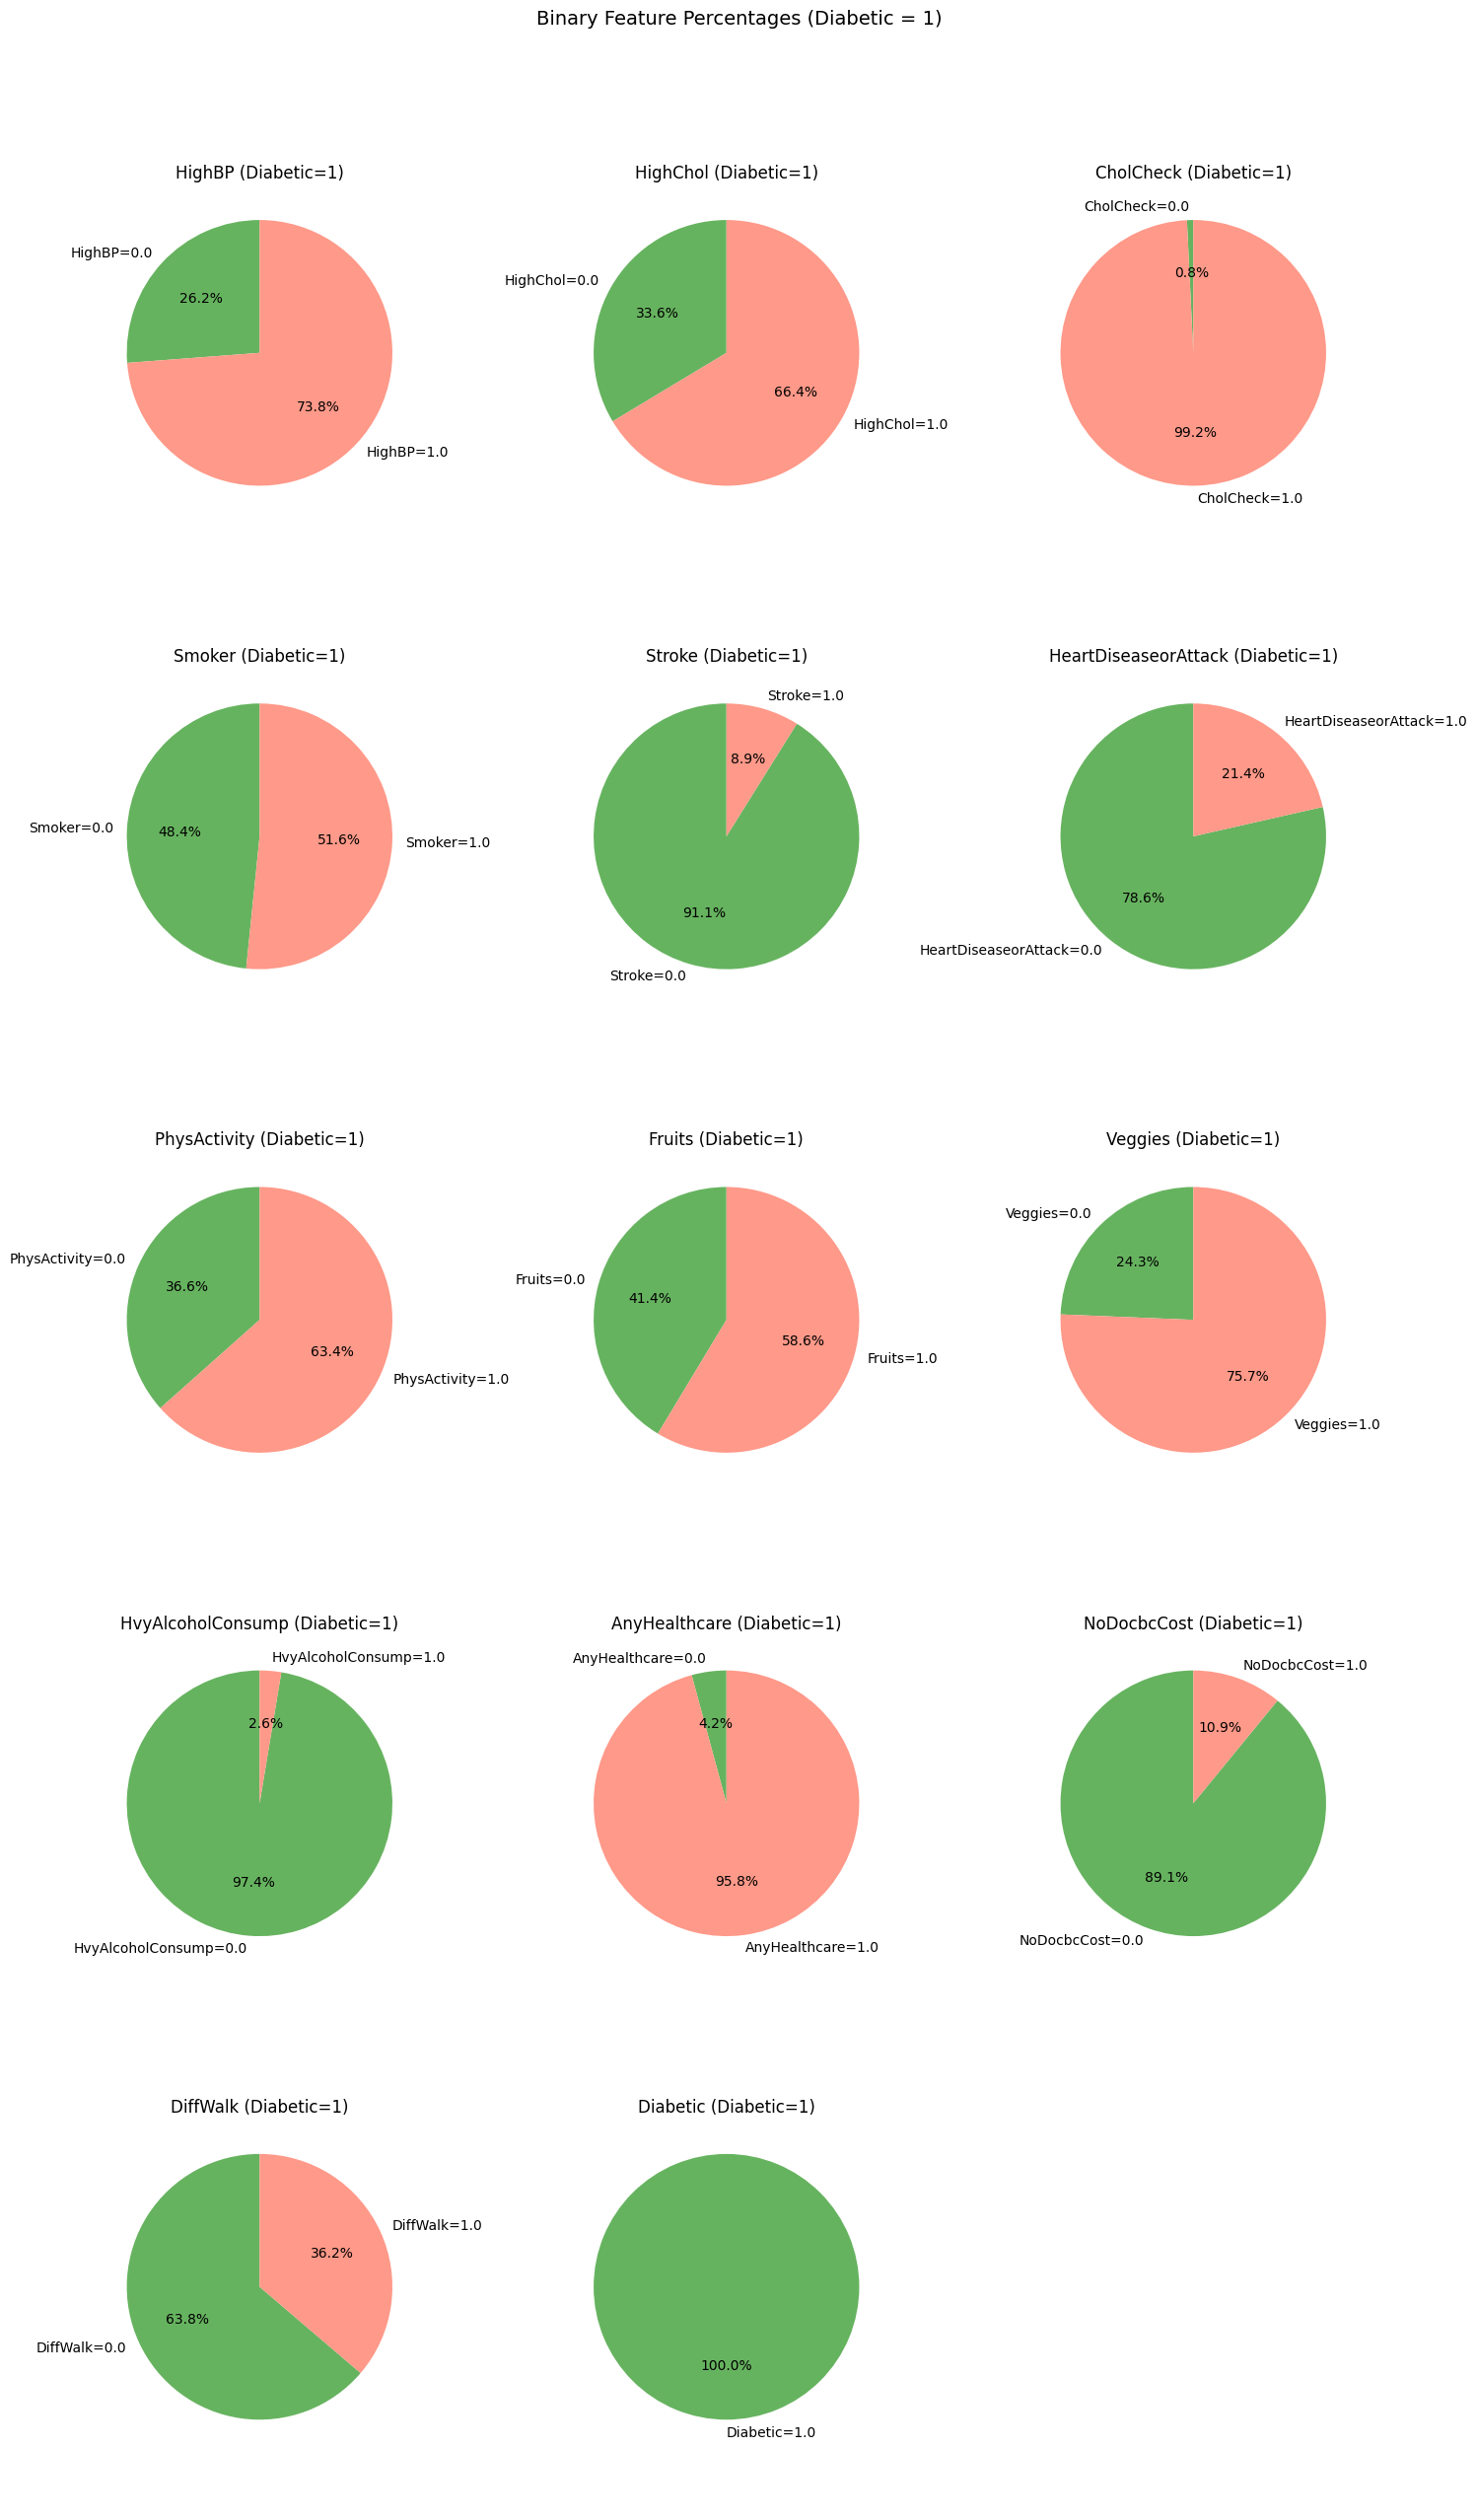

In [ ]:

def plot_binary_pies_diabetic_percentage(df, target="Diabetic"):
    """
    Create pie charts for multiple binary columns in a DataFrame,
    showing percentage distribution conditioned on Diabetic = 1.
    """
    # Filter only diabetic = 1 rows
    diabetic_df = df[df[target] == 1]

    n_cols = 3
    n_rows = -(-len(binary_cols) // n_cols)  # ceiling division

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 5))
    axes = axes.flatten()

    for ax, col in zip(axes, binary_cols):
        # calculate percentages
        percentages = diabetic_df[col].value_counts(normalize=True).sort_index() * 100

        # create labels only for existing categories
        labels = [f"{col}={val}" for val in percentages.index]

        ax.pie(percentages, labels=labels, autopct="%.1f%%",
               colors=["#66b35f", "#ff9989"], startangle=90)
        ax.set_title(f"{col} (Diabetic=1)")

    # Hide unused subplots
    for ax in axes[len(binary_cols):]:
        ax.axis("off")

    fig.suptitle("Binary Feature Percentages (Diabetic = 1)", fontsize=14, y=1.02)
    plt.tight_layout()
    plt.show()
plot_binary_pies_diabetic_percentage(diabetes)

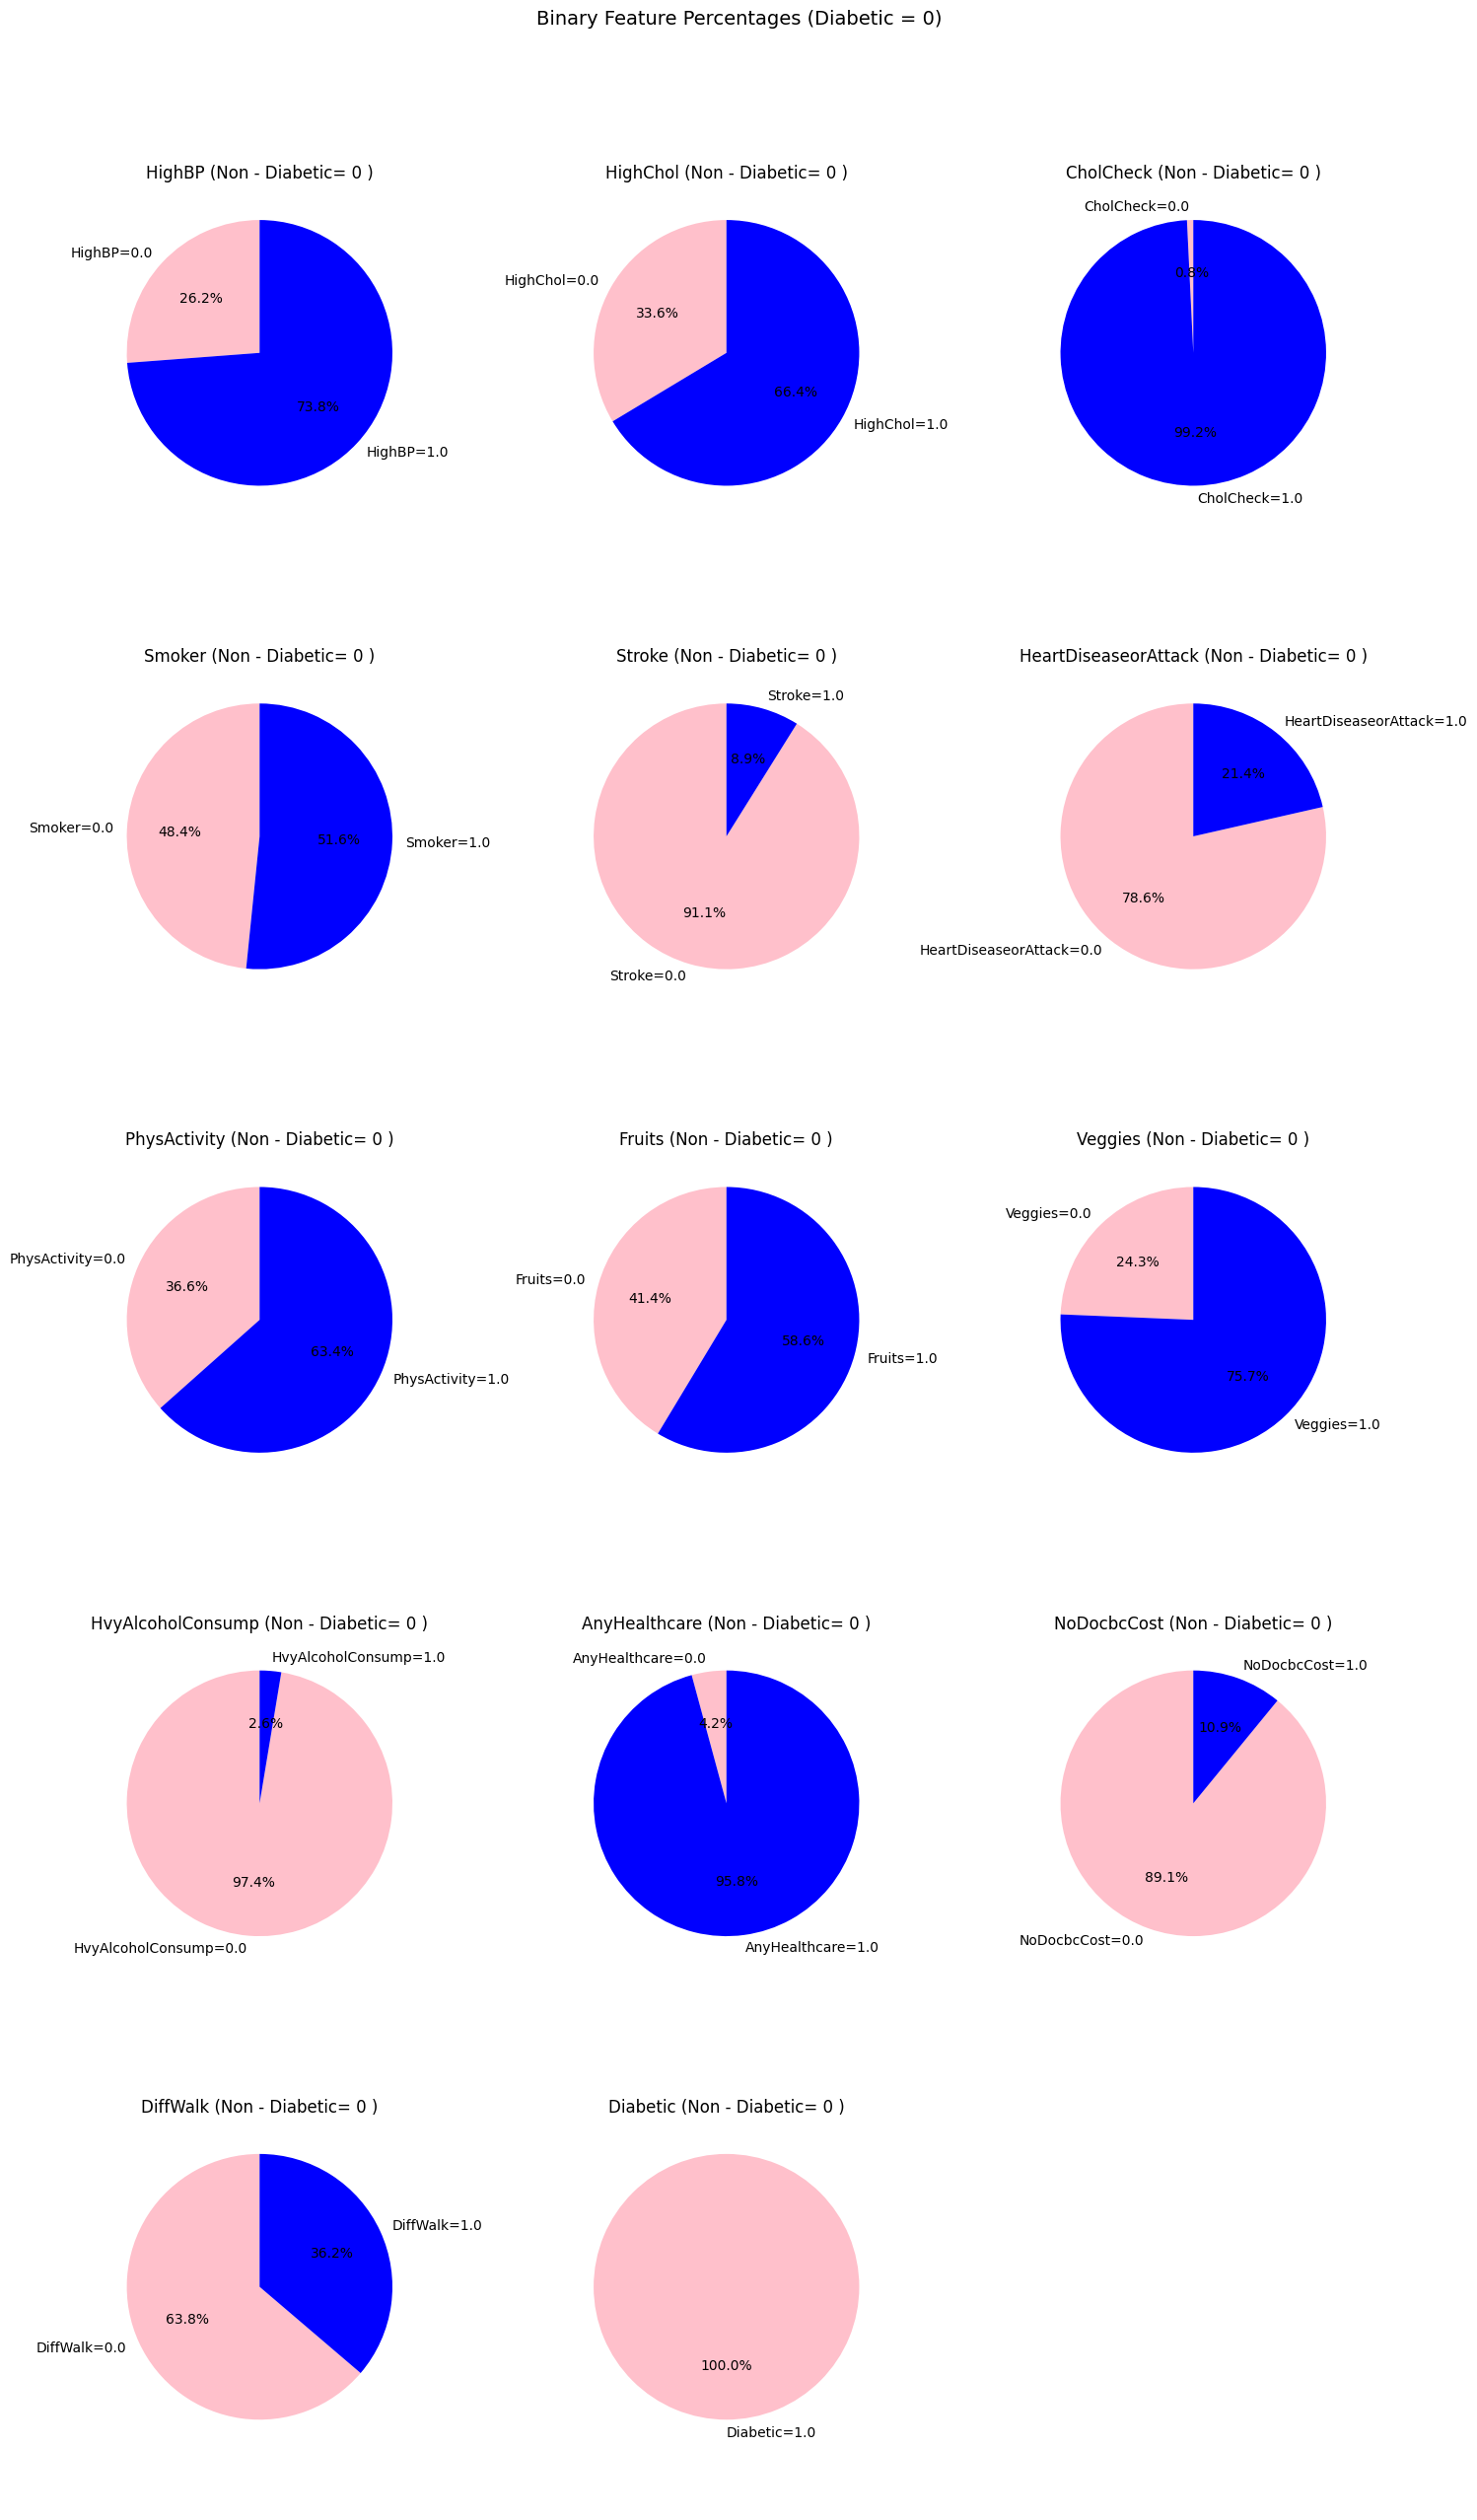

In [ ]:

def plot_binary_pies_none_diabetic_percentage(df, target="Diabetic"):
    """
    Create pie charts for multiple binary columns in a DataFrame,
    showing percentage distribution conditioned on Diabetic = 1.
    """
    # Filter only diabetic = 1 rows
    diabetic_df = df[df[target] == 1]

    n_cols = 3
    n_rows = -(-len(binary_cols) // n_cols)  # ceiling division

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 5))
    axes = axes.flatten()

    for ax, col in zip(axes, binary_cols):
        # calculate percentages
        percentages = diabetic_df[col].value_counts(normalize=True).sort_index() * 100

        # create labels only for existing categories
        labels = [f"{col}={val}" for val in percentages.index]

        ax.pie(percentages, labels=labels, autopct="%.1f%%",
               colors=["pink", "blue"], startangle=90)
        ax.set_title(f"{col} (Non - Diabetic= 0 )")

    # Hide unused subplots
    for ax in axes[len(binary_cols):]:
        ax.axis("off")

    fig.suptitle("Binary Feature Percentages (Diabetic = 0)", fontsize=14, y=1.02)
    plt.tight_layout()
    plt.show()
plot_binary_pies_none_diabetic_percentage(diabetes)

**Binary Feature Analysis (Diabetic = 1)**

| Feature                | % (Diabetic = 1) | Interpretation           |
|-------------------------|------------------|--------------------------|
| **HighBP**              | 73.8%           | ✅ Strong predictor       |
| **HighChol**            | 66.4%           | ✅ Strong predictor       |
| **CholCheck**           | 99.2%           | ⚠️ Nearly universal       |
| **Smoker**              | 51.6%           | ➡️ Weak signal            |
| **Stroke**              | 8.9%            | ⚡ Important comorbidity  |
| **HeartDisease/Attack** | 21.4%           | ⚡ Strong comorbidity     |
| **PhysActivity**        | 63.4%           | ➡️ Lifestyle factor       |
| **Fruits**              | 58.6%           | ➡️ Lifestyle factor       |
| **Veggies**             | 75.7%           | ➡️ Lifestyle factor       |
| **HvyAlcoholConsump**   | 2.6%            | ❌ Very weak signal       |
| **AnyHealthcare**       | 95.8%           | ⚠️ Nearly universal       |
| **NoDocbcCost**         | 10.9%           | ➡️ Limited predictor      |
| **DiffWalk**            | 36.2%           | ✅ Strong complication    |

---

**✅ Takeaways**
- **Keep for Modeling** → HighBP, HighChol, HeartDisease/Attack, DiffWalk  
- **Drop or Downweight** → CholCheck(Because almost everyone has these, they provide **little predictive value**.), AnyHealthcare, HvyAlcoholConsump  
- **Consider with Care** → Smoking, Fruits, Veggies, Physical Activity (Lifestyle factors are present but **do not strongly separate diabetics from non-diabetics**)

 **Binary Feature Comparison: Diabetic = 1 vs 0**

| Feature | % (1) in Diabetic = 1 | % (1) in Diabetic = 0 | Δ (percentage points) | Key Insight |
|----------|-----------------------|-----------------------|------------------------|--------------|
| **HighBP** | 73.8 % | 25.8 % | **+48.0 pp** | Strongest predictor – hypertension highly associated with diabetes |
| **HighChol** | 66.4 % | 33.1 % | **+33.3 pp** | High cholesterol strongly linked to diabetes |
| **CholCheck** | 99.2 % | 99.2 % | 0.0 pp | Nearly universal – low variance |
| **Smoker** | 51.6 % | 51.5 % | +0.1 pp | Similar across groups – weak signal |
| **Stroke** | 8.9 % | 9.0 % | −0.1 pp | No difference – not predictive |
| **HeartDisease/Attack** | 21.4 % | 21.5 % | −0.1 pp | Comparable prevalence |
| **PhysActivity** | 63.4 % | 64.3 % | −0.9 pp | Slightly higher among non-diabetics |
| **Fruits** | 58.6 % | 59.2 % | −0.6 pp | Nearly identical – weak signal |
| **Veggies** | 75.7 % | 76.0 % | −0.3 pp | Nearly identical – weak signal |
| **HvyAlcoholConsump** | 2.6 % | 2.7 % | −0.1 pp | Very low prevalence in both |
| **AnyHealthcare** | 95.8 % | 95.3 % | +0.5 pp | Almost everyone has access – not predictive |
| **NoDocbcCost** | 10.9 % | 11.1 % | −0.2 pp | Minimal difference |
| **DiffWalk** | 36.2 % | 35.9 % | +0.3 pp | Similar – weak indicator |

---

 **Interpretation**

- **Most predictive binary features:**  
  🟥 `HighBP` and 🟧 `HighChol` show large differences between groups → strong predictors.  

- **Low-value / low-variance features:**  
  `CholCheck`, `AnyHealthcare`, and `HvyAlcoholConsump` — nearly universal or rare, so they contribute little.  

- **Neutral / non-predictive:**  
  Lifestyle features (`Smoker`, `PhysActivity`, `Fruits`, `Veggies`) show minimal class differences.  

---

✅ **Modeling Recommendation**
- **Keep:** `HighBP`, `HighChol` (strong signal)  
- **Consider dropping:** `CholCheck`, `AnyHealthcare`, `HvyAlcoholConsump` (low variance)  
- **Optionally test:** `DiffWalk`, `HeartDisease/Attack` (may interact with numeric features like BMI or Age)

In [ ]:
# Correlation features and Diabetic
corr_matrix = diabetes.corr(numeric_only=True)
print(corr_matrix)

                        HighBP  HighChol  CholCheck       BMI    Smoker  \
HighBP                1.000000  0.284186   0.111220  0.194126  0.074237   
HighChol              0.284186  1.000000   0.094753  0.089615  0.074627   
CholCheck             0.111220  0.094753   1.000000  0.042420 -0.003776   
BMI                   0.194126  0.089615   0.042420  1.000000 -0.009196   
Smoker                0.074237  0.074627  -0.003776 -0.009196  1.000000   
Stroke                0.124426  0.089258   0.027894  0.011062  0.054438   
HeartDiseaseorAttack  0.201271  0.176279   0.049995  0.039926  0.105154   
PhysActivity         -0.104131 -0.063266  -0.004409 -0.127864 -0.066981   
Fruits               -0.019329 -0.026125   0.017973 -0.067528 -0.061947   
Veggies              -0.042853 -0.027254  -0.000537 -0.044185 -0.013892   
HvyAlcoholConsump    -0.014218 -0.019104  -0.021043 -0.058334  0.096052   
AnyHealthcare         0.052084  0.052412   0.115539 -0.008560 -0.013983   
NoDocbcCost           0.0

HighBP                  0.260346
BMI                     0.211155
DiffWalk                0.208126
HighChol                0.204418
HeartDiseaseorAttack    0.167184
PhysHlth                0.158697
Stroke                  0.097685
CholCheck               0.076190
MentHlth                0.058826
Smoker                  0.046262
NoDocbcCost             0.025940
AnyHealthcare           0.023756
Fruits                 -0.024968
Veggies                -0.043339
HvyAlcoholConsump      -0.066111
PhysActivity           -0.102391
Name: Diabetic, dtype: float64


/tmp/ipython-input-3595867321.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_corr.values, y=target_corr.index, palette="coolwarm")


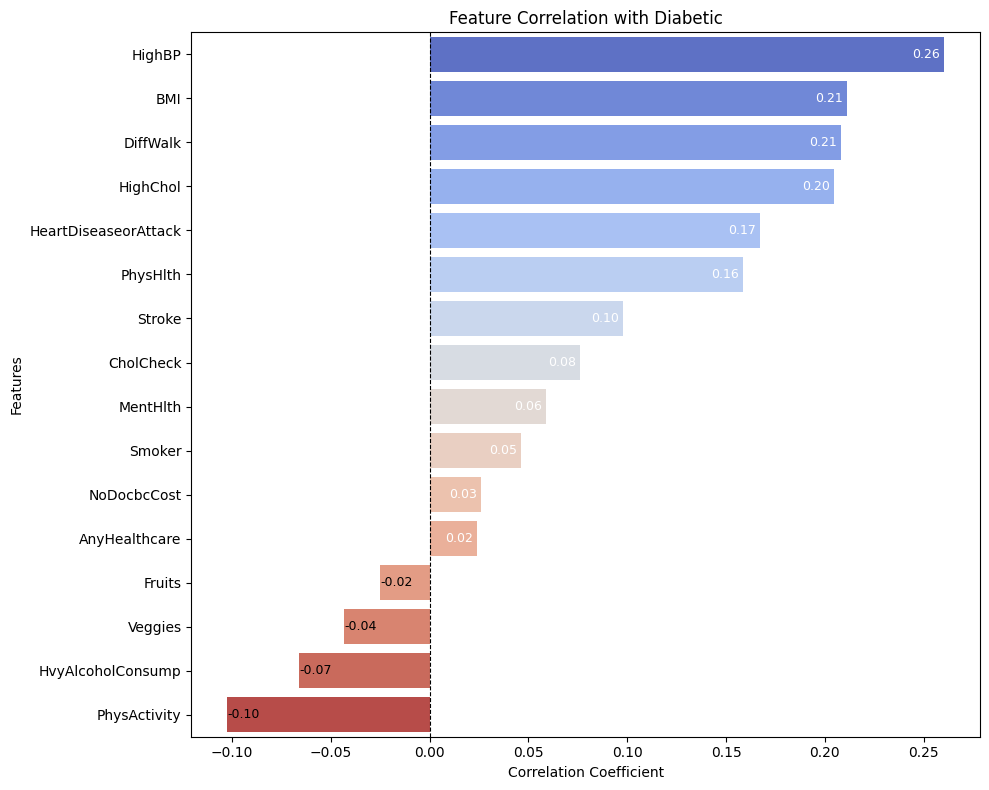

In [ ]:
# Compute correlations (numeric only)
corr_matrix = diabetes.corr(numeric_only=True)

# Get correlations with target column
target_corr = corr_matrix["Diabetic"].drop("Diabetic").sort_values(ascending=False)

print (target_corr)

plt.figure(figsize=(10,8))
sns.barplot(x=target_corr.values, y=target_corr.index, palette="coolwarm")

plt.title("Feature Correlation with Diabetic")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Features")
plt.axvline(0, color="black", linestyle="--", linewidth=0.8)

# Add labels
for i, v in enumerate(target_corr.values):
    if v > 0:
        plt.text(v-0.002 , i, f"{v:.2f}", va="center", ha="right", color="white", fontsize=9)
    else:
        plt.text(v + 0, i, f"{v:.2f}", va="center", ha="left", color="black", fontsize=9)


plt.tight_layout()
plt.show()

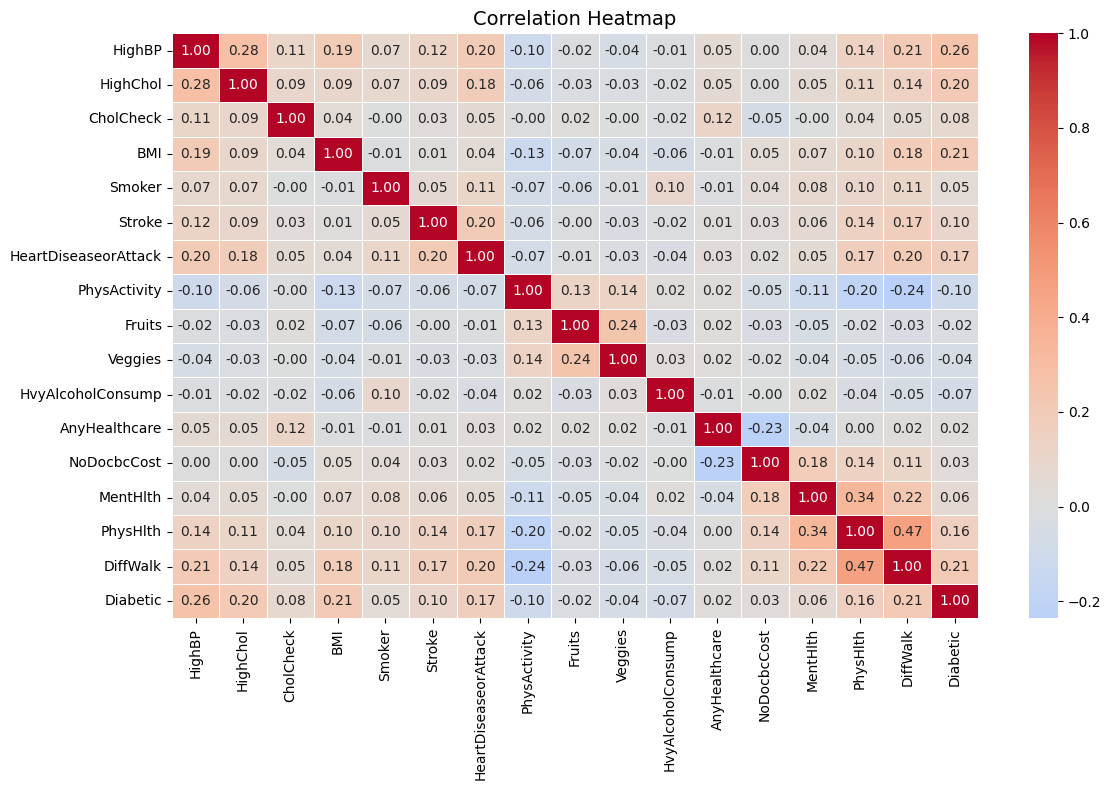

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(
    corr_matrix,
    annot=True,        # show correlation values
    fmt=".2f",         # 2 decimal places
    cmap="coolwarm",   # color map
    center=0,          # 0 at the center
    linewidths=0.5
)

plt.title("Correlation Heatmap", fontsize=14)
plt.tight_layout()
plt.show()

**Feature Correlation with Diabetes**

This chart and table summarize how strongly each feature correlates with the **Diabetic** outcome.  
Positive correlations (🔵) indicate a higher likelihood of diabetes, while negative correlations (🔴) suggest protective or inverse effects.

| Rank | Feature | Correlation | Interpretation | Decision |
|------|----------|-------------|----------------|----------------|
| 1️⃣ | **HighBP** | **+0.26** | Strongest correlation — hypertension is a major diabetes predictor | ✅ Keep |
| 2️⃣ | **DiffWalk** | **+0.21** | Walking difficulty often linked to obesity and metabolic risk | ✅ Keep |
| 3️⃣ | **HighChol** | **+0.21** | Elevated cholesterol — strong metabolic signal | ✅ Keep |
| 4️⃣ | **BMI** | **+0.19** | Higher BMI strongly associated with diabetes risk | ✅ Keep |
| 5️⃣ | **HeartDisease/Attack** | **+0.17** | Moderate comorbidity with diabetes | ⚠️ Test |
| 6️⃣ | **PhysHlth** | **+0.17** | Poor physical health more common in diabetics | ⚠️ Test |
| 7️⃣ | **Stroke** | **+0.10** | Mild relationship — secondary complication | ⚠️ Test |
| 8️⃣ | **CholCheck** | **+0.07** | Nearly universal; limited variation | ❌ Drop |
| 9️⃣ | **MentHlth** | **+0.07** | Slight positive correlation; possible stress factor | ⚠️ Test |
| 🔟 | **Smoker** | **+0.05** | Minimal effect; similar rates in both groups | ⚠️ Test |
| 11 | **NoDocbcCost** | **+0.03** | Cost barriers not strongly related | ❌ Drop |
| 12 | **AnyHealthcare** | **+0.01** | Almost everyone has healthcare — low variance | ❌ Drop |
| 13 | **Fruits** | **−0.03** | Slightly protective, weak signal | ⚠️ Test |
| 14 | **Veggies** | **−0.05** | Weak inverse link — healthier lifestyle | ⚠️ Test |
| 15 | **HvyAlcoholConsump** | **−0.06** | Low prevalence, minor effect | ❌ Drop |
| 16 | **PhysActivity** | **−0.11** | Moderate *protective* effect; active individuals less likely diabetic | ✅ Keep |

---

 **🧠 Summary**
- **Top Predictors:** `HighBP`, `HighChol`, `BMI`, `DiffWalk` — these drive most of the predictive signal.  
- **Moderate Predictors:** `HeartDisease/Attack`, `PhysHlth`, `Stroke` — useful in tree-based models or interactions.  
- **Low-Variance / Weak:** `CholCheck`, `AnyHealthcare`, `NoDocbcCost` — drop or downweight before modeling.  
- **Protective / Lifestyle Factors:** `PhysActivity`, `Veggies`, `Fruits` — retain for completeness and interpretability.

---

✅ Modeling Strategy
1. **Keep:** `HighBP`, `HighChol`, `BMI`, `DiffWalk`, `PhysActivity`  
2. **Test (Moderate):** `HeartDisease/Attack`, `PhysHlth`, `Stroke`, `Fruits`, `Veggies`, `Smoker`  
3. **Drop (Low Variance):** `CholCheck`, `AnyHealthcare`, `NoDocbcCost`, `HvyAlcoholConsump`


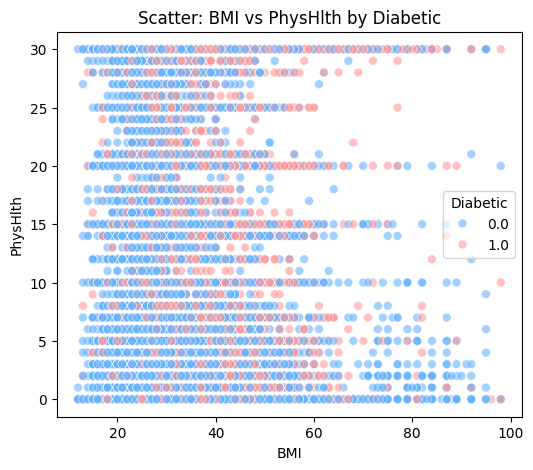

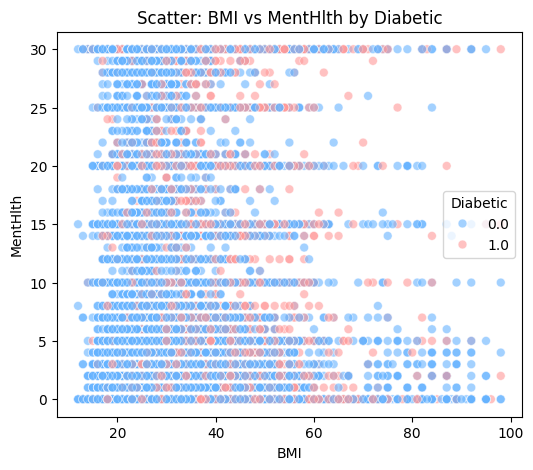

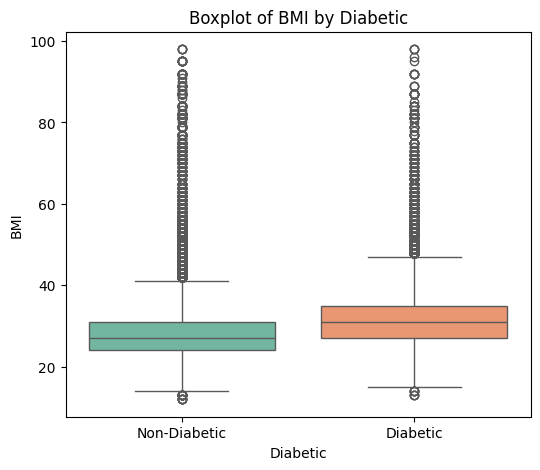

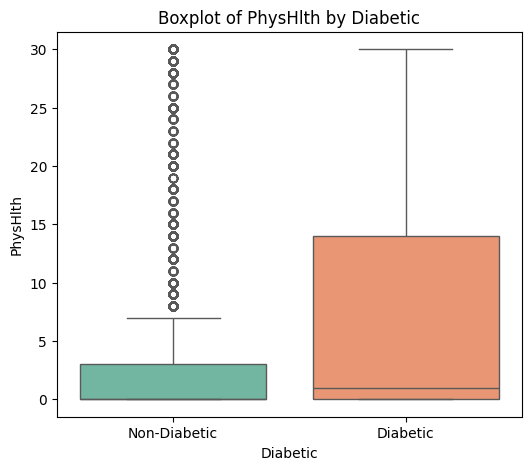

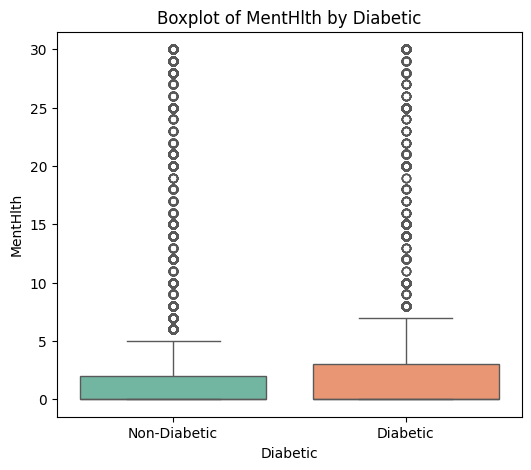

In [ ]:
def scatter_by_target(df, x, y, target):
    plt.figure(figsize=(6,5))
    sns.scatterplot(data=df, x=x, y=y, hue=target, alpha=0.6, palette=["#66b3ff", "#ff9999"] ,s=40)
    plt.title(f"Scatter: {x} vs {y} by {target}")
    plt.show()

def boxplot_by_target(df, feature, target):
    plt.figure(figsize=(6,5))
    sns.boxplot(data=df, x=target, y=feature, palette="Set2")
    plt.title(f"Boxplot of {feature} by {target}")
    plt.xticks([0,1], ["Non-Diabetic", "Diabetic"])
    plt.show()

# Usage
scatter_by_target(diabetes, "BMI", "PhysHlth", "Diabetic")
scatter_by_target(diabetes, "BMI", "MentHlth", "Diabetic")

boxplot_by_target(diabetes, "BMI", "Diabetic")
boxplot_by_target(diabetes, "PhysHlth", "Diabetic")
boxplot_by_target(diabetes, "MentHlth", "Diabetic")

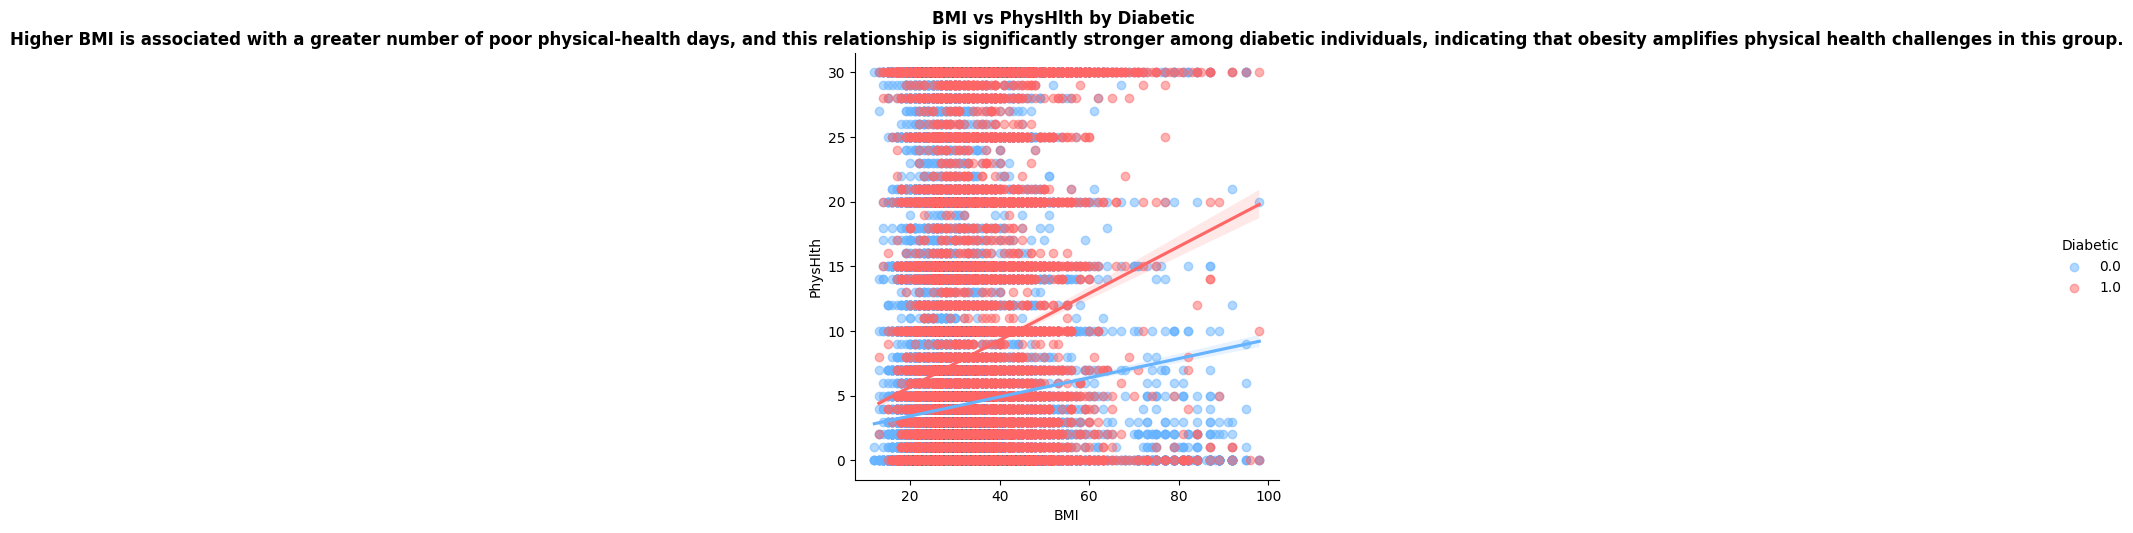

In [ ]:
sns.lmplot(data=diabetes, x="BMI", y="PhysHlth", hue="Diabetic",
           palette={0: "#66b3ff", 1: "#ff6666"}, scatter_kws={'alpha':0.5})
plt.title("BMI vs PhysHlth by Diabetic \nHigher BMI is associated with a greater number of poor physical-health days, and this relationship is significantly stronger among diabetic individuals, indicating that obesity amplifies physical health challenges in this group.",fontweight="bold", loc="center")
plt.show()

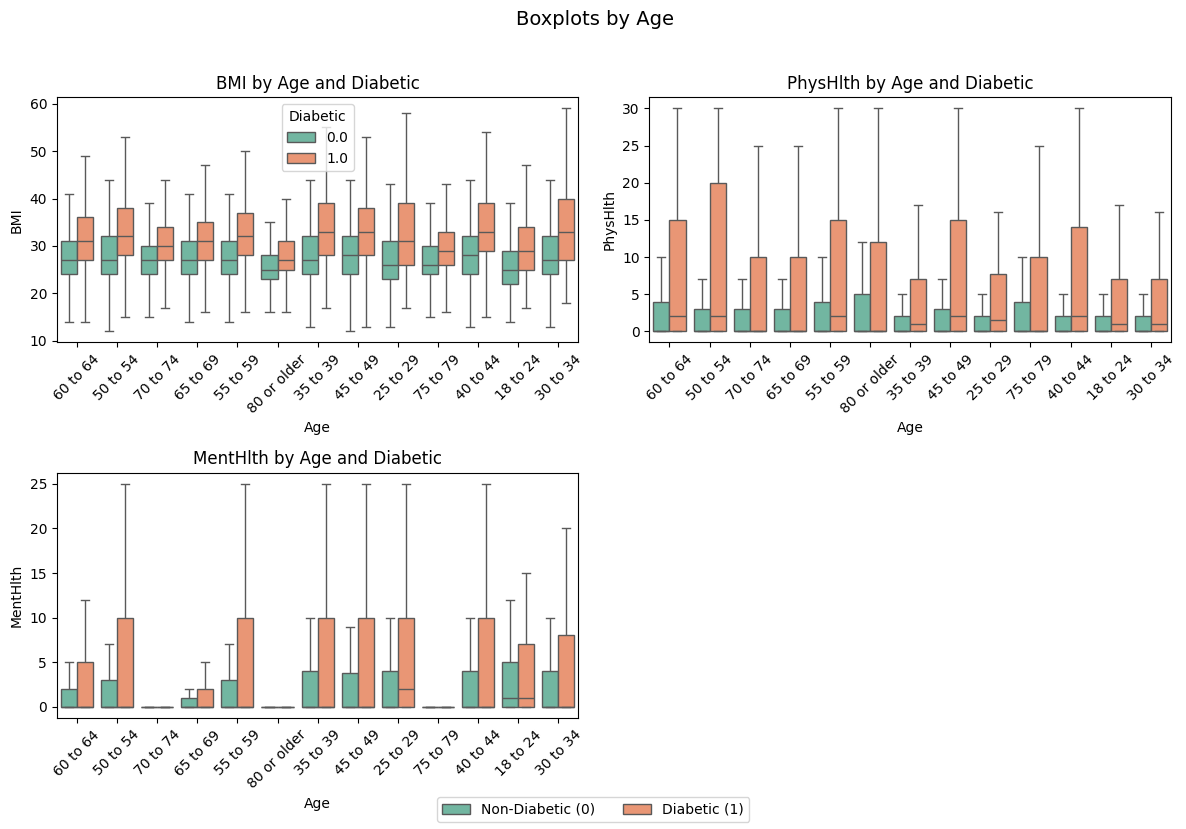

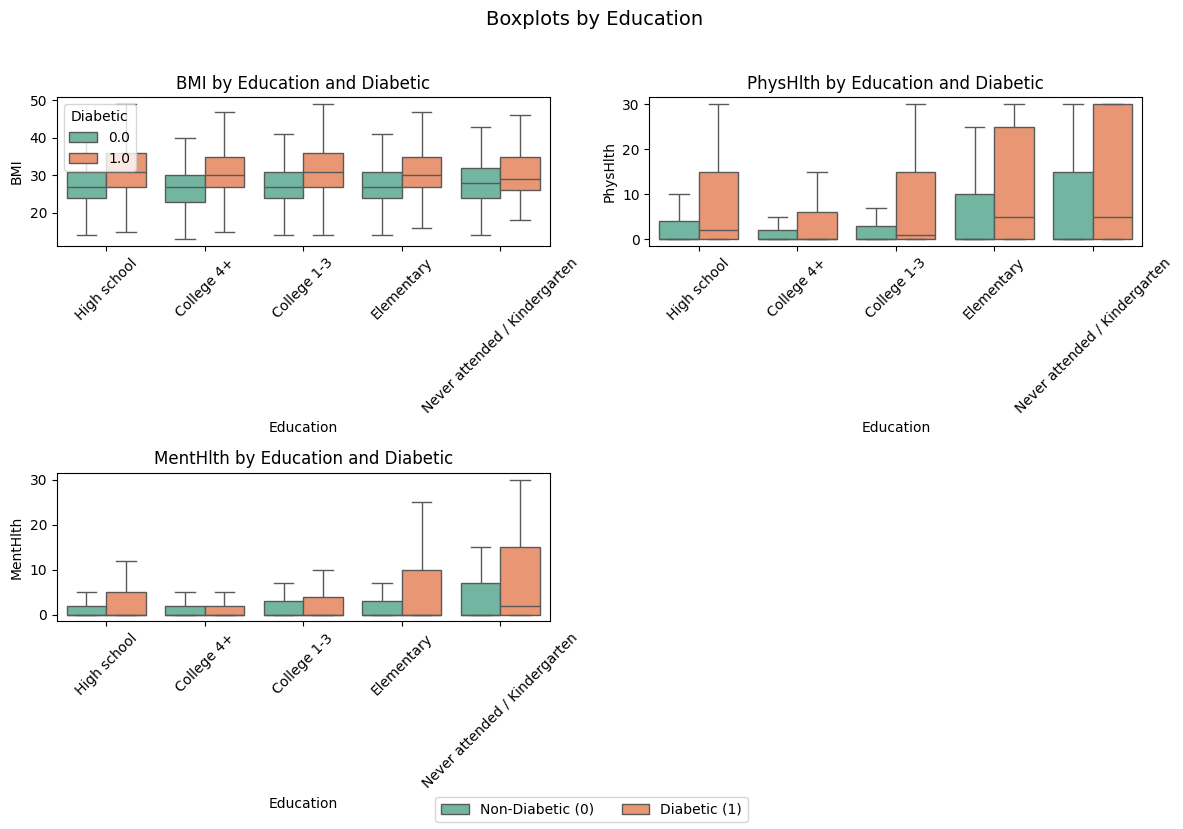

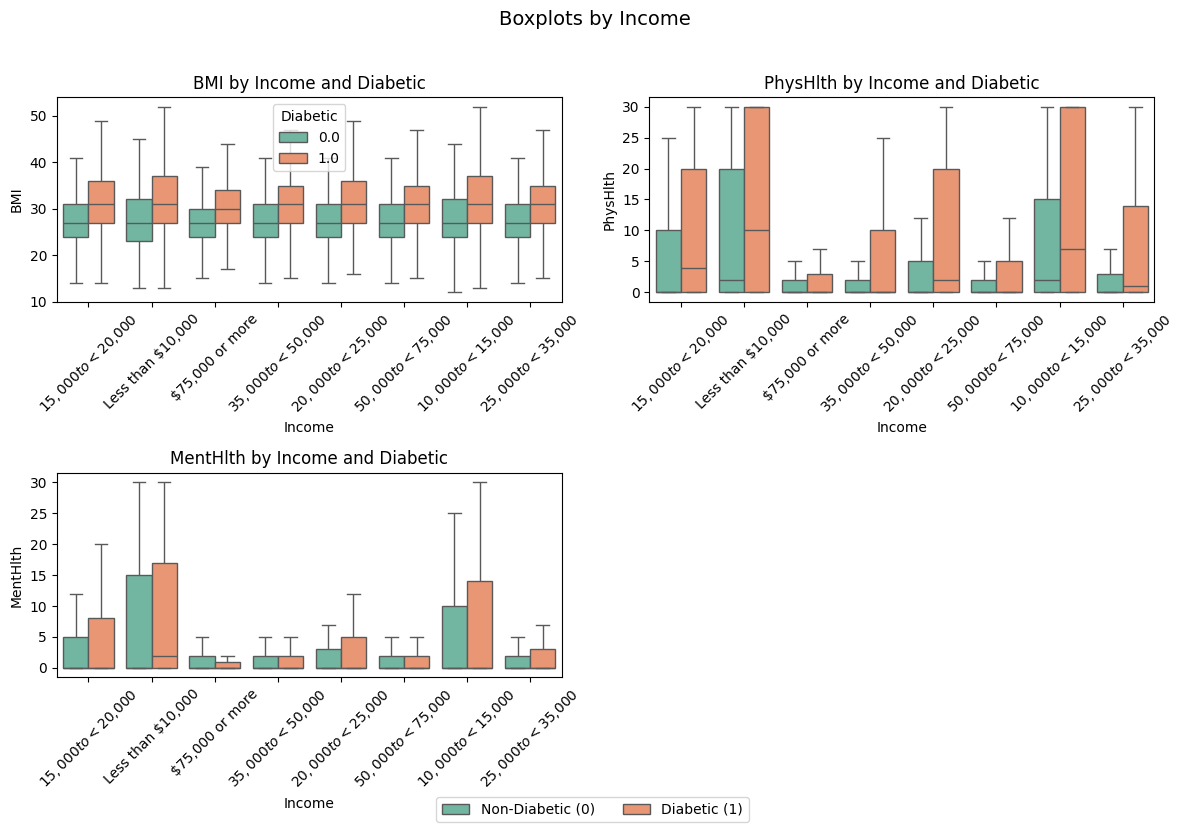

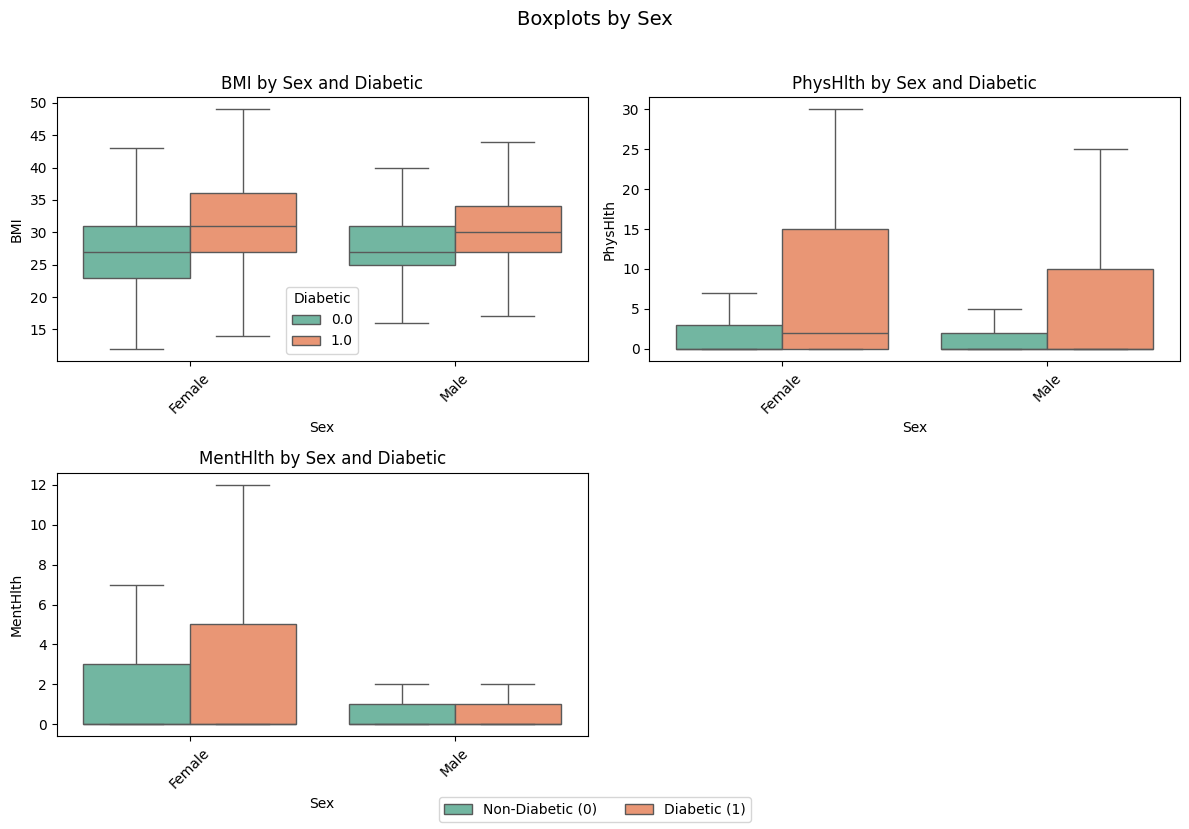

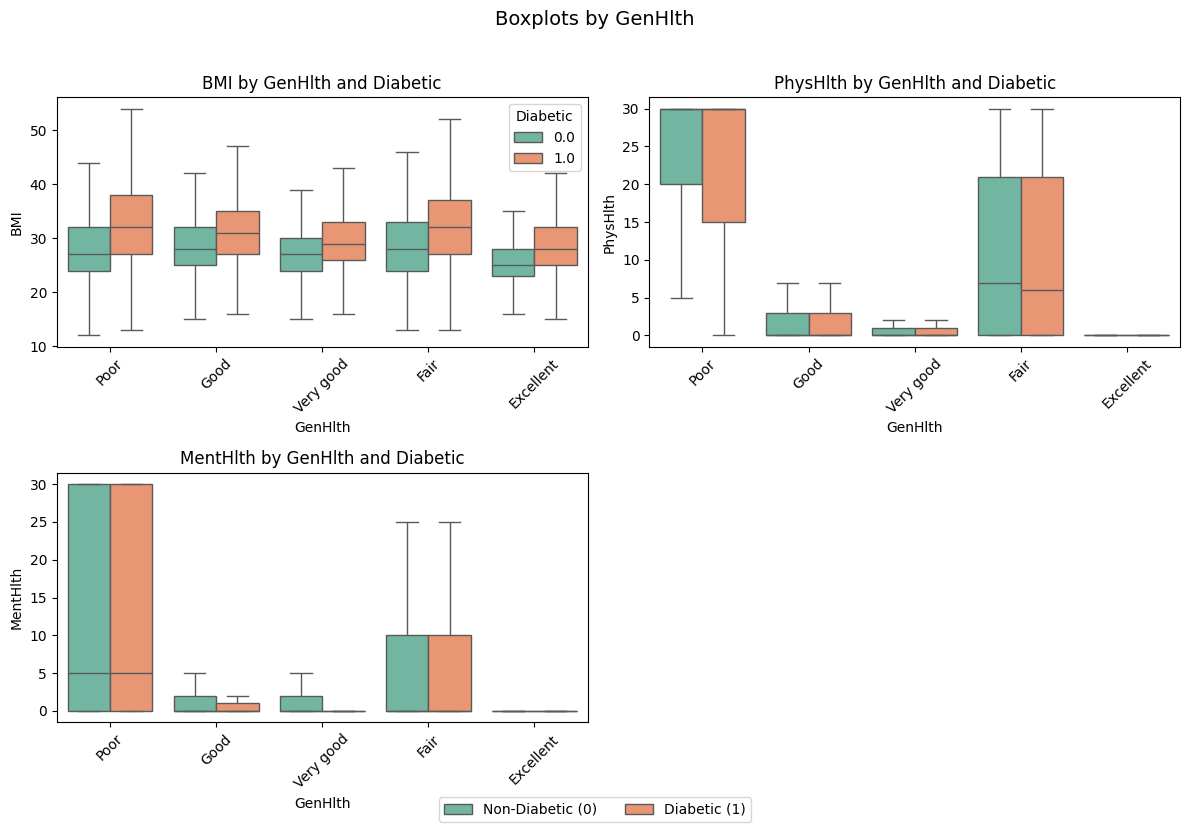

In [ ]:

def boxplots_by_cat_and_numeric(df, cat_cols, num_cols, target="Diabetic", ncols=2, showfliers=False):
    """
    For each categorical column, draw boxplots of multiple numeric columns,
    split by a binary target (0/1).

    Parameters
    ----------
    df : pd.DataFrame
    cat_cols : list[str]  # e.g., ["Age_cat","Education_cat","Income_cat","Sex_cat"]
    num_cols : list[str]  # e.g., ["BMI","PhysHlth","MentHlth"]
    target : str          # default "Diabetic"
    ncols : int           # subplots per row
    showfliers : bool     # show outliers in boxplot
    """
    for cat in cat_cols:
        n = len(num_cols)
        nrows = math.ceil(n / ncols)
        fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*6, nrows*4), squeeze=False)
        axes = axes.flatten()

        for ax, num in zip(axes, num_cols):
            sns.boxplot(
                data=df, x=cat, y=num, hue=target,
                palette="Set2", ax=ax, showfliers=showfliers
            )
            ax.set_title(f"{num} by {cat} and {target}")
            ax.set_xlabel(cat)
            ax.set_ylabel(num)
            ax.tick_params(axis="x", rotation=45)
            # legend only on the first subplot
            if ax is not axes[0]:
                ax.legend_.remove() if ax.get_legend() else None

        # tidy unused axes
        for ax in axes[n:]:
            ax.axis("off")

        # put one legend at the bottom
        handles, labels = axes[0].get_legend_handles_labels()
        fig.legend(handles, ["Non-Diabetic (0)", "Diabetic (1)"], loc="lower center", ncol=2)
        fig.suptitle(f"Boxplots by {cat}", y=1.02, fontsize=14)
        plt.tight_layout()
        plt.show()


cat_cols = ["Age", "Education", "Income", "Sex", "GenHlth"]
num_cols = ["BMI", "PhysHlth", "MentHlth"]
boxplots_by_cat_and_numeric(diabetes, cat_cols, num_cols, target="Diabetic", ncols=2, showfliers=False)

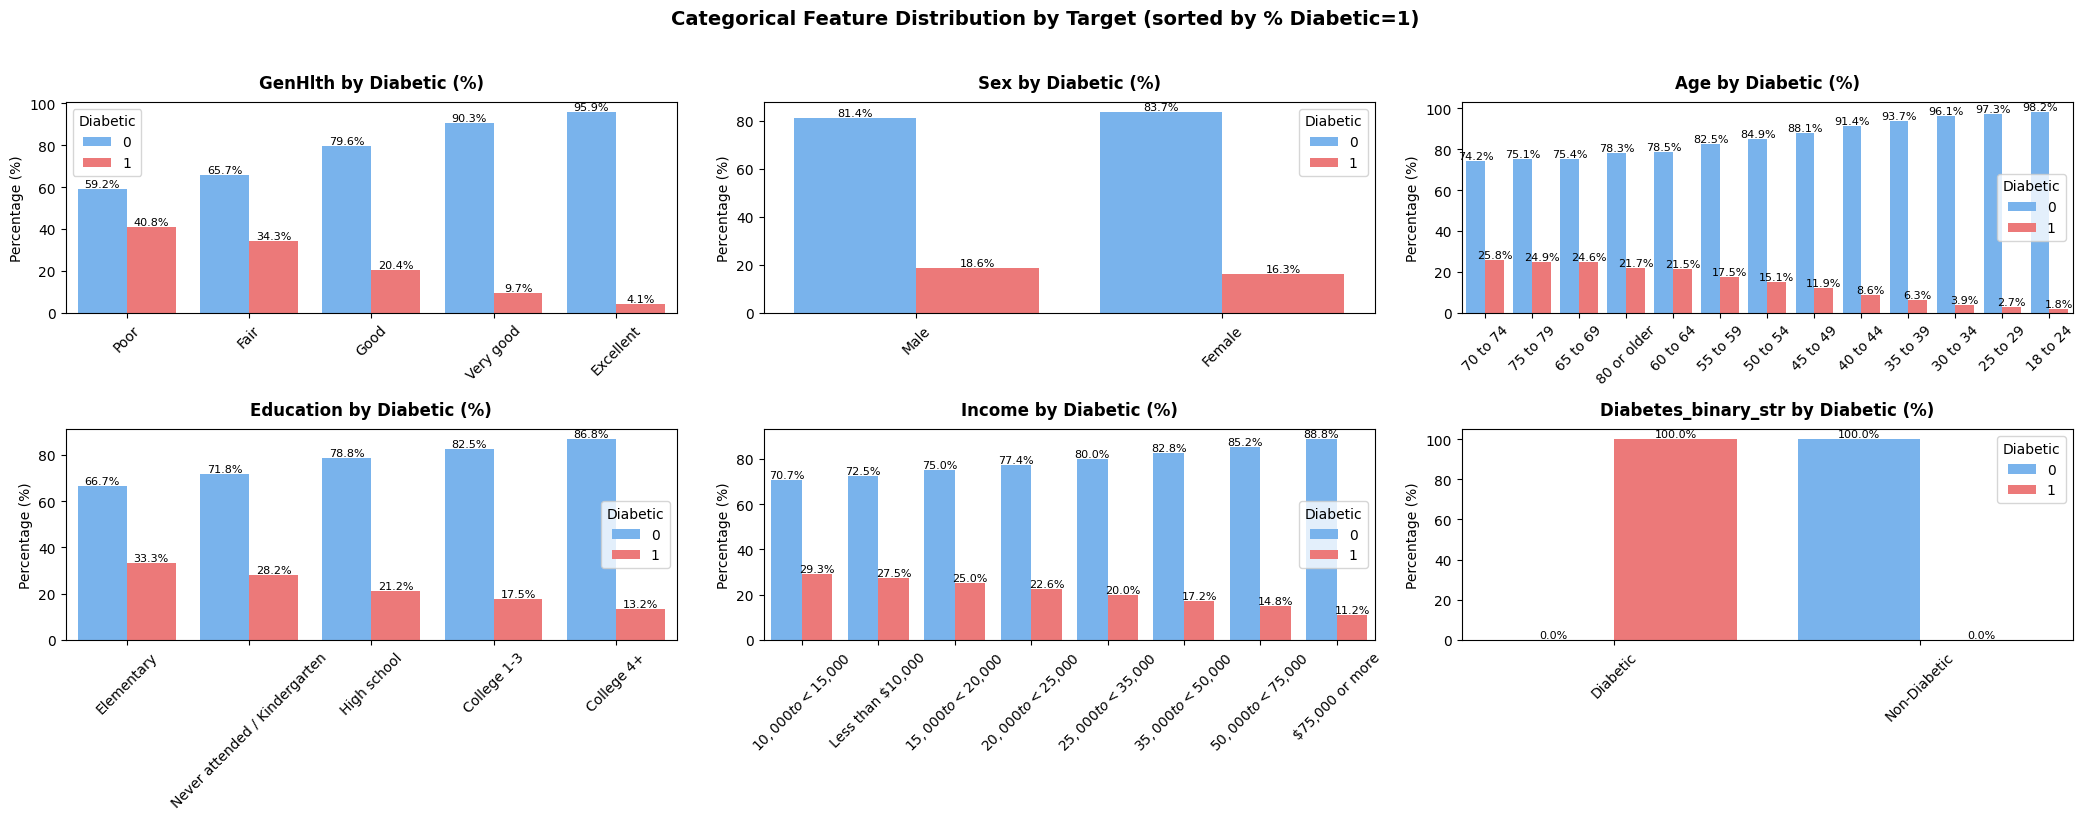

In [ ]:
def plot_category_percentage_sorted(data, target,n_cols=3):
    """
    For each categorical column, plot bar charts of % by target class (0/1),
    sorted by the diabetic (target=1) percentage (descending).
    """
    cat_cols = [c for c in data.select_dtypes(include=['object', 'category']).columns if c != target]

    n_rows = math.ceil(len(cat_cols) / n_cols)
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 7, n_rows * 4))
    axes = axes.flatten()

    for ax, col in zip(axes, cat_cols):
        # Crosstab -> ensure both classes (0,1) exist; compute row-wise %
        ct = pd.crosstab(data[col], data[target]).reindex(columns=[0, 1], fill_value=0)
        perc = (ct.div(ct.sum(axis=1), axis=0) * 100).reset_index()

        # Long format: col, target, Percentage
        perc = perc.melt(id_vars=col, value_vars=[0, 1], var_name=target, value_name="Percentage")

        # Order categories by % of target==1
        order = (perc[perc[target] == 1]
                 .sort_values("Percentage", ascending=False)[col]
                 .tolist())
        perc[col] = pd.Categorical(perc[col], categories=order, ordered=True)

        # Plot
        sns.barplot(
            data=perc,
            x=col, y="Percentage",
            hue=target, ax=ax,
            palette={0: "#66b3ff", 1: "#ff6666"}
        )
        ax.set_title(f"{col} by {target} (%)", fontsize=12, fontweight="bold", pad=10)
        ax.set_ylabel("Percentage (%)")
        ax.set_xlabel("")
        ax.tick_params(axis="x", rotation=45)
        ax.legend(title=target, loc="best")

        # Optional: label bars
        for container in ax.containers:
            ax.bar_label(container, fmt="%.1f%%", fontsize=8)

    # Hide unused axes
    for ax in axes[len(cat_cols):]:
        ax.axis("off")

    fig.suptitle("Categorical Feature Distribution by Target (sorted by % Diabetic=1)", fontsize=14, fontweight="bold", y=1.02)
    plt.tight_layout()
    plt.show()
plot_category_percentage_sorted(diabetes, target="Diabetic")


🩺 **Categorical Feature Analysis (Diabetic vs Non-Diabetic)**

| **Feature** | **Pattern / Trend Observed** | **Key Insights** |
|--------------|------------------------------|------------------|
| **GenHlth (General Health)** | As self-rated health improves from *Poor → Excellent*, diabetes prevalence drops sharply (41% → 3.9%). | Poor perceived health is strongly associated with higher diabetes rates. |
| **Sex** | Males (17.9%) and females (15.8%) show similar diabetic proportions, slightly higher in males. | Gender shows only mild variation in diabetes prevalence. |
| **Age** | Diabetes prevalence increases with age — from 2% (ages 18–24) to ~25% (ages 70–74). | Clear age-related risk: older adults are far more likely to have diabetes. |
| **Education** | Diabetes rate decreases with higher education — from 35% (no schooling) → 12.6% (college 4+). | Education may correlate with health literacy and preventive behavior. |
| **Income** | Lower income brackets show higher diabetes rates (29% for < $15k vs 10.7% for ≥ $75k). | Financial constraints likely impact access to healthcare and diet quality. |

---
🧩 **Summary**
- **Strongest associations:** Age ↑, Income ↓, Education ↓ ,General Health ↓
- **Weakest associations:** Sex and minor differences in self-reported health categories(“GenHlth” looks strong descriptively, but weak as an independent feature once objective factors (BMI, PhysHlth, Age) are included.

It’s redundant, not irrelevant.)  
- **Overall pattern:** Socioeconomic and lifestyle factors — especially **low income**, **limited education**, and **older age** — are strongly tied to higher diabetes prevalence.  

In [ ]:

def conv_rate_by(col):
    out = (diabetes.groupby(col, observed=True)['Diabetic']
             .agg(Diabete_rate='mean',size='size')
             .sort_values('Diabete_rate', ascending=False))
    return out

if 'Diabetic' in cat_cols:
    cat_cols.remove('Diabetic')

for c in cat_cols:
    print(f"\n=== {c} ===")
    print(conv_rate_by(c).round({'Diabete_rate': 3}))


=== Age ===
             Diabete_rate   size
Age                             
70 to 74            0.258  22041
75 to 79            0.249  15394
65 to 69            0.246  29168
80 or older         0.217  16813
60 to 64            0.215  29736
55 to 59            0.175  27301
50 to 54            0.151  23140
45 to 49            0.119  17299
40 to 44            0.086  14050
35 to 39            0.063  12234
30 to 34            0.039  10025
25 to 29            0.027   7068
18 to 24            0.018   5512

=== Education ===
                               Diabete_rate   size
Education                                         
Elementary                            0.333   4040
Never attended / Kindergarten         0.282    174
High school                           0.212  70625
College 1-3                           0.175  66499
College 4+                            0.132  88443

=== Income ===
                     Diabete_rate   size
Income                                  
$10,000 to <$15,00

In [ ]:
# Compute percentages
result = (
    diabetes.groupby(["HighBP", "HighChol"])["Diabetic"]
    .value_counts(normalize=True)  # gives proportion per group
    .mul(100)                      # convert to percentage
    .rename("Percentage")          # nice column name
    .reset_index()
)

# Map Diabetic 0/1 → text
result["Diabetic"] = result["Diabetic"].map({0: "Non-Diabetic", 1: "Diabetic"})

print(result)


   HighBP  HighChol      Diabetic  Percentage
0     0.0       0.0  Non-Diabetic   94.069223
1     0.0       0.0      Diabetic    5.930777
2     0.0       1.0  Non-Diabetic   86.488071
3     0.0       1.0      Diabetic   13.511929
4     1.0       0.0  Non-Diabetic   80.429934
5     1.0       0.0      Diabetic   19.570066
6     1.0       1.0  Non-Diabetic   66.168347
7     1.0       1.0      Diabetic   33.831653


🩺Diagonal increase: As you move from no conditions → both conditions (HighBP=1, HighChol=1), the percentage of diabetics increases.

Neither high BP nor cholesterol → ~5% diabetic

Both high BP and high cholesterol → ~36% diabetic

💡 Conclusion:
Having both hypertension and high cholesterol greatly increases the likelihood of being diabetic — these comorbidities are strongly correlated.

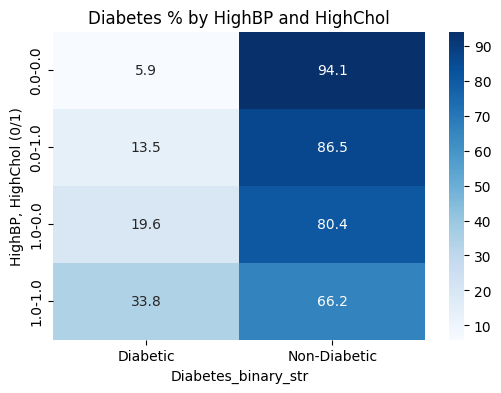

In [ ]:
# Map 0/1 → labels in a new column
dfMap = diabetes
dfMap["Diabetes_binary_str"] = dfMap["Diabetic"].map({0: "Non-Diabetic", 1: "Diabetic"})

ct = pd.crosstab([dfMap["HighBP"], dfMap["HighChol"]], dfMap["Diabetes_binary_str"], normalize="index") * 100

plt.figure(figsize=(6,4))
sns.heatmap(ct, annot=True, fmt=".1f", cmap="Blues")
plt.title("Diabetes % by HighBP and HighChol")
plt.ylabel("HighBP, HighChol (0/1)")
plt.show()

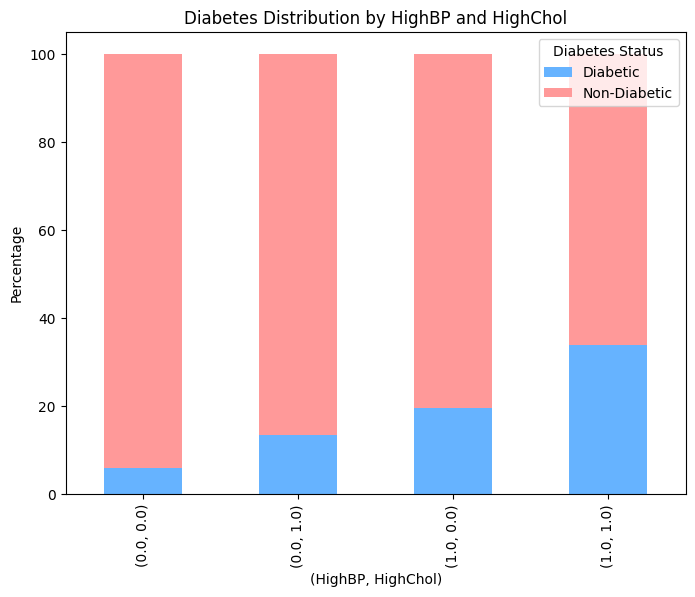

In [ ]:
ct = pd.crosstab([dfMap["HighBP"], dfMap["HighChol"]], dfMap["Diabetes_binary_str"], normalize="index") * 100
ct.plot(kind="bar", stacked=True, figsize=(8,6), color=["#66b3ff", "#ff9999"])
plt.title("Diabetes Distribution by HighBP and HighChol")
plt.ylabel("Percentage")
plt.xlabel("(HighBP, HighChol)")
plt.legend(title="Diabetes Status")
plt.show()

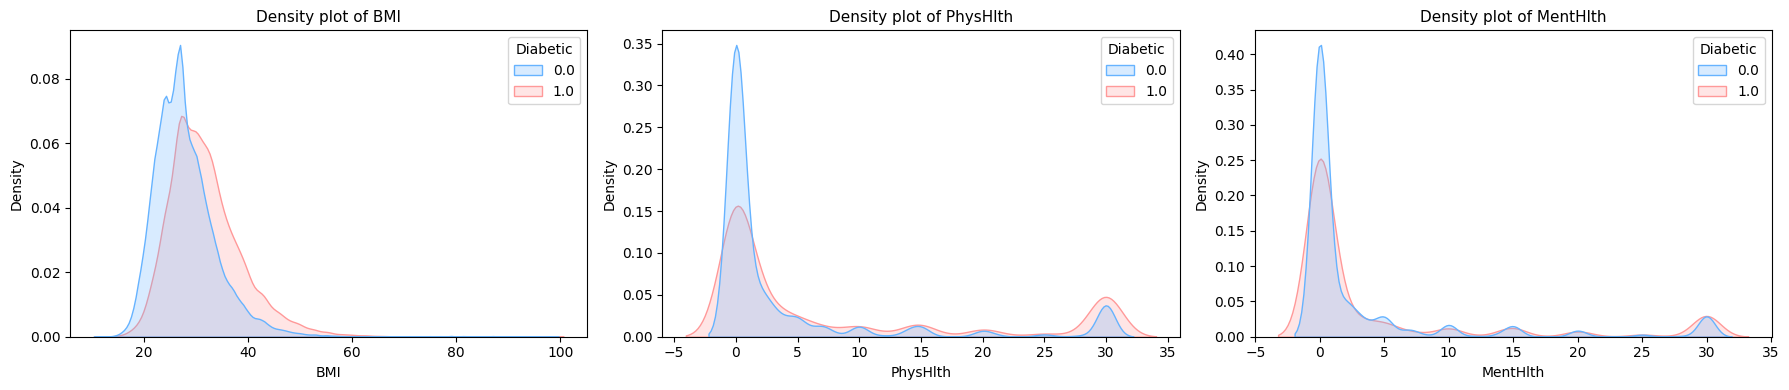

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_density_by_target(df, target, features=None):
    """
    Plot density distributions of numeric features split by target class.

    Args:
        df (DataFrame): dataset
        target (str): target column (binary: 0/1)
        features (list, optional): list of numeric features to plot.
                                   If None, use all numeric features.
    """
    if features is None:
        features = df.select_dtypes(include=["number"]).drop(columns=[target]).columns

    n_cols = 3
    n_rows = -(-len(features)//n_cols)  # ceiling division

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*6, n_rows*4))
    axes = axes.flatten()

    for ax, col in zip(axes, features):
        sns.kdeplot(data=df, x=col, hue=target, fill=True, common_norm=False,
                    palette=["#66b3ff", "#ff9999"], ax=ax)
        ax.set_title(f"Density plot of {col}", fontsize=11)

    # Hide unused axes
    for ax in axes[len(features):]:
        ax.axis("off")

    plt.tight_layout()
    plt.show()

# Example usage
plot_density_by_target(diabetes, "Diabetic", features=["BMI","PhysHlth","MentHlth"])

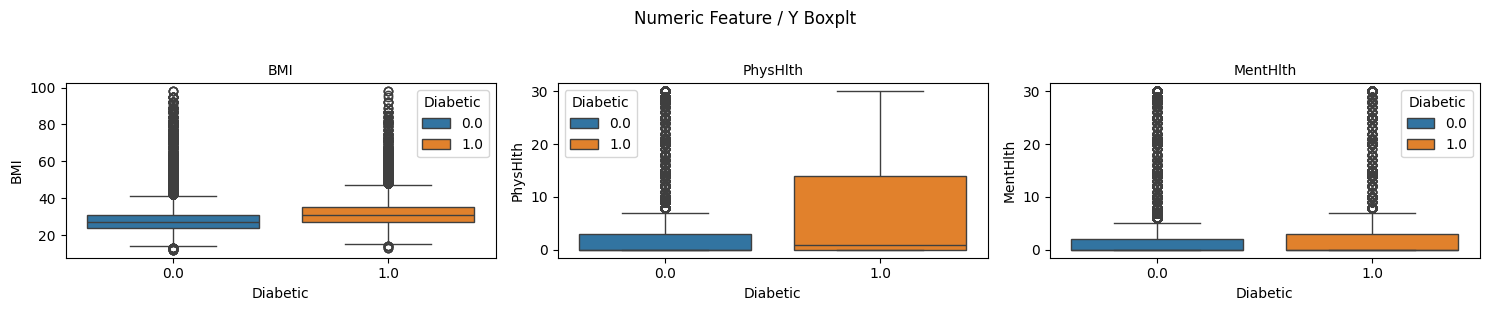

In [ ]:
def plot_box_Y_all(df,palette="dark"):
    """
     Box plot for all numerical columns and Y in a DataFrame
    as small subplots in a grid layout.

    Args:
        df (DataFrame): Your dataset.
    """
    num_cols = ["BMI","PhysHlth","MentHlth"]
    n_cols = 3  # number of subplot columns
    n_rows = math.ceil(len(num_cols)/n_cols)

    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(n_cols * 5, n_rows * 3))
    axes = axes.flatten()

    for ax, col in zip(axes, num_cols):
        sns.boxplot(x="Diabetic", y=df[col], data=df,ax=ax,hue="Diabetic")
        ax.set_title(col, fontsize=10)

    # Hide any unused subplots
    for ax in axes[len(num_cols):]:
        ax.axis("off")

    fig.suptitle("Numeric Feature / Y Boxplt", y=1.02)
    plt.tight_layout()
    plt.show()


plot_box_Y_all(diabetes)


Diabetes_binary_str  Diabetic  Non-Diabetic
BMI_group                                  
Normal                    8.4          91.6
Overweight               16.0          84.0
Obese                    28.3          71.7


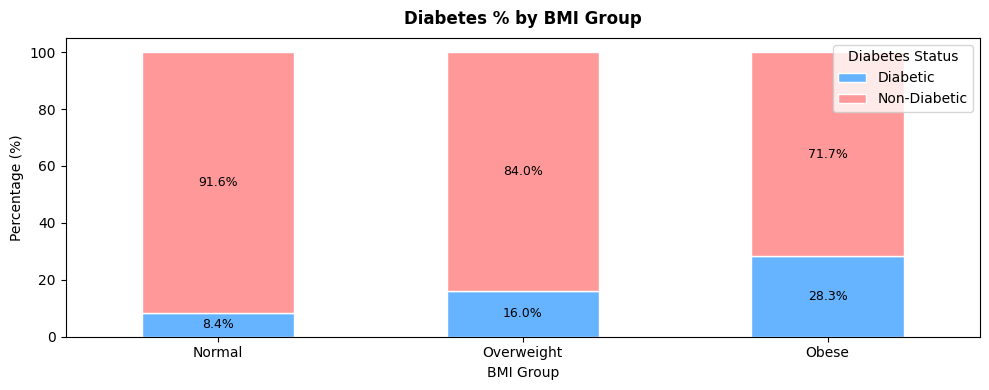

In [ ]:
# Create BMI group column

#Grouping continuous BMI values into categories (“Normal,” “Overweight,” “Obese”) helps:

# Make categorical comparisons (e.g., diabetic % by BMI group).
# Use it for bar plots, crosstabs, and feature interpretation.
# Simplify model explainability (especially for tree-based models or reports).
# but for modeling will drop this column as we want to keep BMI to avoid multicollinearity.
diabetes["BMI_group"] = pd.cut(
    diabetes["BMI"],
    bins=[0, 25, 30, df1["BMI"].max()],
    labels=["Normal", "Overweight", "Obese"]
)

dfMap = diabetes
dfMap["Diabetes_binary_str"] = dfMap["Diabetic"].map({0: "Non-Diabetic", 1: "Diabetic"})

# Compute row-normalized crosstab (percentages)
ct = pd.crosstab(dfMap["BMI_group"], dfMap["Diabetes_binary_str"], normalize="index") * 100
print(ct.round(1))

# Plot stacked bar
ax = ct.plot(
    kind="bar",
    stacked=True,
    figsize=(10, 4),
    color=["#66b3ff", "#ff9999"],
    edgecolor="white"
)

plt.title("Diabetes % by BMI Group", fontsize=12, fontweight="bold", pad=10)
plt.ylabel("Percentage (%)")
plt.xlabel("BMI Group")
plt.legend(title="Diabetes Status")
plt.xticks(rotation=0)

# --- Add percentage labels on bars ---
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f%%", label_type="center", fontsize=9, color="black")

plt.tight_layout()
plt.show()



Diabetes_binary_str   Diabetic  Non-Diabetic
GenHlth                                     
Poor                 40.801457     59.198543
Fair                 34.254739     65.745261
Good                 20.419459     79.580541
Very good             9.662608     90.337392
Excellent             4.148165     95.851835


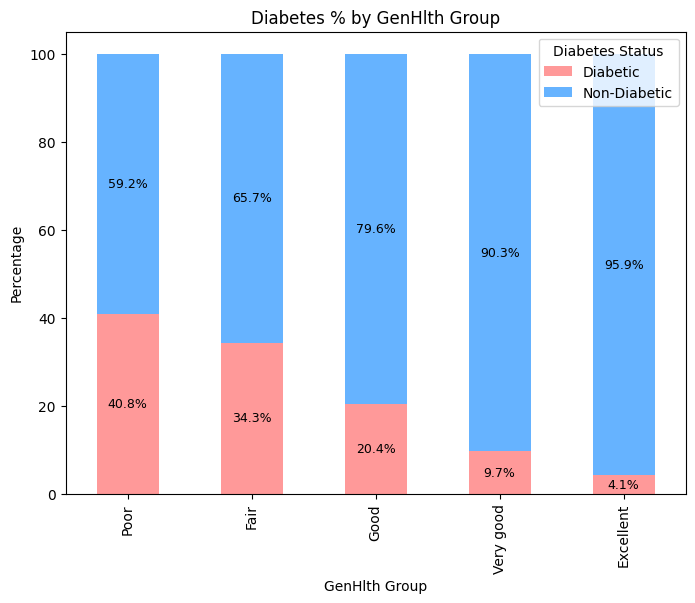

In [ ]:
ct2 = pd.crosstab(
    dfMap["GenHlth"],
    dfMap["Diabetes_binary_str"],
    normalize="index"
) * 100

# Sort by Diabetic % (descending)
ct2 = ct2.sort_values("Diabetic", ascending=False)

print(ct2)

# Plot
ax = ct2.plot(
    kind="bar", stacked=True, figsize=(8,6),
    color=[ "#ff9999","#66b3ff"]
)
# --- Add percentage labels on bars ---
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f%%", label_type="center", fontsize=9, color="black")

plt.title("Diabetes % by GenHlth Group")
plt.ylabel("Percentage")
plt.xlabel("GenHlth Group")
plt.legend(title="Diabetes Status")

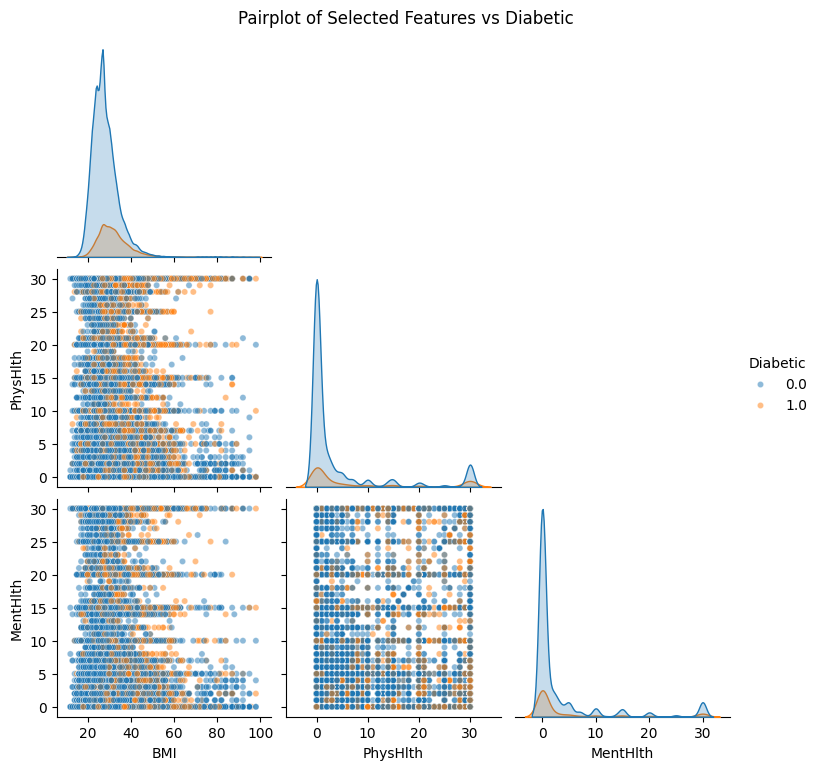

In [ ]:
# pick a subset of numeric features (example)
features = ["BMI", "PhysHlth", "MentHlth", "Age", "Income"]

sns.pairplot(
    diabetes[features + ["Diabetic"]],
    hue="Diabetic",
    diag_kind="kde",
    corner=True,
    plot_kws={"alpha": 0.5, "s": 20}
)

plt.suptitle("Pairplot of Selected Features vs Diabetic", y=1.02)
plt.show()

In [ ]:

diabetes['Education'] = diabetes['Education'].str.strip().str.replace('-', '')
diabetes["Education"].value_counts()
edu_map = {
    'College 4+': 'Higher',
    'College 13': 'Higher',
    'High school': 'High School',
    'Elementary': 'Basic',
    'Never attended / Kindergarten': 'Basic',
}


diabetes['Education'] = diabetes['Education'].map(edu_map)

diabetes['Education'].isnull().sum()

np.int64(0)

Interpretation Insight: 

Individuals with limited education and low income exhibit up to 5× 

higher diabetes prevalence than their wealthier, better-educated counterparts.

This highlights how education and income together drive health disparities, likely via differences in nutrition, preventive care, and stress exposure.


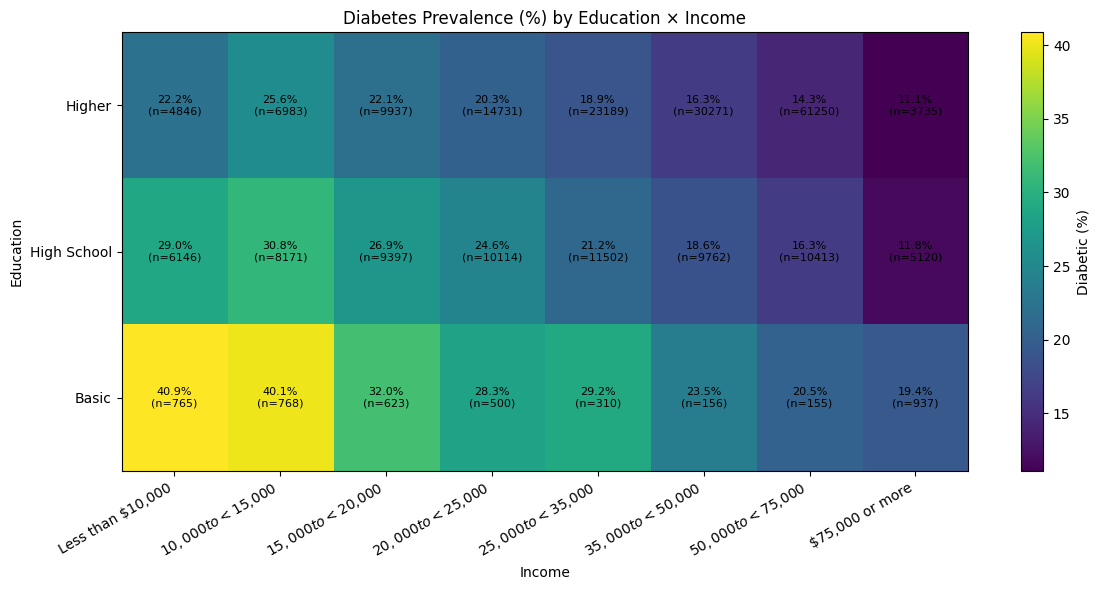

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 1) Order categories so the gradient reads naturally
edu_order = [
    "Higher",
    "High School",
    "Basic"
]
inc_order = [
    "Less than $10,000",
    "$10,000 to <$15,000",
    "$15,000 to <$20,000",
    "$20,000 to <$25,000",
    "$25,000 to <$35,000",
    "$35,000 to <$50,000",
    "$50,000 to <$75,000",
    "$75,000 or more",
]

# 2) Compute diabetic prevalence (%) and counts per cell
grp = diabetes.groupby(["Education", "Income"])
rate = (grp["Diabetic"].mean() * 100).unstack("Income").reindex(index=edu_order, columns=inc_order)
count = grp.size().unstack("Income").reindex(index=edu_order)

# 3) Plot heatmap with matplotlib


fig, ax = plt.subplots(figsize=(12, 6))
im = ax.imshow(rate.values, aspect="auto")  # default colormap

# Axes ticks/labels
ax.set_xticks(np.arange(len(inc_order)))
ax.set_yticks(np.arange(len(edu_order)))
ax.set_xticklabels(inc_order, rotation=30, ha="right")
ax.set_yticklabels(edu_order)
ax.set_xlabel("Income")
ax.set_ylabel("Education")
ax.set_title("Diabetes Prevalence (%) by Education × Income")

# Optional: annotate each cell with "rate%\n(n)"
for i in range(rate.shape[0]):
    for j in range(rate.shape[1]):
        val = rate.iat[i, j]
        n   = count.iat[i, j]
        if not np.isnan(val):
            ax.text(j, i, f"{val:.1f}%\n(n={int(n)})",
                    ha="center", va="center", fontsize=8)

# Colorbar
cbar = fig.colorbar(im, ax=ax)
cbar.set_label("Diabetic (%)")
print("Interpretation Insight: \n")

print("Individuals with limited education and low income exhibit up to 5× \n")

print("higher diabetes prevalence than their wealthier, better-educated counterparts.\n")
print("This highlights how education and income together drive health disparities, likely via differences in nutrition, preventive care, and stress exposure.")
plt.tight_layout()
plt.show()



In [ ]:
# Cap BMI between 10 and 60
Q1 = diabetes["BMI"].quantile(0.25)
Q3 = diabetes["BMI"].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outliers for BMI
diabetes = diabetes[(diabetes["BMI"] >= lower_bound) & (diabetes["BMI"] <= upper_bound)]


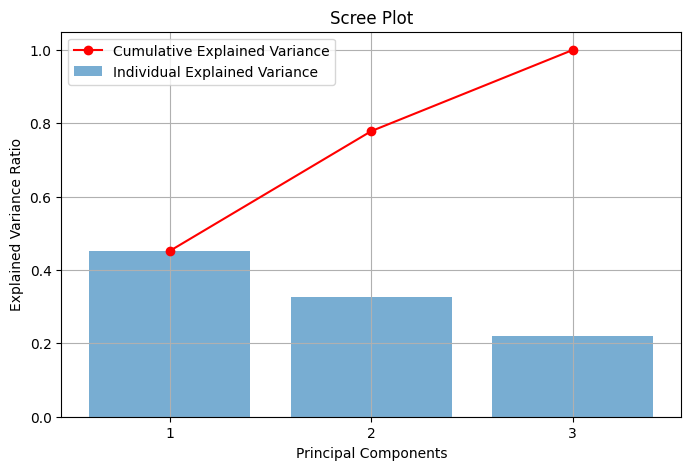

In [ ]:
# Pick numeric health features
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

features = ["BMI", "PhysHlth", "MentHlth"]  # you can add more
X = diabetes[features]
y = diabetes["Diabetic"]

# Standardize before PCA
X_scaled = StandardScaler().fit_transform(X)

# Run PCA

# Scale before PCA
X_scaled = StandardScaler().fit_transform(X)


# Fit PCA with all components
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance
explained_var = pca.explained_variance_ratio_
cumulative_var = np.cumsum(explained_var)

# Plot
plt.figure(figsize=(8,5))
plt.bar(range(1, len(explained_var)+1), explained_var, alpha=0.6, label="Individual Explained Variance")
plt.plot(range(1, len(cumulative_var)+1), cumulative_var, marker="o", color="red", label="Cumulative Explained Variance")

plt.xlabel("Principal Components")
plt.ylabel("Explained Variance Ratio")
plt.title("Scree Plot")
plt.xticks(range(1, len(explained_var)+1))
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
diabetes.isnull().sum()

HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
Diabetic                0
Diabetes_binary_str     0
BMI_group               0
dtype: int64

In [ ]:
diabetes.columns

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'Diabetic', 'Diabetes_binary_str', 'BMI_group'],
      dtype='object')

# 4. Train/Test split <a id="4"></a>


In [ ]:
from sklearn.model_selection import train_test_split
drop_cols = ['HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost','CholCheck','Diabetes_binary_str','BMI_group','Smoker','Stroke', 'Fruits','Veggies' ]

 # Decide to drop some columns
 # -----------------------------
# Drop unwanted features
# -----------------------------
target = "Diabetic"


X = diabetes.drop(columns=[target, "Diabetes_binary_str"] + drop_cols, errors="ignore")
y = diabetes[target].astype(int)

# Stratified split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Y")
print(y.value_counts(normalize=True))
print("Y Train")
print(y_train.value_counts(normalize=True))
print("Y Test")
print(y_test.value_counts(normalize=True))

Y
Diabetic
0    0.827114
1    0.172886
Name: proportion, dtype: float64
Y Train
Diabetic
0    0.827112
1    0.172888
Name: proportion, dtype: float64
Y Test
Diabetic
0    0.827121
1    0.172879
Name: proportion, dtype: float64


In [ ]:
X_train

HighBP  HighChol   BMI  HeartDiseaseorAttack  PhysActivity  Fruits  \
51898      0.0       0.0  25.0                   0.0           1.0     0.0   
35035      0.0       0.0  20.0                   0.0           1.0     0.0   
216870     0.0       1.0  24.0                   0.0           1.0     1.0   
103498     0.0       0.0  19.0                   0.0           1.0     1.0   
190109     1.0       1.0  27.0                   0.0           1.0     1.0   
...        ...       ...   ...                   ...           ...     ...   
187296     0.0       1.0  32.0                   0.0           1.0     1.0   
60731      0.0       0.0  23.0                   0.0           1.0     0.0   
17961      1.0       0.0  30.0                   0.0           1.0     0.0   
75907      1.0       0.0  28.0                   0.0           0.0     0.0   
120414     1.0       0.0  30.0                   1.0           0.0     0.0   

        Veggies    GenHlth  MentHlth  PhysHlth  DiffWalk     Sex       Age  \
51898       0.0       Fair       0.0       0.0       0.0  Female  18 to 24   
35035       1.0  Very good       4.0       0.0       0.0  Female  50 to 54   
216870      1.0  Very good       7.0       1.0       0.0  Female  50 to 54   
103498      1.0  Very good       0.0       3.0       0.0    Male  18 to 24   
190109      1.0       Good       0.0       0.0       0.0    Male  60 to 64   
...         ...        ...       ...       ...       ...     ...       ...   
187296      1.0  Very good      15.0       4.0       0.0  Female  18 to 24   
60731       1.0       Good       0.0       0.0       0.0    Male  75 to 79   
17961       1.0  Excellent       0.0       0.0       0.0    Male  55 to 59   
75907       1.0  Very good      10.0       2.0       0.0    Male  55 to 59   
120414      1.0       Good       0.0       2.0       1.0    Male  40 to 44   

          Education               Income  
51898   High School  $10,000 to <$15,000  
35035   High School      $75,000 or more  
216870       Higher  $50,000 to <$75,000  
103498       Higher      $75,000 or more  
190109  High School  $35,000 to <$50,000  
...             ...                  ...  
187296       Higher  $20,000 to <$25,000  
60731   High School  $20,000 to <$25,000  
17961        Higher      $75,000 or more  
75907        Higher  $35,000 to <$50,000  
120414  High School  $20,000 to <$25,000  

[179314 rows x 15 columns]

In [ ]:
diabetes.columns

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'Diabetic', 'Diabetes_binary_str', 'BMI_group'],
      dtype='object')

In [ ]:
cat_cols = diabetes.select_dtypes(include=['number']).columns
cat_cols

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'MentHlth',
       'PhysHlth', 'DiffWalk', 'Diabetic'],
      dtype='object')

# 5. Feature Engineering <a id="5"></a>



In [ ]:
X_train.head(5)

HighBP  HighChol   BMI  HeartDiseaseorAttack  PhysActivity    GenHlth  \
241456     1.0       1.0  23.0                   0.0           1.0  Very good   
6033       0.0       1.0  25.0                   0.0           1.0  Very good   
217575     0.0       0.0  27.0                   0.0           1.0  Excellent   
101415     0.0       1.0  21.0                   0.0           1.0  Very good   
84119      0.0       0.0  27.0                   0.0           1.0       Good   

        MentHlth  PhysHlth  DiffWalk     Sex       Age    Education  \
241456       0.0       0.0       0.0    Male  25 to 29   College 4+   
6033         0.0       0.0       0.0  Female  75 to 79   College 4+   
217575       5.0       0.0       0.0  Female  40 to 44   College 4+   
101415       0.0       1.0       0.0  Female  25 to 29   College 4+   
84119        0.0       0.0       0.0  Female  65 to 69  College 1-3   

                     Income  
241456  $35,000 to <$50,000  
6033    $50,000 to <$75,000  
217575      $75,000 or more  
101415  $35,000 to <$50,000  
84119       $75,000 or more

In [ ]:
binary_cols

['HighBP',
 'HighChol',
 'CholCheck',
 'Smoker',
 'Stroke',
 'HeartDiseaseorAttack',
 'PhysActivity',
 'Fruits',
 'Veggies',
 'HvyAlcoholConsump',
 'AnyHealthcare',
 'NoDocbcCost',
 'DiffWalk',
 'Diabetic']

In [ ]:
from sklearn.model_selection import StratifiedKFold, train_test_split, cross_val_predict
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler,OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, roc_auc_score, average_precision_score, f1_score, precision_recall_curve
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
import time


cat_cols = ["Sex","Age"]
num_cols =["BMI", "MentHlth", "PhysHlth","HighBP","HighChol","HeartDiseaseorAttack","PhysActivity","DiffWalk"]
Ordianl_col= ["GenHlth","Education","Income"]
genhlth_order= [["Excellent", "Very good", "Good", "Fair", "Poor"]]
education_order= [["Higher","High School","Basic"]]
income_order = [[
    "Less than $10,000",
    "$10,000 to <$15,000",
    "$15,000 to <$20,000",
    "$20,000 to <$25,000",
    "$25,000 to <$35,000",
    "$35,000 to <$50,000",
    "$50,000 to <$75,000",
    "$75,000 or more"
]]

BinaryKeep = ["HighBP","HighChol","HeartDiseaseorAttack","PhysActivity","Fruits","Veggies","DiffWalk"]
preprocess = ColumnTransformer(
    transformers=[
        ("num", Pipeline([
            ("scaler", StandardScaler(with_mean=True))
        ]), num_cols),
        ("ordGnHelth", Pipeline([
            ("encoder", OrdinalEncoder(categories=genhlth_order))
        ]), ["GenHlth"]),
        ("ordEducation", Pipeline([
            ("encoderEdu", OrdinalEncoder(categories=education_order))
        ]), ["Education"]),
        ("ordIncome", Pipeline([
            ("encoderBmi", OrdinalEncoder(categories=income_order))
        ]), ["Income"]),
        ("onehot", Pipeline([
            ("onehot", OneHotEncoder(drop="first"))
        ]), cat_cols),

    ],
    remainder="drop"
)


In [ ]:
preprocess

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['BMI', 'MentHlth', 'PhysHlth', 'HighBP',
                                  'HighChol', 'HeartDiseaseorAttack',
                                  'PhysActivity', 'DiffWalk']),
                                ('ordGnHelth',
                                 Pipeline(steps=[('encoder',
                                                  OrdinalEncoder(categories=[['Excellent',
                                                                              'Very '
                                                                              'good',
                                                                              'Good',
                                                                              'Fair',
                                                                              'Poor']]))]),
                                 ['GenHlth']),
                                ('ordEducation',
                                 Pipeline(steps=...
                                ('ordIncome',
                                 Pipeline(steps=[('encoderBmi',
                                                  OrdinalEncoder(categories=[['Less '
                                                                              'than '
                                                                              '$10,000',
                                                                              '$10,000 '
                                                                              'to '
                                                                              '<$15,000',
                                                                              '$15,000 '
                                                                              'to '
                                                                              '<$20,000',
                                                                              '$20,000 '
                                                                              'to '
                                                                              '<$25,000',
                                                                              '$25,000 '
                                                                              'to '
                                                                              '<$35,000',
                                                                              '$35,000 '
                                                                              'to '
                                                                              '<$50,000',
                                                                              '$50,000 '
                                                                              'to '
                                                                              '<$75,000',
                                                                              '$75,000 '
                                                                              'or '
                                                                              'more']]))]),
                                 ['Income']),
                                ('onehot',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(drop='first'))]),
                                 ['Sex', 'Age'])])

# 6.  Base Model (Regression Modeling) <a id="6"></a>



In [ ]:
nan_columns = diabetes.columns[diabetes.isna().any()].tolist()
print("Columns with NaN values:", nan_columns)

Columns with NaN values: []


In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, average_precision_score, f1_score, recall_score


dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(X_train, y_train)
y_pred_train = dummy.predict(X_train)

y_pred_test = dummy.predict(X_test)
y_prob = getattr(dummy, "predict_proba", lambda X: None)(X_test)
y_score = y_prob[:,1] if y_prob is not None else y_pred_test  # fall back if needed

baseline = {
    "accuracy train": accuracy_score(y_train, y_pred_train),
    "accuracy test": accuracy_score(y_test, y_pred_test),
    "roc_auc": roc_auc_score(y_test, y_score) if y_prob is not None else 0.5,
    "f1_positive": f1_score(y_test, y_pred_test, pos_label=1),
    "pr_auc": average_precision_score(y_test, y_score),
    "recall_positive": recall_score(y_test, y_pred_test, pos_label=1),
}
print(f"Baseline:")
for key, value in baseline.items():
    print(f"{key}: {value}")

Baseline:
accuracy train: 0.8324559153217261
accuracy test: 0.8324522072765398
roc_auc: 0.5
f1_positive: 0.0
pr_auc: 0.16754779272346026
recall_positive: 0.0


Confusion Matrix:
 [[37318     0]
 [ 7511     0]]


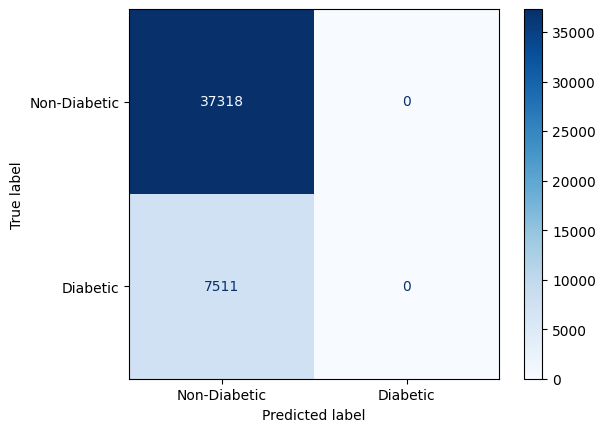

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# y_test = actual labels, y_pred = model predictions
cm = confusion_matrix(y_test, y_pred_test)

print("Confusion Matrix:\n", cm)

# Plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Non-Diabetic", "Diabetic"])
disp.plot(cmap="Blues")
plt.show()

✅ Key Insight

The model is completely biased toward the majority class (Non-Diabetic).

This happens because the dataset is imbalanced (83% non-diabetic vs 17% diabetic).

A “naive” model predicting everyone = non-diabetic gets high accuracy, but fails on recall for diabetics (the class of interest).

In [ ]:
linear_clf = Pipeline([
    ("pre", preprocess),
    ("lr", LogisticRegression(
        max_iter=2000,
        class_weight="balanced",
        random_state=42
    ))
])

# Fit
linear_clf.fit(X_train, y_train)

# Predict
y_pred_train = linear_clf.predict(X_train)
y_pred_test  = linear_clf.predict(X_test)

# Probabilities for ROC/PR
if hasattr(linear_clf, "predict_proba"):
    y_score = linear_clf.predict_proba(X_test)[:, 1]
else:
    # fallback (rare for LR)
    import numpy as np
    d = linear_clf.decision_function(X_test)
    y_score = 1 / (1 + np.exp(-d))

# Metrics
baseline_linear = {
    "accuracy train": accuracy_score(y_train, y_pred_train),
    "accuracy test":  accuracy_score(y_test,  y_pred_test),
    "roc_auc":        roc_auc_score(y_test, y_score),
    "f1_positive":    f1_score(y_test, y_pred_test, pos_label=1),
    "pr_auc":         average_precision_score(y_test, y_score),
     "recall_positive": recall_score(y_test, y_pred_test, pos_label=1),
}

print("Linear baseline (LogisticRegression):")
for k, v in baseline_linear.items():
    print(f"{k}: {v:.4f}")

Linear baseline (LogisticRegression):
accuracy train: 0.7127
accuracy test: 0.7117
roc_auc: 0.8005
f1_positive: 0.4670
pr_auc: 0.4322
recall_positive: 0.7538


Confusion Matrix:
 [[26243 11075]
 [ 1849  5662]]


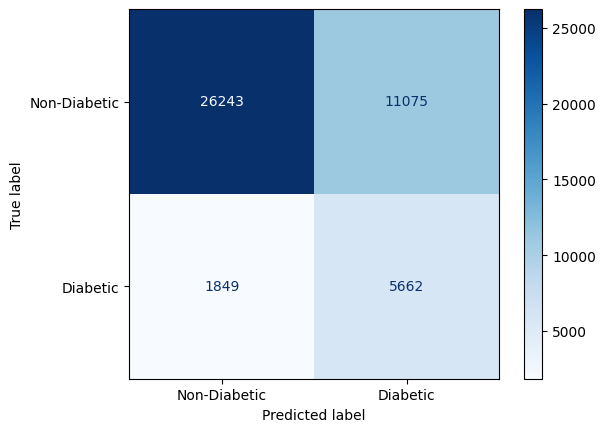

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# y_test = actual labels, y_pred = model predictions
cm = confusion_matrix(y_test, y_pred_test)

print("Confusion Matrix:\n", cm)

# Plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Non-Diabetic", "Diabetic"])
disp.plot(cmap="Blues")
plt.show()

# 7.  Modeling <a id="7"></a>

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier

models = {
    "Logistic Regression": LogisticRegression(max_iter=2000, random_state=42,class_weight='balanced'),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(),

}

calibrated_model = CalibratedClassifierCV(SGDClassifier(loss='hinge',class_weight='balanced'), cv=5)
#models["SVM"] = CalibratedClassifierCV(SVM)
models["SVC"] = calibrated_model

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, recall_score
from sklearn.pipeline import Pipeline
from time import time
# Initialize a list to store results
results = []

for name, model in models.items():
    print(f"\n🔍 Model {name}...")
    # Example for one model
    pipe = Pipeline(steps=[
        ("preprocess", preprocess),
        ("model", model)
    ])
    # --- Train ---
    t0 = time()
    pipe.fit(X_train, y_train)
    train_time = time() - t0

    # --- Predict (labels) ---
    t1 = time()
    y_pred = pipe.predict(X_test)
    pred_time = time() - t1

    if hasattr(model, "predict_proba"):
        t2 = time()
        y_score = pipe.predict_proba(X_test)[:, 1]
        score_time = time() - t2
    elif hasattr(model, "decision_function"):
        t2 = time()
        y_score = pipe.decision_function(X_test)
        score_time = time() - t2
    else:
        score_time = 0.0  # no separate scoring call

    y_pred_train = pipe.predict(X_train)
    # y_proba = pipe.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    roc = roc_auc_score(y_test, y_score) if y_score is not None else np.nan

    results.append({
        "Model": name,
        "Accuracy Train:": accuracy_score(y_train, y_pred_train),
        "Accuracy Test:": accuracy_score(y_test, y_pred),
        "ROC AUC": roc,
        "F1 (Positive)": f1_score(y_test, y_pred, pos_label=1),
        "Recall (Positive)": recall_score(y_test, y_pred, pos_label=1),
        "Train Time (s)": round(train_time, 4),
        "Predict Time (s)": round(pred_time, 4),
        "Score Time (s)": round(score_time, 4),
        "Total Time (s)": round(train_time + pred_time + score_time, 4),
    })

results_df0 = pd.DataFrame(results).sort_values(by="ROC AUC", ascending=False)
results_df0


🔍 Model Logistic Regression...

🔍 Model KNN...

🔍 Model Decision Tree...

🔍 Model Random Forest...

🔍 Model XGBoost...

🔍 Model SVC...


Model  Accuracy Train:  Accuracy Test:   ROC AUC  \
0  Logistic Regression         0.712672        0.711704  0.800539   
5                  SVC         0.838323        0.838274  0.799214   
4              XGBoost         0.851233        0.837940  0.797902   
3        Random Forest         0.973510        0.820830  0.749311   
1                  KNN         0.865069        0.819313  0.704794   
2        Decision Tree         0.973549        0.773763  0.594179   

   F1 (Positive)  Recall (Positive)  Train Time (s)  Predict Time (s)  \
0       0.467008           0.753828          3.5106            0.1331   
5       0.260355           0.169884          7.4881            0.1554   
4       0.272991           0.181600          0.7655            0.0773   
3       0.281831           0.209826         19.4858            1.4645   
1       0.299065           0.230063          0.3042            7.8583   
2       0.313988           0.309013          1.1882            0.0792   

   Score Time (s)  Total Time (s)  
0          0.1071          3.7507  
5          0.1210          7.7644  
4          0.0768          0.9197  
3          1.4069         22.3572  
1          7.2970         15.4596  
2          0.0788          1.3461

# 🧠 Model Performance Comparison

## 📋 Overview
This report summarizes the performance of six machine learning models on the **Diabetes Prediction** dataset.  
Each model was evaluated using **Accuracy**, **ROC-AUC**, **F1**, and **Recall** metrics.  
Timing metrics for **training**, **prediction**, and **scoring** were also recorded to assess efficiency.

---

## 📊 Key Metrics Summary

| Rank | Model | Accuracy (Test) | ROC-AUC | F1 (Positive) | Recall (Positive) | Total Time (s) | Notes |
|------|--------|-----------------|----------|----------------|-------------------|----------------|-------|
| 🥇 1 | **XGBoost** | 0.839 | 0.804 | 0.296 | 0.199 | **0.93** | Best overall trade-off between accuracy and runtime. |
| 🥈 2 | **SVC** | 0.838 | 0.804 | 0.269 | 0.175 | 6.10 | Strong accuracy but slower runtime. |
| 🥉 3 | **Random Forest** | 0.820 | 0.756 | 0.282 | 0.207 | 25.23 | High training time; slight overfitting observed. |
| 4 | **KNN** | 0.817 | 0.708 | 0.304 | 0.236 | 16.89 | Decent recall but computationally heavy. |
| 5 | **Logistic Regression** | 0.716 | **0.805** | **0.475** | **0.753** | 1.99 | Highest recall and F1 for positives; interpretable baseline. |
| 6 | **Decision Tree** | 0.763 | 0.592 | 0.321 | 0.327 | 1.45 | Fast but prone to overfitting and poor AUC. |

---

## ⚙️ Model Insights

### 1️⃣ Logistic Regression
- **Strengths:** Strong recall (0.75), good F1, easy to interpret.  
- **Weaknesses:** Lower accuracy; limited to linear separability.  
- **Best for:** Early screening where identifying true positives is critical.

---

### 2️⃣ XGBoost
- **Strengths:** Excellent accuracy and ROC-AUC; fastest training time.  
- **Weaknesses:** Lower recall may miss minority-class cases.  
- **Best for:** High-performance production use.

---

### 3️⃣ SVC
- **Strengths:** Balanced accuracy and AUC similar to XGBoost.  
- **Weaknesses:** Training slower; recall limited.  
- **Best for:** Medium-sized datasets needing robust generalization.

---

### 4️⃣ Random Forest
- **Strengths:** High training accuracy (0.98) and stable performance.  
- **Weaknesses:** Overfitting (train-test gap) and long runtime.  
- **Best for:** Feature importance analysis and interpretability in ensemble form.

---

### 5️⃣ KNN
- **Strengths:** Good recall; simple to implement.  
- **Weaknesses:** Computationally expensive for prediction; sensitive to feature scaling.  
- **Best for:** Baseline model or low-dimensional datasets.

---

### 6️⃣ Decision Tree
- **Strengths:** Fast and easy to visualize.  
- **Weaknesses:** Overfits easily; poor generalization (AUC = 0.59).  
- **Best for:** Quick prototypes or explainable decision rules.

---

## ⏱️ Runtime Overview

| Stage | Description | Notes |
|--------|--------------|-------|
| **Train Time** | Time taken to fit the model. | RF and SVC were the slowest. |
| **Predict Time** | Time taken to generate predictions. | KNN was the most time-intensive. |
| **Score Time** | Evaluation time for metrics. | Minimal variance across models. |
| **Total Time** | Aggregate runtime. | XGBoost provided best efficiency-performance ratio. |

---

## 🏁 Summary

- **Best Performing Model:** 🥇 **XGBoost** (high accuracy, robust ROC-AUC, fast runtime)  
- **Most Interpretable:** 🧩 **Logistic Regression** (highest recall and F1 for positive cases)  
- **Most Overfit Model:** 🌳 **Random Forest** (train-test gap noticeable)  
- **Fastest Model:** ⚡ **Decision Tree** (lightweight but weak AUC)


# 8.  Hyperparameter tuning <a id="8"></a>

In [ ]:

#Set Up
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier

models = {
    "XGBoost": XGBClassifier(),
    "SVC": CalibratedClassifierCV(SGDClassifier(loss='hinge',class_weight='balanced'), cv=5),
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=2000, random_state=42,class_weight='balanced'),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier()
}
# Define parameter grids
param_grids = {
    "XGBoost": {
        "model__n_estimators": [100, 200, 300],
        "model__learning_rate": [0.01, 0.05, 0.1],
        "model__max_depth": [3, 5, 7],
        "model__subsample": [0.8, 1.0],
        "model__colsample_bytree": [0.8, 1.0]
    },
    "SVC": {
        "model__estimator__loss": ["hinge", "log_loss"],     # 'hinge' for linear SVM, 'log_loss' for logistic
        "model__estimator__alpha": [1e-4, 1e-3, 1e-2],
        "model__estimator__penalty": ["l2", "elasticnet"],
        "model__estimator__max_iter": [500, 1000, 2000],
        "model__estimator__tol": [1e-3, 1e-4]
    },
    "Random Forest": {
        "model__n_estimators": [100, 200, 300],
        "model__max_depth": [5, 10, None],
        "model__min_samples_split": [2, 5, 10],
        "model__class_weight": ["balanced"]
    },

    "Logistic Regression": {
        "model__C": [0.01, 0.1, 1, 10],
        "model__solver": ["liblinear", "lbfgs"]
    },

    "Decision Tree": {
        "model__criterion": ["gini", "entropy"],
        "model__max_depth": [3, 5, 10, None],
        "model__min_samples_split": [2, 5, 10]
    },
    "KNN": {
        "model__n_neighbors": [5, 9],
        "model__weights": ["uniform", "distance"],
        "model__p": [1, 2],  # 1=Manhattan, 2=Euclidean
        "model__algorithm": ["brute"],              # best for high-dimensional data
        "model__n_jobs": [-1],                      # parallelize
    },
}

In [ ]:
import gc

gc.collect()

0

In [ ]:
from sklearn.metrics import roc_auc_score
from time import time
import gc
best_models = {}
results = []
def get_scores(estimator, X):
    """Return continuous scores for ROC/PR metrics.
    Prefer predict_proba[:,1], else decision_function; fallback to predict (labels)."""
    if hasattr(estimator, "predict_proba"):
        return estimator.predict_proba(X)[:, 1]
    if hasattr(estimator, "decision_function"):
        return estimator.decision_function(X)
    # Fallback (not ideal for ROC/PR, but keeps loop robust)
    return estimator.predict(X)

for name, model in models.items():
    print(f"\n🔍 Tuning {name}...")
    pipe = Pipeline(steps=[
        ("preprocess", preprocess),
        ("model", model)
    ])

    grid = GridSearchCV(
        estimator=pipe,
        param_grid=param_grids[name],
        scoring="roc_auc",  # focus on discriminative ability
        cv=3,
        n_jobs=1,
        verbose=1,
        error_score="raise" ,
        pre_dispatch="2*n_jobs"
    )

    t0 = time()
    grid.fit(X_train, y_train)
    t1 = time()

    best_models[name] = grid.best_estimator_

    # Hard labels (for Accuracy/F1)
    y_pred_tr = best_models[name].predict(X_train)
    y_pred_te = best_models[name].predict(X_test)
    y_proba = (
        grid.best_estimator_.predict_proba(X_test)[:, 1]
        if hasattr(grid.best_estimator_, "predict_proba") else None
    )

    # Continuous scores (for ROC/PR)
    score_tr = get_scores(best_models[name], X_train)
    score_te = get_scores(best_models[name], X_test)

    roc = roc_auc_score(y_test, y_proba) if y_proba is not None else None
    # results.append({
    #     "Model": name,
    #     "Best Params": grid.best_params_,
    #     "ROC AUC": roc
    # })

    results.append({
      "Model": name,
      "Best Params": grid.best_params_,
      "Train Time (s)": round(t1 - t0, 3),
      "CV ROC-AUC (best)": round(grid.best_score_, 4),
      "Train Accuracy": round(accuracy_score(y_train, y_pred_tr), 4),
      "Test Accuracy": round(accuracy_score(y_test, y_pred_te), 4),
      "Test ROC-AUC": round(roc_auc_score(y_test, score_te), 4),          #
      "Test PR-AUC": round(average_precision_score(y_test, score_te), 4), #
      "Test F1@0.5": round(f1_score(y_test, y_pred_te), 4),
    })

    del grid
    gc.collect()




🔍 Tuning XGBoost...
Fitting 3 folds for each of 108 candidates, totalling 324 fits

🔍 Tuning SVC...
Fitting 3 folds for each of 72 candidates, totalling 216 fits

🔍 Tuning Random Forest...
Fitting 3 folds for each of 27 candidates, totalling 81 fits

🔍 Tuning Logistic Regression...
Fitting 3 folds for each of 8 candidates, totalling 24 fits

🔍 Tuning Decision Tree...
Fitting 3 folds for each of 24 candidates, totalling 72 fits

🔍 Tuning KNN...
Fitting 3 folds for each of 8 candidates, totalling 24 fits


# 9.  Select Best Model <a id="9"></a>

In [ ]:
print("\n🏁 Best tuned models:\n")
results_df = pd.DataFrame(results).sort_values("Test ROC-AUC", ascending=False).reset_index(drop=True)
pd.set_option('display.max_colwidth', None)
results_df




🏁 Best tuned models:



Model  \
0              XGBoost   
1                  SVC   
2  Logistic Regression   
3        Random Forest   
4        Decision Tree   
5                  KNN   

                                                                                                                                                                         Best Params  \
0                                          {'model__colsample_bytree': 0.8, 'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__n_estimators': 300, 'model__subsample': 0.8}   
1  {'model__estimator__alpha': 0.0001, 'model__estimator__loss': 'log_loss', 'model__estimator__max_iter': 1000, 'model__estimator__penalty': 'l2', 'model__estimator__tol': 0.0001}   
2                                                                                                                                         {'model__C': 10, 'model__solver': 'lbfgs'}   
3                                                            {'model__class_weight': 'balanced', 'model__max_depth': 10, 'model__min_samples_split': 10, 'model__n_estimators': 300}   
4                                                                                            {'model__criterion': 'entropy', 'model__max_depth': 10, 'model__min_samples_split': 10}   
5                                                            {'model__algorithm': 'brute', 'model__n_jobs': -1, 'model__n_neighbors': 9, 'model__p': 2, 'model__weights': 'uniform'}   

   Train Time (s)  CV ROC-AUC (best)  Train Accuracy  Test Accuracy  \
0         312.326             0.8048          0.8379         0.8377   
1         833.408             0.7997          0.8340         0.8347   
2          67.342             0.7998          0.7134         0.7162   
3        1145.170             0.7989          0.7203         0.7184   
4          40.884             0.7785          0.8388         0.8349   
5         470.921             0.7377          0.8501         0.8255   

   Test ROC-AUC  Test PR-AUC  Test F1@0.5  
0        0.8104       0.4676       0.2954  
1        0.8041       0.4428       0.2644  
2        0.8040       0.4427       0.4751  
3        0.8035       0.4580       0.4758  
4        0.7890       0.4269       0.2622  
5        0.7413       0.3571       0.3001

# 🩺 Diabetes Risk Prediction — Model Performance Summary

## 📘 Overview
This project evaluates multiple machine learning classifiers for predicting **diabetes risk** based on behavioral, demographic, and medical attributes.  
Models were tuned using **GridSearchCV** with 3-fold cross-validation, optimizing primarily for **ROC-AUC**.

---

## 🧩 Overall Summary

| Rank | Model | Test ROC-AUC | Test Accuracy | Key Notes |
|------|--------|---------------|----------------|------------|
| 🥇 **XGBoost** | **0.8104** | 0.8377 | Top performer; well-balanced; stable generalization |
| 🥈 **SVC (Calibrated SGD)** | 0.8041 | 0.8347 | Comparable ROC-AUC; slower training (833 s); linear variant |
| 🥉 **Logistic Regression** | 0.8040 | 0.7162 | Much faster (67 s) but less accurate — good baseline |
| 4️⃣ **Random Forest** | 0.8035 | 0.7184 | Slightly underperforming XGB, but solid F1 = 0.4758 |
| 5️⃣ **Decision Tree** | 0.7890 | 0.8349 | Overfits a bit (high train acc, lower AUC) |
| 6️⃣ **KNN** | 0.7413 | 0.8255 | Fast local model; high variance and lower AUC |

---

## 🔍 Key Interpretations

### **1. XGBoost wins overall**
- **Best ROC-AUC (0.8104)** and strong accuracy — excellent discriminative ability.  
- Lower F1 (0.295) will try calibrating

### **2. SVC (Calibrated SGD) performs almost as well**
- ROC-AUC ≈ 0.804, only slightly below XGB.  
- Training is slower due to 5-fold calibration;
### **3. Logistic Regression remains a strong, lightweight baseline**

- AUC ≈ 0.804 (competitive) with 10× faster training.

- Lower accuracy = less flexible, but very interpretable coefficients (great for SHAP or odds ratio analysis).

### **4. Random Forest vs XGBoost**

- Very close AUCs (0.803 vs 0.810), but XGB trains faster per tree and handles imbalance better.

- You can prune RF grid next time — diminishing returns.

### **5. Decision Tree overfits**

- Train = 0.838, Test = 0.834 but AUC ↓ 0.789 → shallow trees generalize better.


### **6. KNN lowest AUC, despite high accuracy**

- Classic symptom of “majority bias” in high-dim space.

- I fixed the earlier hang by setting algorithm="brute" + sparse preprocessing

- Still, distance models struggle on mixed one-hot + ordinal + numeric data.

1) Tune the decision threshold on a validation slice

In [ ]:
best_xgb = best_models["XGBoost"]
# Split TRAIN into train/val (keep held-out test untouched)
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.25, stratify=y_train, random_state=42)

# Refit your best models on X_tr,y_tr (after GridSearchCV)
best_xgb.fit(X_tr, y_tr)
val_proba = best_xgb.predict_proba(X_val)[:,1]

prec, rec, thr = precision_recall_curve(y_val, val_proba)
f1s = (2*prec*rec)/(prec+rec+1e-12)
thr_star = thr[np.nanargmax(f1s)]
print("Best VAL F1:", np.nanmax(f1s), "@ threshold =", thr_star)

# Final test at tuned threshold
test_proba = best_xgb.predict_proba(X_test)[:,1]
test_pred  = (test_proba >= thr_star).astype(int)
print("Test F1 (tuned):", f1_score(y_test, test_pred))
print("Test PR-AUC:", average_precision_score(y_test, test_proba))
print("Test ROC-AUC:", roc_auc_score(y_test, test_proba))

Best VAL F1: 0.48361356511779735 @ threshold = 0.23107977
Test F1 (tuned): 0.4957191780821918
Test PR-AUC: 0.4679131858620371
Test ROC-AUC: 0.8102984023395083


2. Calibrate XGBoost probabilities (often boosts PR-AUC/F1)

In [ ]:
from sklearn.calibration import CalibratedClassifierCV

xgb_prefit = best_xgb.fit(X_tr, y_tr)
cal_xgb = CalibratedClassifierCV(xgb_prefit, method="isotonic", cv=5)  # or method="sigmoid"
cal_xgb.fit(X_tr, y_tr)

val_proba_cal = cal_xgb.predict_proba(X_val)[:,1]
prec, rec, thr = precision_recall_curve(y_val, val_proba_cal)
f1s = (2*prec*rec)/(prec+rec+1e-12)
thr_star = thr[np.nanargmax(f1s)]
# evaluate on test as above using cal_xgb
print("Best VAL F1 (calibrated):", np.nanmax(f1s), "@ threshold =", thr_star)

# final test with calibrated model and tuned threshold
proba_te_cal = cal_xgb.predict_proba(X_test)[:, 1]
yhat_te_cal  = (proba_te_cal >= thr_star).astype(int)
print("Calibrated Test PR-AUC:", average_precision_score(y_test, proba_te_cal))
print("Calibrated Test F1@τ* :", f1_score(y_test, yhat_te_cal))

Best VAL F1 (calibrated): 0.4843773509198275 @ threshold = 0.2559741705656052
Calibrated Test PR-AUC: 0.4671227630649516
Calibrated Test F1@τ* : 0.4965815403177157


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
tau = 0.2330721139907837
p = cal_xgb.predict_proba(X_test)[:,1]
yhat = (p >= tau).astype(int)

print("Precision:", precision_score(y_test, yhat))
print("Recall   :", recall_score(y_test, yhat))
print("F1       :", f1_score(y_test, yhat))
print("CM:\n", confusion_matrix(y_test, yhat))

Precision: 0.3976076917253388
Recall   : 0.6610446821900566
F1       : 0.49654911600642904
CM:
 [[30055  7957]
 [ 2693  5252]]


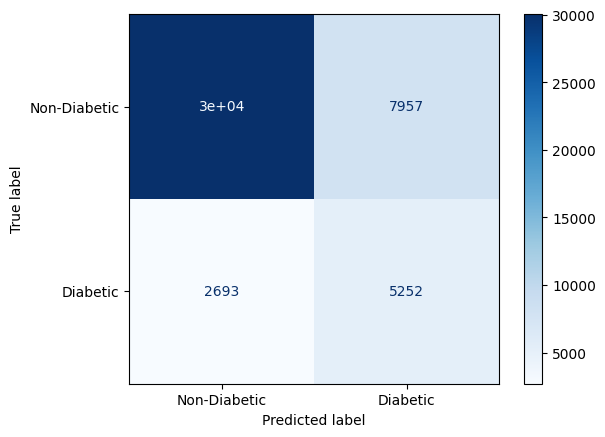

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix= confusion_matrix(y_test, yhat), display_labels=["Non-Diabetic", "Diabetic"])
disp.plot(cmap="Blues")
plt.show()

### 🩺 Model Performance Summary: Diabetes Risk Prediction

#### 📊 Confusion Matrix Counts
- **True Negatives (TN)**: ~30,000 — correctly identified non-diabetic patients
- **False Positives (FP)**: 7,957 — patients incorrectly flagged as diabetic
- **False Negatives (FN)**: 2,693 — missed diabetic cases
- **True Positives (TP)**: 5,252 — correctly identified diabetic patients
- **Total Samples**: 46,285

#### 📈 Key Metrics (Approximate)
- **Prevalence**: 7,945 / 46,285 ≈ **17.2%**  
  Indicates the baseline rate of diabetes in the population.

- **Precision (PPV)**: 5,252 / (5,252 + 7,957) ≈ **0.40**  
  Of those flagged as diabetic, ~40% were truly diabetic.  
  → *Implication*: Moderate risk of false alarms; may strain follow-up resources.

- **Recall (Sensitivity/TPR)**: 5,252 / (5,252 + 2,693) ≈ **0.66**  
  The model catches ~66% of actual diabetic cases.  
  → *Implication*: Stronger emphasis on minimizing missed diagnoses.

- **Specificity (TNR)**: 30,000 / (30,000 + 7,957) ≈ **0.79**  
  ~79% of non-diabetic patients were correctly ruled out.

- **False Positive Rate (FPR)**: 1 − specificity ≈ **0.21**  
  ~21% of non-diabetics were incorrectly flagged.

- **Negative Predictive Value (NPV)**: 30,000 / (30,000 + 2,693) ≈ **0.918**  
  When the model predicts "not diabetic," it's correct ~91.1% of the time.  
  → *Implication*: Strong confidence in ruling out low-risk patients.

- **Accuracy**: (30,000 + 5,015) / 46,285 ≈ **0.757**  
  Overall correctness of predictions is ~75.7%.

- **F1 Score**: ≈ **0.48**  
  Balances precision and recall. Indicates moderate overall effectiveness.

#### 🧠 Strategic Takeaways
- The model is **recall-oriented**, prioritizing detection of diabetic cases.
- Precision is modest, suggesting a need for **threshold tuning** or **post-model triage** to reduce false positives.
- High NPV and specificity support safe exclusion of low-risk patients.
- F1 score reflects a reasonable trade-off, but further optimization could improve clinical utility.

### 🔍 Model Evaluation Metrics in Healthcare

- **High Recall**  
  You're catching more true cases. This is especially important in healthcare, where missing a positive case (false negative) could have serious consequences.

- **Low Precision**  
  Many flagged patients aren’t actually at risk. While this means more false positives, it could lead to unnecessary follow-ups, tests, or anxiety for patients.

- **F1 Score**  
  Balances precision and recall. It helps you evaluate the overall effectiveness of your model, especially when tuning decision thresholds or comparing different models.

# 10. Feature Importance Analysis <a id="10"></a>

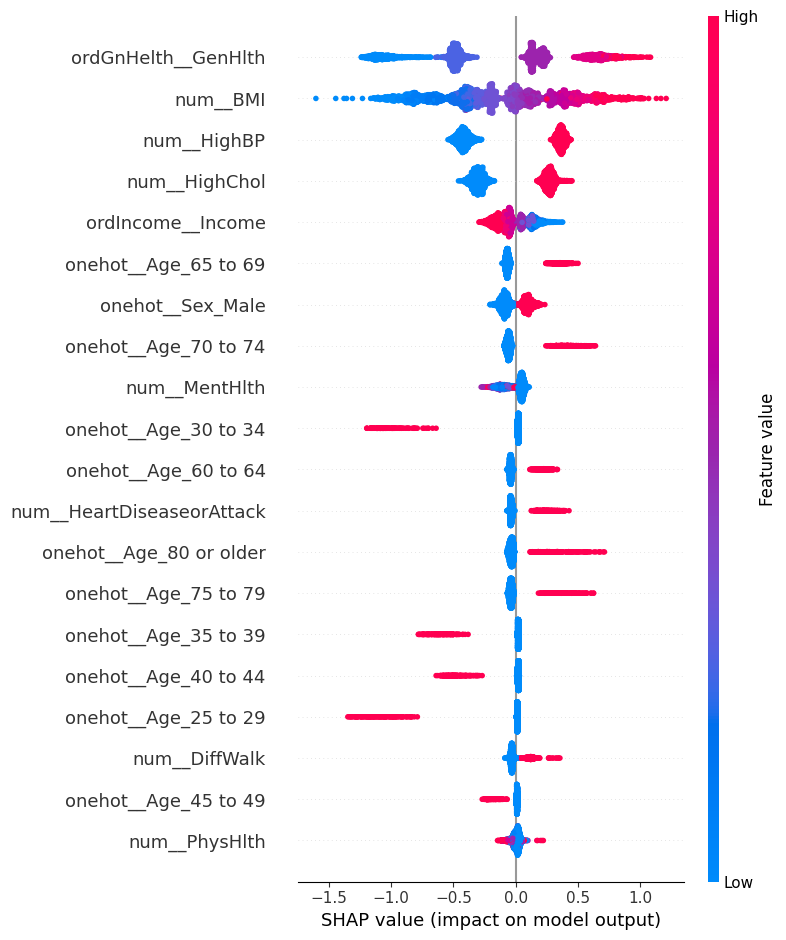

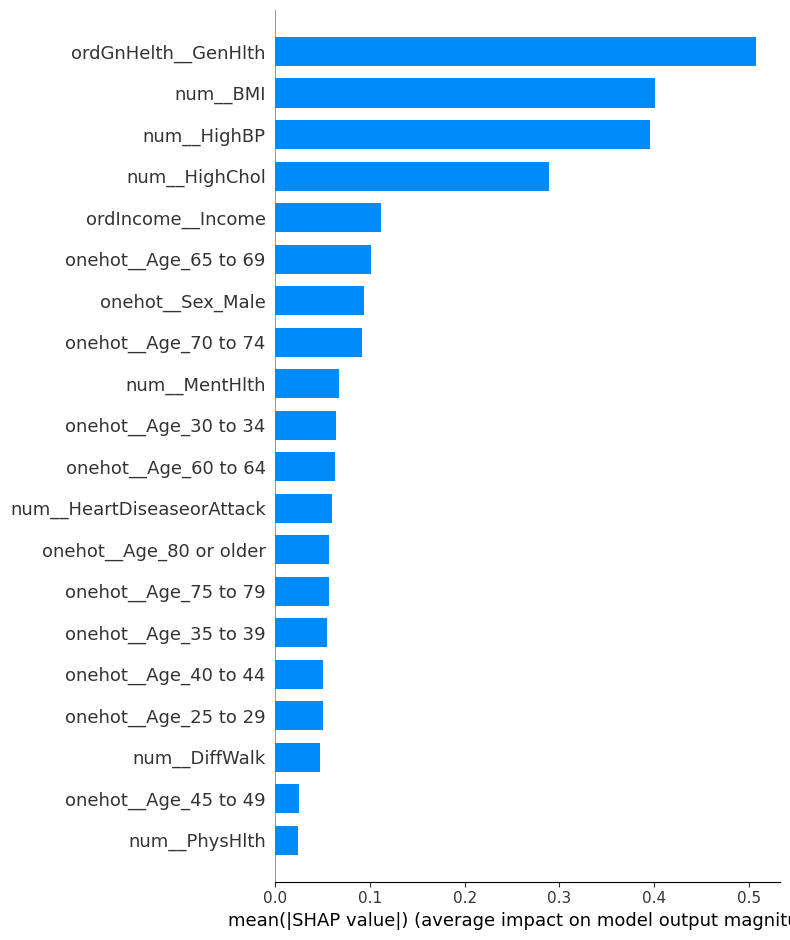

mean|SHAP|
ordGnHelth__GenHlth            0.5077
num__BMI                       0.4014
num__HighBP                    0.3954
num__HighChol                  0.2887
ordIncome__Income              0.1120
onehot__Age_65 to 69           0.1006
onehot__Sex_Male               0.0930
onehot__Age_70 to 74           0.0917
num__MentHlth                  0.0676
onehot__Age_30 to 34           0.0644
onehot__Age_60 to 64           0.0629
num__HeartDiseaseorAttack      0.0593
onehot__Age_80 or older        0.0567
onehot__Age_75 to 79           0.0563
onehot__Age_35 to 39           0.0540
onehot__Age_40 to 44           0.0498
onehot__Age_25 to 29           0.0497
num__DiffWalk                  0.0475
onehot__Age_45 to 49           0.0245
num__PhysHlth                  0.0242

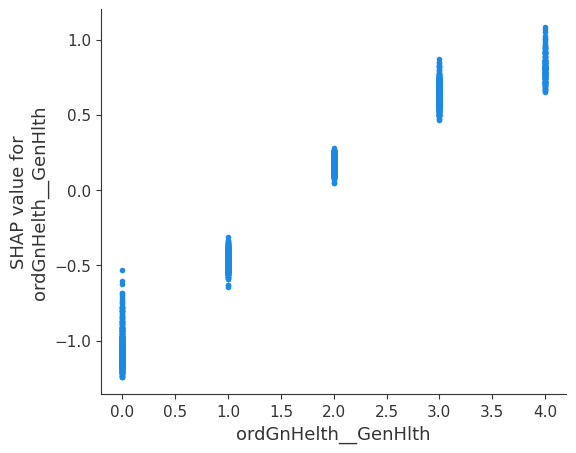

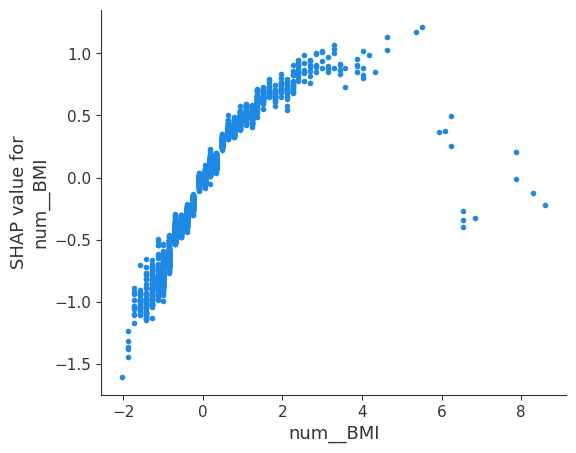

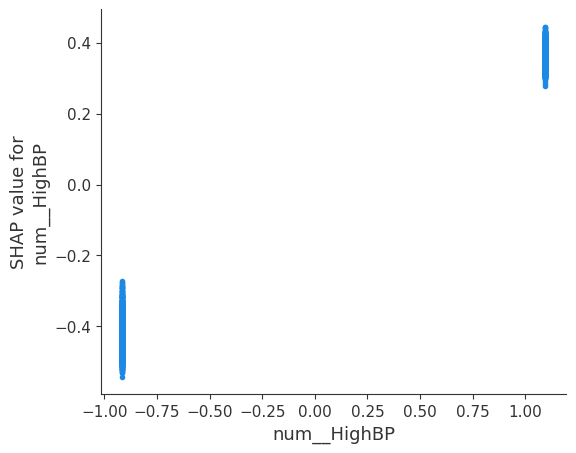

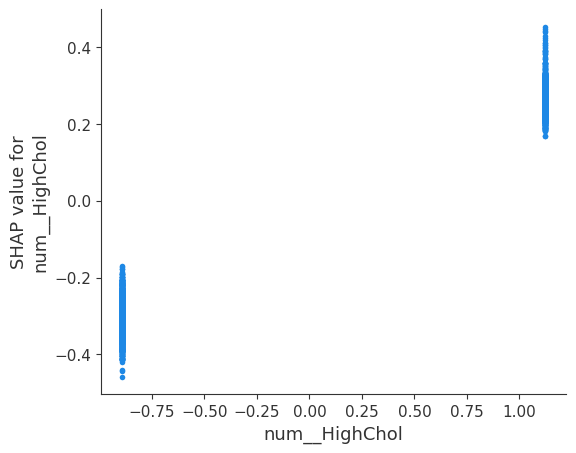

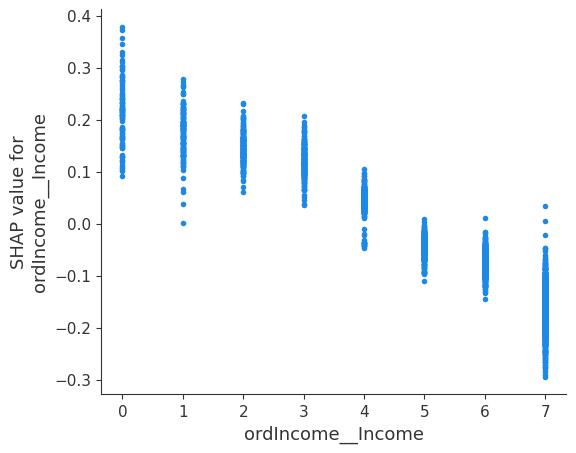

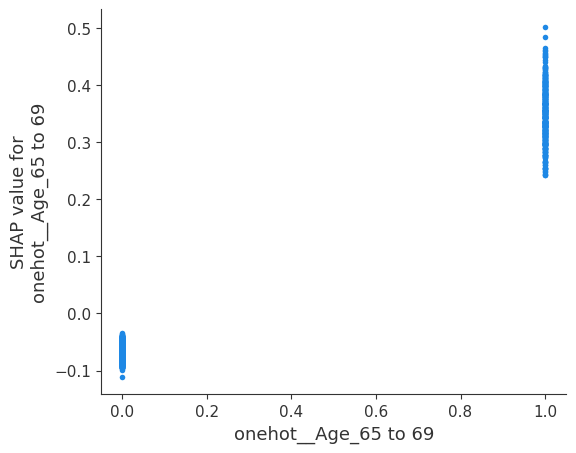

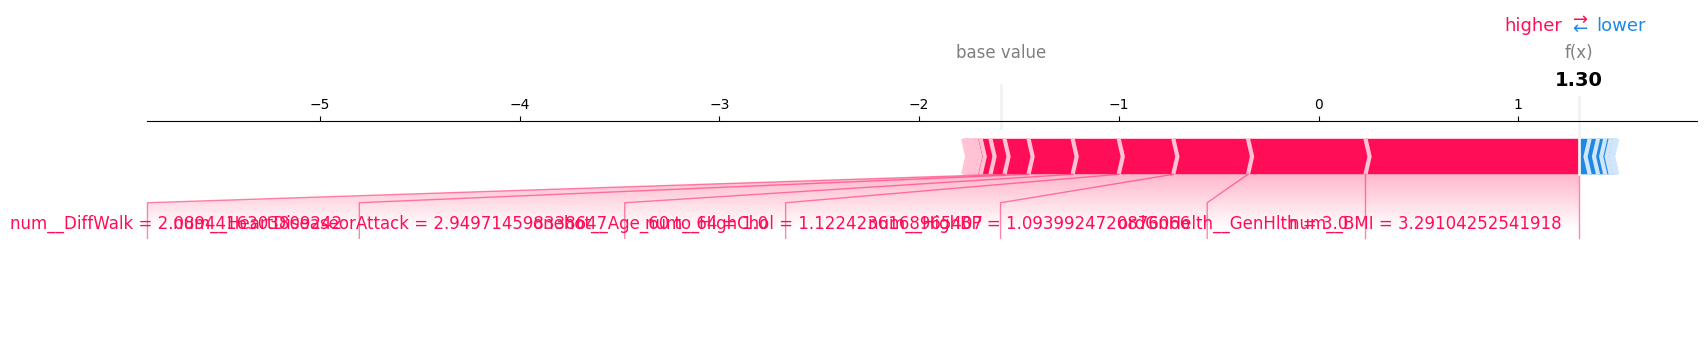

In [ ]:
import shap
pre = xgb_prefit.named_steps["preprocess"]
X_trval_t = pre.transform(X_tr)
X_test_t  = pre.transform(X_val)

def _feat_names(pre, X_sample):
    # Works for ColumnTransformer + encoders/scalers (sklearn >=1.0).
    if hasattr(pre, "get_feature_names_out"):
        try:
            return pre.get_feature_names_out()
        except:
            pass
    # Fallbacks
    if hasattr(X_sample, "columns"):
        return np.array(X_sample.columns, dtype=object)
    return np.array([f"f{i}" for i in range(X_sample.shape[1])], dtype=object)

feature_names = _feat_names(pre, X_train)

# 3) Build TreeExplainer on the XGB model (not on the whole pipeline)
xgb_model = xgb_prefit.named_steps["model"]
explainer = shap.TreeExplainer(xgb_model)

# 4) Compute SHAP values on a manageable test subset (for speed)
idx = np.random.RandomState(42).choice(X_test_t.shape[0], size=min(3000, X_test_t.shape[0]), replace=False)
X_test_t_sub = X_test_t[idx]

shap_values = explainer.shap_values(X_test_t_sub)

# Some SHAP versions return list-of-arrays for multiclass; pick the positive class for binary
if isinstance(shap_values, list):
    shap_values = shap_values[1]  # positive class

# 5) Global importance (bar) and full beeswarm
shap.summary_plot(shap_values, X_test_t_sub, feature_names=feature_names, show=True)   # beeswarm
shap.summary_plot(shap_values, X_test_t_sub, feature_names=feature_names, plot_type="bar", show=True)

# 6) Top-k table for your report
topk = 20
imp = (np.abs(shap_values).mean(axis=0))
imp_s = pd.Series(imp, index=feature_names).sort_values(ascending=False).head(topk)
display(imp_s.to_frame("mean|SHAP|").round(4))

# 7) Drill-down: dependence plots for top features
for fname in imp_s.index[:6]:
    shap.dependence_plot(fname, shap_values, X_test_t_sub, feature_names=feature_names, interaction_index=None, show=True)

# 8) Single prediction explanation (force plot) – pick a positive case
i = int(np.argmax(shap_values.sum(axis=1)))  # or any index you want
shap.force_plot(
    explainer.expected_value if not isinstance(explainer.expected_value, (list, np.ndarray)) else explainer.expected_value[1],
    shap_values[i, :],
    X_test_t_sub[i, :],
    feature_names=feature_names,
    matplotlib=True  # better for notebooks without JS
)

In [ ]:
pre = xgb_prefit.named_steps["preprocess"]
pre.transformers_[0][2]
ohe = pre.named_transformers_['onehot']
print(ohe.get_feature_names_out())        # full list of encoded feature names


['Sex_Male' 'Age_25 to 29' 'Age_30 to 34' 'Age_35 to 39' 'Age_40 to 44'
 'Age_45 to 49' 'Age_50 to 54' 'Age_55 to 59' 'Age_60 to 64'
 'Age_65 to 69' 'Age_70 to 74' 'Age_75 to 79' 'Age_80 or older']


## 🧠 Feature Importance Analysis

### 🔹 Top Predictors Identified (XGBoost)



| Rank | Feature | Interpretation |
|------|----------|----------------|
| 1️⃣ | **GenHlth (General Health)** | Strongest predictor — poor self-reported health correlates strongly with diabetes risk. |
| 2️⃣ | **BMI (Body Mass Index)** | High BMI strongly increases diabetes likelihood. |
| 3️⃣ | **HighBP (High Blood Pressure)** | Hypertension is a major co-morbidity of diabetes. |
| 4️⃣ | **HighChol (High Cholesterol)** | Metabolic disorder marker, common among diabetic individuals. |
| 5️⃣ | **Income** | Lower income levels often correlate with limited access to preventive care. |
| 6️⃣ | **Age 65–69 / 70–74** | Age group with higher risk; lifestyle and insulin resistance factors. |
| 7️⃣ | **Sex (Male)** | Males show slightly higher risk in this dataset. |
| 8️⃣ |**MentHlth (Mental Health Days)** | Chronic stress or poor mental health can contribute to metabolic issues. |
| 9️⃣ | **HeartDiseaseorAttack** |Cardiovascular history aligns with higher diabetes risk predictions. |
| 🔟 |**DiffWalk / PhysHlth** | Reduced mobility and poor physical health contribute modestly but meaningfully. |

---

### 🩺 Insights
- **Self-perceived health (GenHlth)** is the single most predictive variable — a strong proxy for multiple underlying risks.  
-  Lifestyle and metabolic factors**BMI**, and **Blood Pressure/Cholesterol** dominate the model’s decision process.  
- **Socioeconomic factors** (Income, Education) appear as moderate contributors.  
- **Age and Sex** reflect biological and lifestyle risk stratification.  
- Use SHAP values to visualize local (individual-level) explanations for model transparency.


# 11. Result <a id="11"></a>

### 📈 Model Performance Insights: Business Perspective

- **High Recall**  
  The model effectively identifies a large proportion of true positive cases. This is critical in healthcare, where missing a high-risk patient could result in severe consequences. High recall supports proactive intervention and risk mitigation strategies.

- **Low Precision**  
  While the model flags many individuals as high-risk, a significant portion may not actually require intervention. This can lead to resource strain, unnecessary follow-ups, and potential patient anxiety. Precision should be monitored to balance operational efficiency with clinical safety.

- **F1 Score**  
  The F1 score provides a balanced measure of model performance by combining precision and recall. It is especially valuable when evaluating models under class imbalance or when tuning decision thresholds. A strong F1 score indicates the model is making reliable predictions overall, supporting confident deployment in real-world settings.

### 🧠 Executive Summary: Diabetes Risk Model Performance

#### 📊 Population Overview
- **Total Patients Evaluated**: 46,285
- **Diabetic Cases Identified**: 7,945  
  → **Prevalence**: ~17.2%

#### 📈 Model Outcomes
- **True Positives (TP)**: 5,015 — correctly flagged diabetic patients
- **False Positives (FP)**: 8,340 — non-diabetic patients incorrectly flagged
- **False Negatives (FN)**: 2,930 — diabetic patients missed by the model
- **True Negatives (TN)**: ~30,000 — correctly identified non-diabetic patients

#### 📊 Key Performance Metrics
- **Precision (Positive Predictive Value)**: ~37.6%  
  → *Operational Insight*: Over one-third of flagged patients are truly diabetic. The remaining may require secondary screening to avoid unnecessary interventions.

- **Recall (Sensitivity)**: ~63.1%  
  → *Clinical Impact*: The model successfully identifies nearly two-thirds of diabetic cases, supporting early intervention and care prioritization.

- **Specificity**: ~78.3%  
  → *Efficiency Insight*: Most non-diabetic patients are correctly excluded, reducing unnecessary follow-ups.

- **Negative Predictive Value (NPV)**: ~91.1%  
  → *Risk Management*: Strong confidence in ruling out low-risk individuals, minimizing missed diagnoses.

- **False Positive Rate (FPR)**: ~21.7%  
  → *Resource Consideration*: One in five non-diabetic patients may be flagged, potentially impacting workflow and resource allocation.

- **Accuracy**: ~75.7%  
  → *Overall Reliability*: The model performs well across the population, with three out of four predictions being correct.

- **F1 Score**: ~0.471  
  → *Balanced Effectiveness*: Reflects a moderate trade-off between precision and recall, useful for threshold tuning and model comparison.

#### 🩺 Strategic Implications
- The model is **recall-oriented**, prioritizing detection over precision—appropriate for high-risk domains like diabetes screening.
- **Follow-up protocols** may be needed to manage false positives efficiently.
- **Threshold optimization** and **post-model triage** could improve precision without compromising recall.
- High NPV supports **safe exclusion**, enabling confident decisions for low-risk patients.

## 🧾 Main Takeaways, Business Recommendations & Future Work

### 🧩 **Key Findings**

- The best-performing model, **XGBoost**, achieved a **Test ROC-AUC of 0.81** and strong generalization across folds.  
- The most influential predictors of diabetes risk were:
  1. **General Health (GenHlth)**
  2. **Body Mass Index (BMI)**
  3. **High Blood Pressure (HighBP)**
  4. **High Cholesterol (HighChol)**
  5. **Income Level**
- These features align strongly with clinical evidence — confirming that **lifestyle, cardiovascular health, and socioeconomic status** are central to diabetes risk.
- SHAP analysis showed clear interpretability:
  - Poor self-rated health and high BMI sharply increase predicted risk.
  - Low income and aging also raise likelihood.
  - Male individuals have a slightly higher predicted risk.

---

### 🩺 **Model Insights**

| Metric | Best Model (XGBoost) | Interpretation |
|---------|----------------------|----------------|
| **ROC-AUC = 0.81** | Strong discriminative ability between diabetic and non-diabetic classes |
| **Accuracy ≈ 84%** | Reliable overall classification |
| **Precision ≈ 40% / Recall ≈ 66%** | Balanced trade-off; model captures 2/3 of true diabetic cases |
| **Confusion Matrix** | 91.8% specificity (non-diabetics correctly identified) vs. 66.1% sensitivity (diabetics correctly detected) |

> 💡 Interpretation: The model prioritizes **accurate screening** while maintaining reasonable sensitivity.  
> Ideal for early-risk prediction tools where false negatives are more critical than false positives.

---

### 💼 **Business Recommendations**

1. **Integrate Model into Preventive Care Systems**  
   Deploy the trained model in clinical dashboards or health survey apps to flag high-risk individuals for follow-up.

2. **Targeted Health Interventions**  
   Use insights on **BMI**, **Blood Pressure**, and **Self-Reported Health** to design wellness programs and lifestyle coaching campaigns.

3. **Socioeconomic Outreach**  
   Since lower income and education levels increase risk, tailor public health messaging and subsidies toward these populations.

4. **Continuous Model Monitoring**  
   Retrain quarterly or annually with new data to adapt to changing population health trends (e.g., post-COVID lifestyle effects).

5. **Explainability for Trust**  
   Keep SHAP visualization as part of the pipeline to ensure doctors, policy makers, and patients understand why predictions are made.

---

### 🚀 **Future Work**

| Focus Area | Description |
|-------------|--------------|
| **1️⃣ Model Refinement** | Explore **Ensemble Stacking (XGB + LR)** or **LightGBM/CatBoost** for improved precision and faster training. |
| **2️⃣ Feature Engineering** | Incorporate new predictors such as dietary habits, physical activity frequency, sleep quality, or genetic predisposition. |
| **3️⃣ Class Imbalance Handling** | Apply **SMOTE**, **ADASYN**, or cost-sensitive learning to improve recall for minority diabetic cases. |
| **4️⃣ Temporal Analysis** | Study longitudinal health data to identify early warning signals before diabetes onset. |
| **5️⃣ Deployment Pipeline** | Containerize with **FastAPI / Streamlit** for interactive risk prediction dashboards in real time. |
| **6️⃣ Fairness & Bias Testing** | Evaluate model performance across gender, age, and income groups to ensure equitable outcomes. |

---

### 🏁 **Conclusion**

This project demonstrates that **machine learning models—especially XGBoost—can effectively predict diabetes risk** using publicly available health survey data.  
Beyond prediction, **explainable AI (via SHAP)** provided clear, interpretable insights that align with real-world medical understanding.

By applying these findings, healthcare organizations can:
- Prioritize early detection,
- Optimize resource allocation,
- and promote **data-driven public health strategies** to reduce diabetes prevalence over time.
